In [22]:
from datasets.pamap2 import PAMAP2
from datasets.opportunity import Opportunity
from datasets.mmfit import MMFit


from models.cnn import CNN
from models.convlstm import ConvLSTM
from models.gru import GRU
from models.lstm import LSTM
from models.transformer import Transformer

import numpy as np
import csv
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [23]:
# DATASET LOOP
dir = './outputs/H100/'
DATASET_LIST = ['PAMAP2','OPPORTUNITY','MMFIT','MHEALTH','MOTIONSENSE','WISDM']
MODEL_LIST = ['CNN','CONVLSTM','GRU','LSTM','TRANSFORMER','CPC']

BATCH_LIST = [64, 256, 1024]
LR_LIST = [0.1, 0.01, 0.001]

WINDOW = 200
STRIDE = 100

STEP = 20
GAMMA = 0.5
PATIENCE = 40
NUM_EPOCHS = 200
best_rows = {}

for DATASET in DATASET_LIST:   
    # MODEL LOOP
    for MODEL in MODEL_LIST:
        print("\nDATASET: " + DATASET)
        print("MODEL: " + MODEL)

        best_accuracy = 0
        best_loss = float('inf')
        best_batch = 0
        best_lr = 0
        best_exp_id = []
        
       
        for BATCH in BATCH_LIST:
            for LR in LR_LIST:
                total_accuracy = 0
                total_loss = 0
                total_rows = 0
                exp_id = []
                rows = []
                with open(dir + DATASET+'_'+MODEL+'.csv', 'r') as csvfile:
                    csvreader = csv.reader(csvfile)
                    for row in csvreader:
                        if int(row[3]) == BATCH and float(row[4]) == LR:
                            #print(row)
                            
                            total_accuracy += float(row[8])
                            total_loss += float(row[9]) 
                            total_rows += 1
                            exp_id.append(row[0])
                            rows.append(row)
                # rows = sorted(rows, key=lambda x: x[5])
                
                average_accuracy = total_accuracy / total_rows if total_rows > 0 else 0
                #print(average_accuracy)
                average_loss = total_loss / total_rows if total_rows > 0 else float('inf')

                if average_accuracy > best_accuracy:
                    best_accuracy = average_accuracy
                    best_loss = average_loss
                    best_batch = BATCH
                    best_lr = LR
                    best_exp_id=exp_id
                    best_rows[(DATASET, MODEL)] = rows


        # Output the best batch size and learning rate
        print("Best Batch Size:", best_batch)
        print("Best Learning Rate:", best_lr)
        print("Best Accuracy:", best_accuracy)
        print("Best Loss:", best_loss)
        print("Best IDs:", best_exp_id)


# pprint(best_rows)
print(best_rows)
                    
                
            


DATASET: PAMAP2
MODEL: CNN
Best Batch Size: 256
Best Learning Rate: 0.001
Best Accuracy: 0.6583331289905543
Best Loss: 1.2790684447478147
Best IDs: ['40', '41', '42', '43', '44', '45', '46', '47']

DATASET: PAMAP2
MODEL: CONVLSTM
Best Batch Size: 256
Best Learning Rate: 0.001
Best Accuracy: 0.708407681609401
Best Loss: 0.9856696200815881
Best IDs: ['40', '41', '42', '43', '44', '45', '46', '47']

DATASET: PAMAP2
MODEL: GRU
Best Batch Size: 256
Best Learning Rate: 0.001
Best Accuracy: 0.6594467031269567
Best Loss: 1.314249312944287
Best IDs: ['40', '41', '42', '43', '44', '45', '46', '47']

DATASET: PAMAP2
MODEL: LSTM
Best Batch Size: 256
Best Learning Rate: 0.001
Best Accuracy: 0.6594911273312486
Best Loss: 1.2575467278700228
Best IDs: ['40', '41', '42', '43', '44', '45', '46', '47']

DATASET: PAMAP2
MODEL: TRANSFORMER
Best Batch Size: 256
Best Learning Rate: 0.001
Best Accuracy: 0.7485665669164424
Best Loss: 0.8517638966828149
Best IDs: ['40', '41', '42', '43', '44', '45', '46', '47'

In [24]:
MODEL = 'TRANSFORMER' 
DATASET = 'PAMAP2'
LPO = '[1]'
CLASS = 12

{('PAMAP2', 'CNN'): [['40', 'PAMAP2', 'CNN', '256', '0.001', '[2]', '[1, 3, 4, 5, 6, 7, 8]', '3', '0.490882649065891', '1.4346608413649453', '7527', '16465'], ['41', 'PAMAP2', 'CNN', '256', '0.001', '[8]', '[1, 2, 3, 4, 5, 6, 7]', '1', '0.4000490256158843', '3.2166228517889977', '49110', '57268'], ['42', 'PAMAP2', 'CNN', '256', '0.001', '[1]', '[2, 3, 4, 5, 6, 7, 8]', '1', '0.5416500597847748', '1.8876243380713276', '0', '7526'], ['43', 'PAMAP2', 'CNN', '256', '0.001', '[5]', '[1, 2, 3, 4, 6, 7, 8]', '6', '0.7603416066186283', '0.9359459632697202', '28111', '35604'], ['44', 'PAMAP2', 'CNN', '256', '0.001', '[6]', '[1, 2, 3, 4, 5, 7, 8]', '3', '0.7485832757429164', '0.7676904054141825', '35605', '42839'], ['45', 'PAMAP2', 'CNN', '256', '0.001', '[4]', '[1, 2, 3, 5, 6, 7, 8]', '2', '0.768133535660091', '0.6434907823758504', '21521', '28110'], ['46', 'PAMAP2', 'CNN', '256', '0.001', '[7]', '[1, 2, 3, 4, 5, 6, 8]', '4', '0.8092503987240829', '0.5705889566987747', '42840', '49109'], ['47', 

<Figure size 800x800 with 0 Axes>

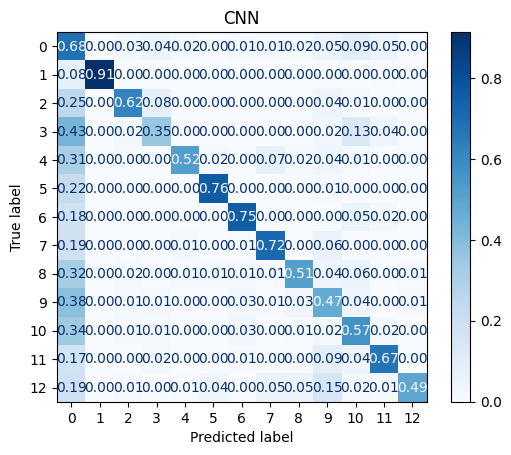

<Figure size 800x800 with 0 Axes>

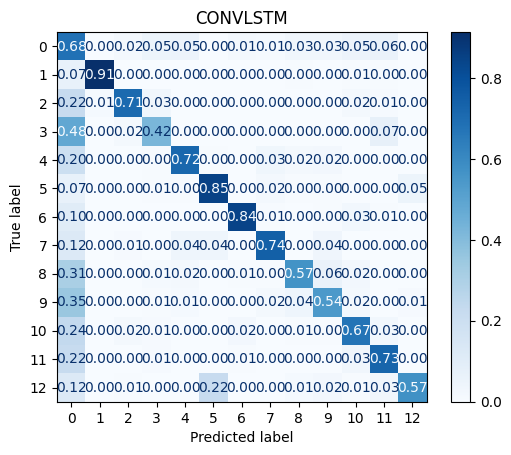

<Figure size 800x800 with 0 Axes>

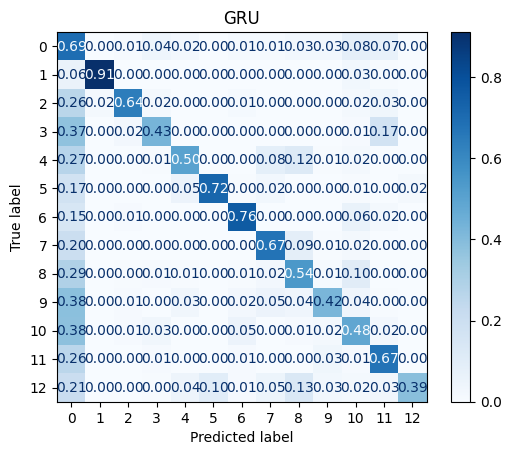

<Figure size 800x800 with 0 Axes>

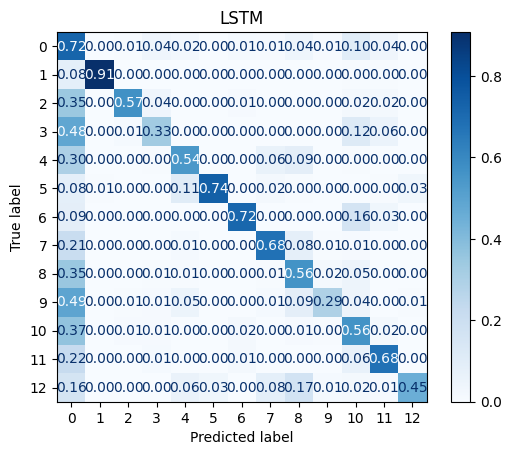

<Figure size 800x800 with 0 Axes>

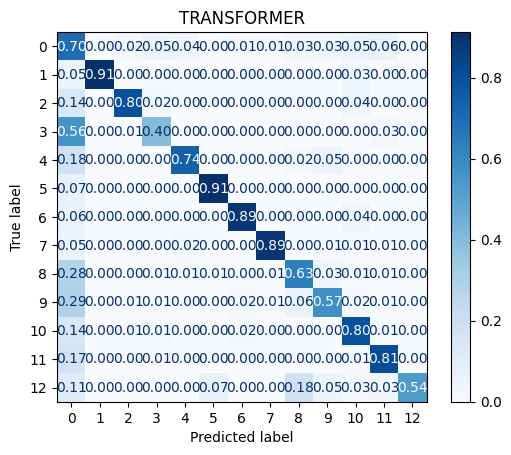

<Figure size 800x800 with 0 Axes>

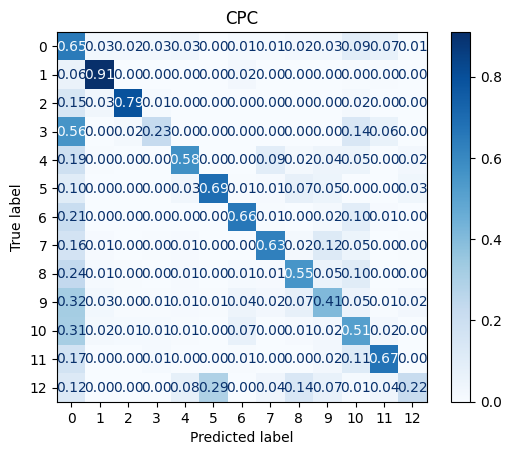

In [25]:
# Confusion Matrix
# FOR EACH MODEL

bestRowsDS = {key: value for key, value in best_rows.items() if key[0] == DATASET}

print(bestRowsDS)



for MODEL in MODEL_LIST:
    all_y = np.array([])
    all_outputs = np.array([])
    for person in bestRowsDS[DATASET,MODEL]:
        #print(LPO)
        data = np.load(dir + DATASET+'_'+MODEL+'_'+person[0]+'.npz', allow_pickle=True)
        y = np.concatenate(data['y'])
        outputs = np.concatenate(data['outputs'])
        max_outputs = np.argmax(outputs, axis=1)

        all_y = np.append(all_y, y)
        all_outputs = np.append(all_outputs, max_outputs)
    #print(all_y.shape)
    #print(all_outputs.shape)
    cm = confusion_matrix(all_y, all_outputs)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
    plt.figure(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues,values_format='.2f')
    plt.title(MODEL)
    plt.show()



In [26]:
# Accuracy and Loss by Participant

part_id = {arr[5] for arr in best_rows[DATASET, MODEL]}
print(part_id)

for MODEL in MODEL_LIST:
    average_accuracy_by_i = {}
    average_loss_by_i = {}
    for i in part_id:
        accuracies_for_i = []
        losses_for_i = []
        for arr in best_rows[DATASET, MODEL]:
            if arr[5] == i:
                accuracies_for_i.append(float(arr[8]))  # Accuracy
                losses_for_i.append(float(arr[9]))      # Loss

        average_accuracy_by_i[i] = sum(accuracies_for_i) / len(accuracies_for_i) if accuracies_for_i else 0.0
        average_loss_by_i[i] = sum(losses_for_i) / len(losses_for_i) if losses_for_i else 0.0
    
    print(MODEL)
    print("Participant ID, Average Accuracy, Average Loss:")
    for i in part_id:
        print(f"{i}: {average_accuracy_by_i[i]}, {average_loss_by_i[i]}")
    print()

{'[6]', '[5]', '[8]', '[3]', '[7]', '[1]', '[4]', '[2]'}
CNN
Participant ID, Average Accuracy, Average Loss:
[6]: 0.7485832757429164, 0.7676904054141825
[5]: 0.7603416066186283, 0.9359459632697202
[8]: 0.4000490256158843, 3.2166228517889977
[3]: 0.7477744807121661, 0.7759234189987183
[7]: 0.8092503987240829, 0.5705889566987747
[1]: 0.5416500597847748, 1.8876243380713276
[4]: 0.768133535660091, 0.6434907823758504
[2]: 0.490882649065891, 1.4346608413649453

CONVLSTM
Participant ID, Average Accuracy, Average Loss:
[6]: 0.7617138908085694, 0.8014354373585304
[5]: 0.7930344275420337, 0.7514249920393923
[8]: 0.5922294398823386, 1.3967625326476991
[3]: 0.7831849653808111, 0.6488490428775548
[7]: 0.8210526315789474, 0.5551083923515399
[1]: 0.5759266640095656, 1.8128225696583589
[4]: 0.7877086494688923, 0.6749801345196409
[2]: 0.5524107842040497, 1.243973859199988

GRU
Participant ID, Average Accuracy, Average Loss:
[6]: 0.7119557705597789, 0.9397361236222987
[5]: 0.7594075260208166, 0.86062152

In [27]:
# Confidence per person and class

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

for person in best_rows[DATASET, MODEL]:
    # Load the data
    data = np.load(dir + DATASET + '_' + MODEL + '_' + person[0] + '.npz', allow_pickle=True)
    
    # Extract outputs
    outputs = np.concatenate(data['outputs'])
    
    # Calculate softmax probabilities
    probabilities = softmax(outputs)
    
    # Get the maximum confidence for each class
    max_confidence_per_class = np.max(probabilities, axis=0)

    # Print results
    print("LPO:", person[5])
    for i, conf in enumerate(max_confidence_per_class):
        print(f"Class {i}: Confidence = {conf:.2f}")
    print()

LPO: [2]
Class 0: Confidence = 0.96
Class 1: Confidence = 1.00
Class 2: Confidence = 1.00
Class 3: Confidence = 0.99
Class 4: Confidence = 0.61
Class 5: Confidence = 0.99
Class 6: Confidence = 0.99
Class 7: Confidence = 1.00
Class 8: Confidence = 0.95
Class 9: Confidence = 0.78
Class 10: Confidence = 0.99
Class 11: Confidence = 0.98
Class 12: Confidence = 0.58

LPO: [8]
Class 0: Confidence = 0.65
Class 1: Confidence = 0.90
Class 2: Confidence = 0.95
Class 3: Confidence = 0.90
Class 4: Confidence = 0.96
Class 5: Confidence = 0.29
Class 6: Confidence = 0.98
Class 7: Confidence = 0.29
Class 8: Confidence = 0.94
Class 9: Confidence = 0.70
Class 10: Confidence = 0.94
Class 11: Confidence = 0.88
Class 12: Confidence = 0.08

LPO: [1]
Class 0: Confidence = 0.88
Class 1: Confidence = 0.99
Class 2: Confidence = 0.06
Class 3: Confidence = 0.17
Class 4: Confidence = 0.99
Class 5: Confidence = 0.99
Class 6: Confidence = 0.99
Class 7: Confidence = 0.99
Class 8: Confidence = 0.94
Class 9: Confidence 

In [28]:
# Balance of classes in the dataset, per person

for person in best_rows[DATASET,MODEL]:
    #print(LPO)
    data = np.load(dir + DATASET+'_'+MODEL+'_'+person[0]+'.npz', allow_pickle=True)
    y = np.concatenate(data['y'])
    # Calculate class distribution
    class_counts = {}
    total_samples = len(y)
    for cls in y:
        cls = int(cls)
        class_counts[cls] = class_counts.get(cls, 0) + 1
    sorted_classes = sorted(class_counts.keys())
    # Print the percentage distribution
    print("LPO:", person[5],'Total Samples:', total_samples)
    for cls in sorted_classes:
        count = class_counts.get(cls, 0)
        percentage = (count / total_samples) * 100
        print(f"Class {cls}: {percentage:.2f}% , {count} ")
    print()

LPO: [2] Total Samples: 8939
Class 0: 41.10% , 3674 
Class 1: 5.24% , 468 
Class 2: 4.99% , 446 
Class 3: 5.73% , 512 
Class 4: 7.27% , 650 
Class 5: 2.07% , 185 
Class 6: 5.62% , 502 
Class 7: 6.65% , 594 
Class 8: 3.88% , 347 
Class 9: 3.40% , 304 
Class 10: 4.62% , 413 
Class 11: 6.47% , 578 
Class 12: 2.98% , 266 

LPO: [8] Total Samples: 8159
Class 0: 35.73% , 2915 
Class 1: 5.93% , 484 
Class 2: 5.61% , 458 
Class 3: 6.16% , 503 
Class 4: 7.73% , 631 
Class 5: 4.06% , 331 
Class 6: 6.24% , 509 
Class 7: 7.08% , 578 
Class 8: 2.87% , 234 
Class 9: 2.37% , 193 
Class 10: 5.96% , 486 
Class 11: 8.09% , 660 
Class 12: 2.17% , 177 

LPO: [1] Total Samples: 7527
Class 0: 33.55% , 2525 
Class 1: 7.23% , 544 
Class 2: 6.23% , 469 
Class 3: 5.78% , 435 
Class 4: 5.91% , 445 
Class 5: 5.66% , 426 
Class 6: 6.27% , 472 
Class 7: 5.38% , 405 
Class 8: 4.22% , 318 
Class 9: 3.97% , 299 
Class 10: 6.10% , 459 
Class 11: 6.26% , 471 
Class 12: 3.44% , 259 

LPO: [5] Total Samples: 7494
Class 0:

<Figure size 800x800 with 0 Axes>

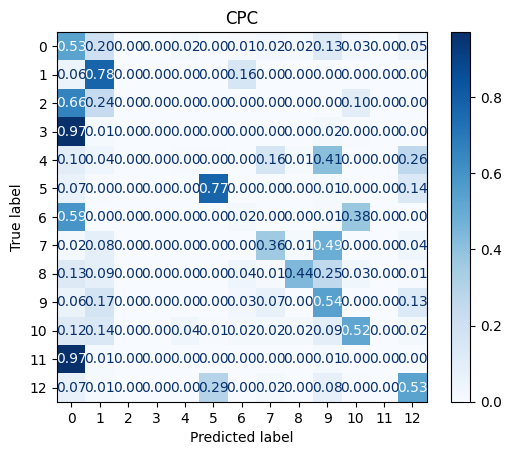

In [29]:
# Confusion Matrix
# FOR SPECIFIC MODEL AND PERSON

all_y = np.array([])
all_outputs = np.array([])
for person in best_rows[DATASET,MODEL]:
    if person[5] == LPO:
        data = np.load(dir + DATASET+'_'+MODEL+'_'+person[0]+'.npz', allow_pickle=True)
        y = np.concatenate(data['y'])
        outputs = np.concatenate(data['outputs'])
        max_outputs = np.argmax(outputs, axis=1)

        all_y = np.append(all_y, y)
        all_outputs = np.append(all_outputs, max_outputs)
#print(all_y.shape)
#print(all_outputs.shape)
cm = confusion_matrix(all_y, all_outputs)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues,values_format='.2f')
plt.title(MODEL)
plt.show()

In [30]:
# For specific person and class, list the samples, the confidence per sample, the true label and the predicted label probability
# + GAP detection


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

sample_ids = []

for person in best_rows[DATASET, MODEL]:
    if person[5] == LPO:
        data = np.load(dir + DATASET + '_' + MODEL + '_' + person[0] + '.npz', allow_pickle=True)
        
        outputs = np.concatenate(data['outputs'])
        y = np.concatenate(data['y'])
    
        probabilities = softmax(outputs)
        
        print("LPO:", person[5])
        for sample_index, (sample_probabilities, ground_truth) in enumerate(zip(probabilities, y)):
            if ground_truth==CLASS:
                sample_id = int(person[10]) + sample_index
                sample_ids.append(sample_id)  # Add sample ID to the list
                print(f"Sample {sample_id}: Ground Truth = {ground_truth}")
                for class_index, conf in enumerate(sample_probabilities):
                    print(f"\tClass {class_index}: Confidence = {conf:.2f}")
        print()

sample_ids.sort()
prev_id = sample_ids[0]
gaps = False
for curr_id in sample_ids[1:]:
    if curr_id != prev_id + 1:
        print(f"Gap detected between sample {prev_id} and {curr_id}")
        gaps = True
    prev_id = curr_id

if not gaps:
    print("No gaps found in sample IDs.")

LPO: [1]
Sample 6977: Ground Truth = 12
	Class 0: Confidence = 0.42
	Class 1: Confidence = 0.20
	Class 2: Confidence = 0.03
	Class 3: Confidence = 0.03
	Class 4: Confidence = 0.03
	Class 5: Confidence = 0.03
	Class 6: Confidence = 0.03
	Class 7: Confidence = 0.03
	Class 8: Confidence = 0.03
	Class 9: Confidence = 0.12
	Class 10: Confidence = 0.03
	Class 11: Confidence = 0.03
	Class 12: Confidence = 0.03
Sample 6978: Ground Truth = 12
	Class 0: Confidence = 0.28
	Class 1: Confidence = 0.31
	Class 2: Confidence = 0.03
	Class 3: Confidence = 0.03
	Class 4: Confidence = 0.03
	Class 5: Confidence = 0.03
	Class 6: Confidence = 0.03
	Class 7: Confidence = 0.03
	Class 8: Confidence = 0.03
	Class 9: Confidence = 0.16
	Class 10: Confidence = 0.03
	Class 11: Confidence = 0.03
	Class 12: Confidence = 0.03
Sample 6979: Ground Truth = 12
	Class 0: Confidence = 0.26
	Class 1: Confidence = 0.35
	Class 2: Confidence = 0.02
	Class 3: Confidence = 0.02
	Class 4: Confidence = 0.02
	Class 5: Confidence = 0

Classes - Counts [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [18538, 3851, 3703, 3799, 4775, 1964, 3292, 3762, 2345, 2098, 3508, 4775, 859]]
57269
[array([0.71775393, 0.53827199, 0.75248511]), array([0.73139202, 0.40783846, 0.18302181]), array([0.3474503 , 0.80062607, 0.2386962 ]), array([0.04055574, 0.20881006, 0.53916884]), array([0.65623178, 0.53965841, 0.97302118]), array([0.30761632, 0.48879522, 0.85576955]), array([0.20215406, 0.15169315, 0.91859213]), array([0.00526497, 0.54997479, 0.96714979]), array([0.23097562, 0.70838573, 0.88626675]), array([0.13181456, 0.75079462, 0.17875139]), array([0.88705735, 0.82676992, 0.46291532]), array([0.76165161, 0.30226125, 0.69118981]), array([0.51222465, 0.95122596, 0.52968523]), array([0.22895558, 0.94052192, 0.05690953]), array([0.17587487, 0.9638615 , 0.5152284 ]), array([0.39756275, 0.66631163, 0.40914348]), array([0.41692008, 0.90322433, 0.0099184 ]), array([0.64310166, 0.85872865, 0.16634299]), array([0.05463242, 0.89152824, 0.9481376 

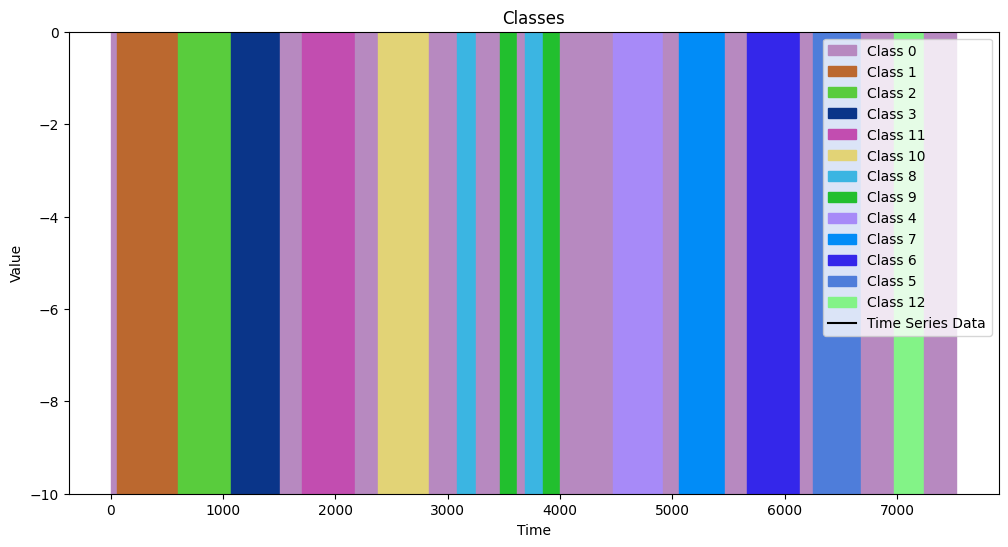

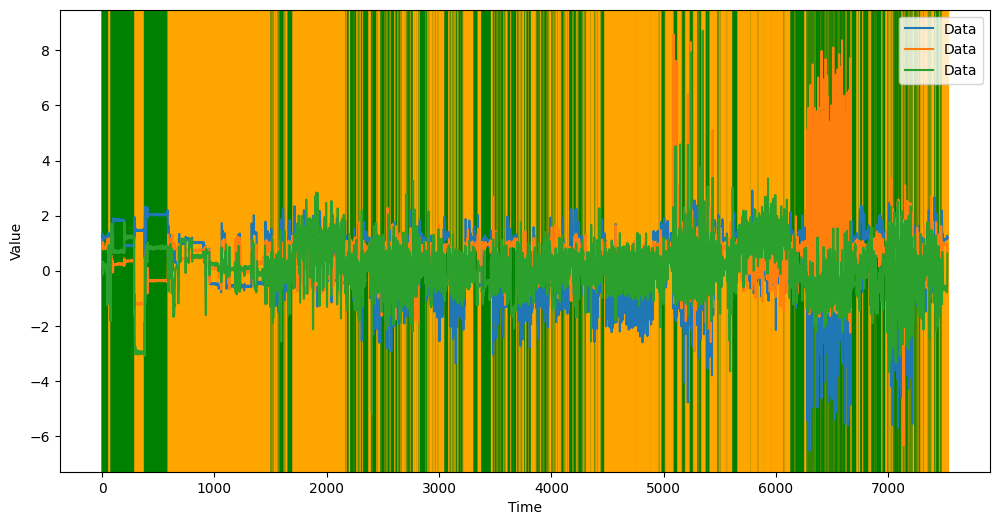

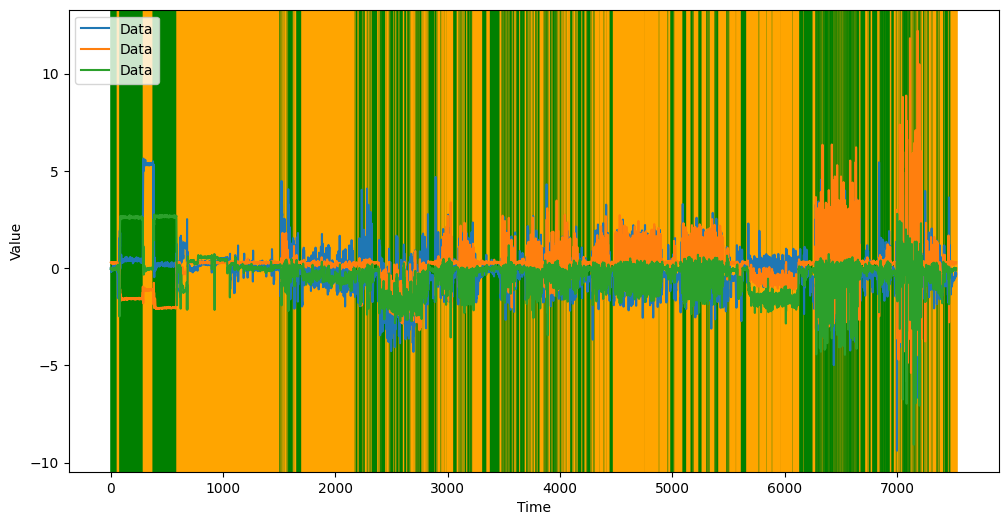

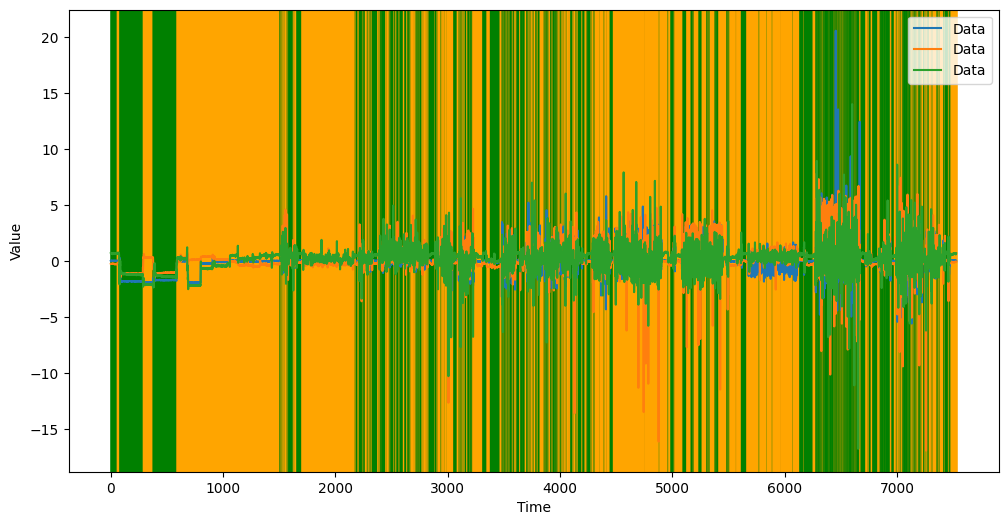

In [31]:
# for person, plot the y and predict and highlight them in color

ds = PAMAP2(users='full', window_size=WINDOW, window_step=STRIDE, frequency=50, columns=None, train_users=[1, 2, 3, 4, 5, 6, 7, 8])

print(len(ds))

sample_ids = []
all_y = np.array([])
all_outputs = np.array([])
for person in best_rows[DATASET,MODEL]:
    if person[5] == LPO:
        data = np.load(dir + DATASET+'_'+MODEL+'_'+person[0]+'.npz', allow_pickle=True)
        y = np.concatenate(data['y'])
        outputs = np.concatenate(data['outputs'])
        for sample_index, ground_truth in enumerate(y):
            sample_id = int(person[10]) + sample_index
            sample_ids.append(sample_id)  

        max_outputs = np.argmax(outputs, axis=1)

        all_y = np.append(all_y, y)
        all_outputs = np.append(all_outputs, max_outputs)

num_classes = 20
colors = np.random.rand(num_classes, 3)  
colors = list(colors)  

print(colors)

# Plot the time series data
plt.figure(figsize=(12, 6))


class_groups = []
current_class = None
start_index = None
for i, y_val in enumerate(all_y):
    if y_val != current_class:
        if start_index is not None:
            class_groups.append((current_class, start_index, i))
        current_class = y_val
        start_index = i
class_groups.append((current_class, start_index, len(all_y)))

legend_labels = {}  # Dictionary to keep track of legend labels
# Plot axvspan for each class group
for class_val, start, end in class_groups:
    if class_val not in legend_labels:  # Check if the class has not been plotted before
        plt.axvspan(start, end, color=colors[int(class_val)], label=f'Class {int(class_val)}')
        legend_labels[class_val] = True  # Mark the class as plotted
    else:
        plt.axvspan(start, end, color=colors[int(class_val)])

# Plot the time series data
plt.plot(np.arange(len(all_y)), np.zeros(len(all_y)), color='black', label='Time Series Data')


plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim(-10.0,0)
plt.title('Classes')
plt.legend()
plt.show()

for indices in [[0,1,2],[13,14,15],[26,27,28]]:
    
    x_data= [ds[i][0][WINDOW//2][indices] for i in range(0,len(ds))]
    x_data = [tensor.numpy() for tensor in x_data]
    x_data = np.vstack(x_data)


    x_data = x_data[sample_ids]

    plt.figure(figsize=(12, 6))
    plt.plot(x_data, label='Data')


    for i, (y_val, output_val) in enumerate(zip(all_y, all_outputs)):
        if y_val == output_val:
            color = 'green' 
        else:
            color = 'orange' 
        plt.axvspan(i, i+1, color=color)
                


    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('')
    plt.legend()
    plt.show()

/var/folders/wd/jp3qk8gd7j9gb75gs1y7z_2c0000gp/T/ipykernel_4475/1998942424.py:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  result_sum = np.sum((i for i in result_arrays),dtype=int,axis=0)


[ 413.  812.  434.  547. 1742.  340.]
[20510. 17412. 20664. 20570. 14960. 21956.]
57269
[0.72 1.42 0.76 0.96 3.04 0.59]
[35.81344183 30.40388343 36.08234822 35.91821055 26.12233495 38.33836805]


/var/folders/wd/jp3qk8gd7j9gb75gs1y7z_2c0000gp/T/ipykernel_4475/1998942424.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30, 10))


[ 52.  67.  67.  55. 155. 108.]
[2517. 2499. 2163. 2544. 1535. 2452.]
8638
[0.6  0.78 0.78 0.64 1.79 1.25]
[29.13868951 28.93030794 25.04051864 29.45126187 17.7703172  28.38620051]
[17. 34. 25. 12. 51. 16.]
[1061.  743.  869. 1079.  534.  858.]
26233
[0.06 0.13 0.1  0.05 0.19 0.06]
[4.04452407 2.83231045 3.31262151 4.11313994 2.03560401 3.27068959]
[103. 184. 127.  99. 144.  83.]
[2311. 2445. 2258. 2585. 2006. 2288.]
12144
[0.85 1.52 1.05 0.82 1.19 0.68]
[19.02997365 20.13339921 18.59354414 21.28623188 16.51844532 18.84057971]
[ 6. 17.  2.  2. 34. 22.]
[357. 549. 435. 427. 393. 222.]
20963
[0.03 0.08 0.01 0.01 0.16 0.1 ]
[1.70300052 2.61889997 2.07508467 2.0369222  1.87473167 1.05900873]
[30. 16. 27. 19. 45. 34.]
[1211. 1164. 1031. 1291.  896.  767.]
10927
[0.27 0.15 0.25 0.17 0.41 0.31]
[11.08263933 10.65251213  9.43534364 11.81477075  8.19987188  7.01930997]


<Figure size 3000x1000 with 0 Axes>

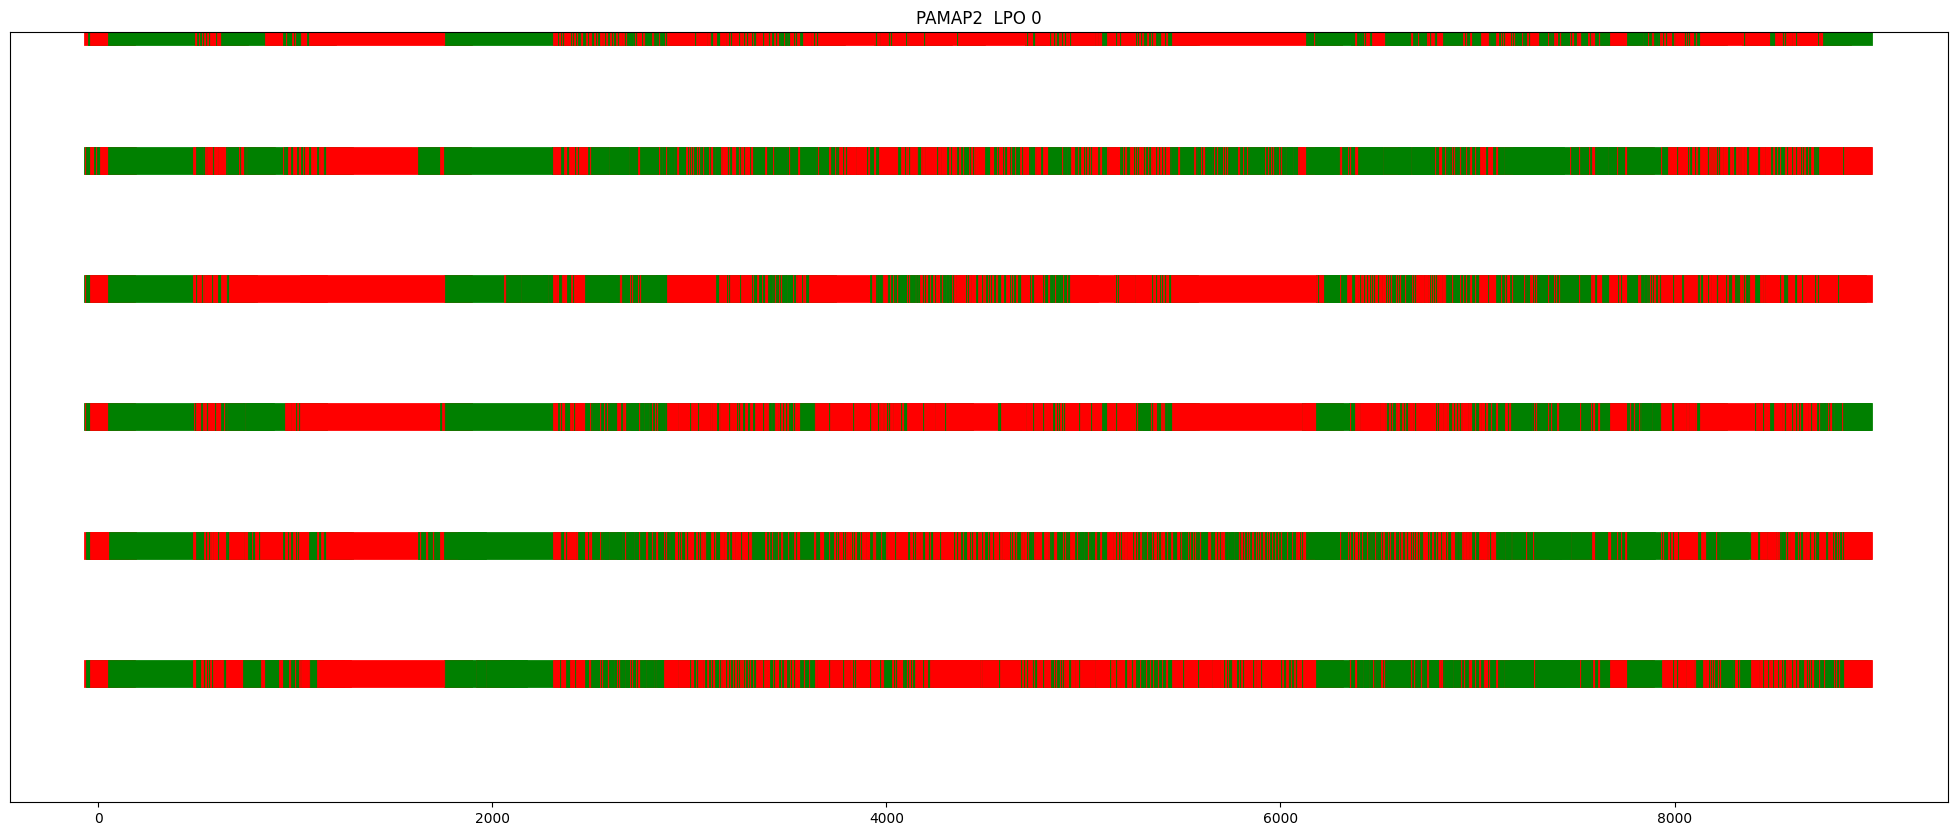

<Figure size 3000x1000 with 0 Axes>

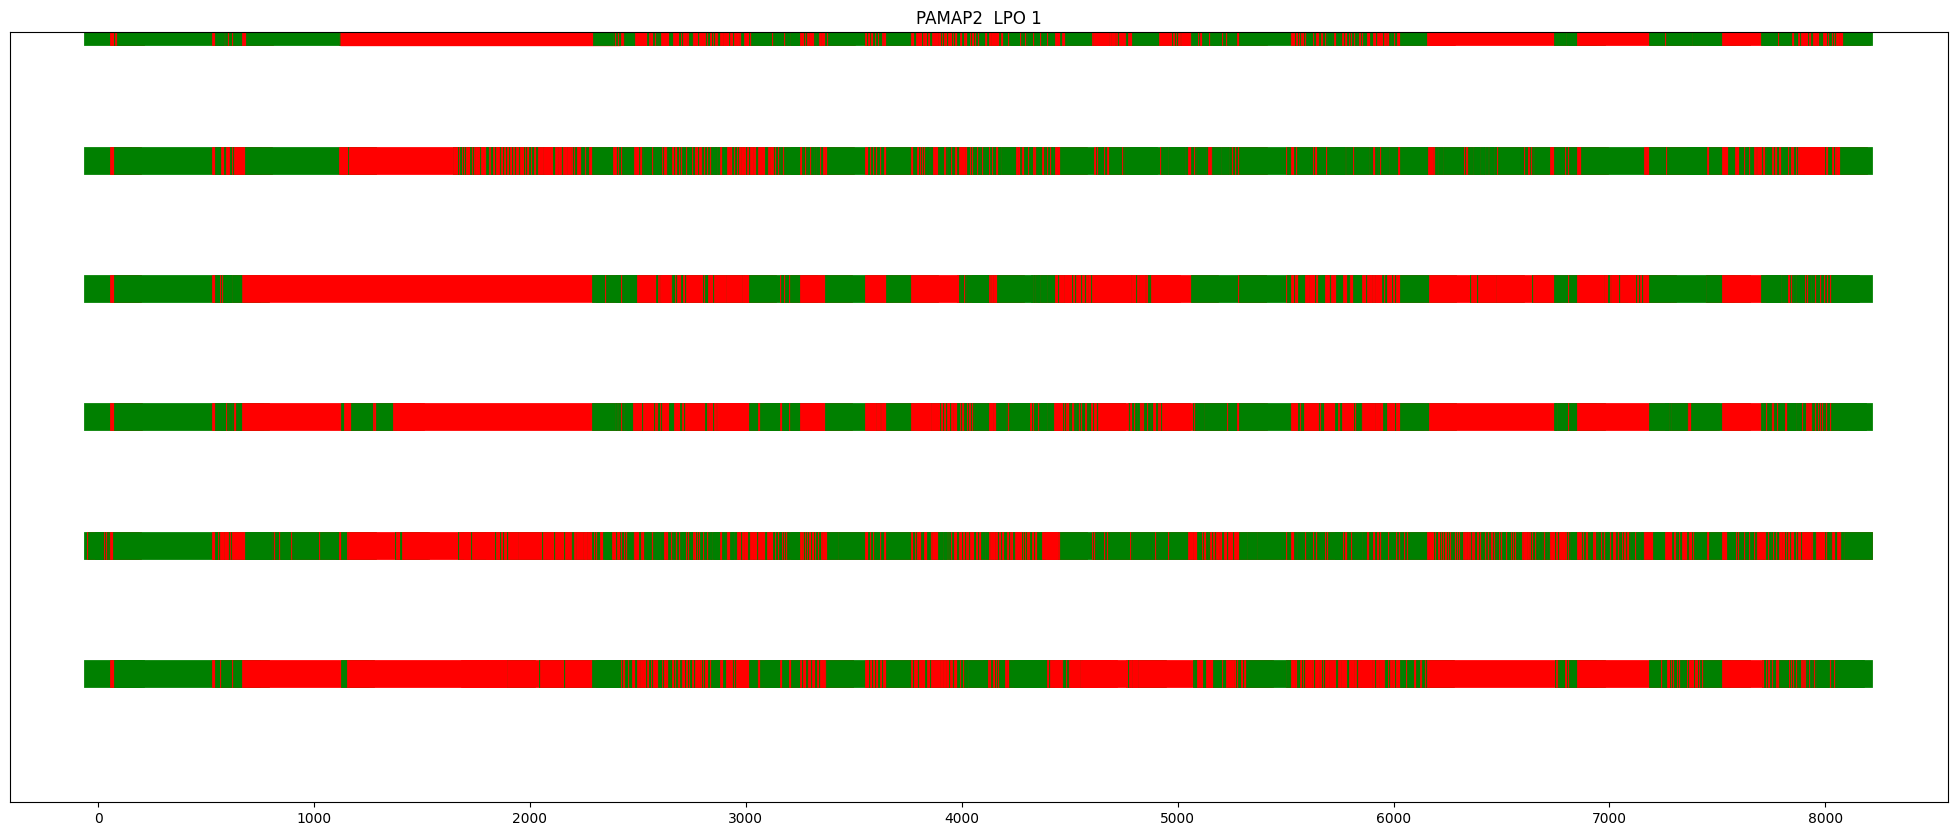

<Figure size 3000x1000 with 0 Axes>

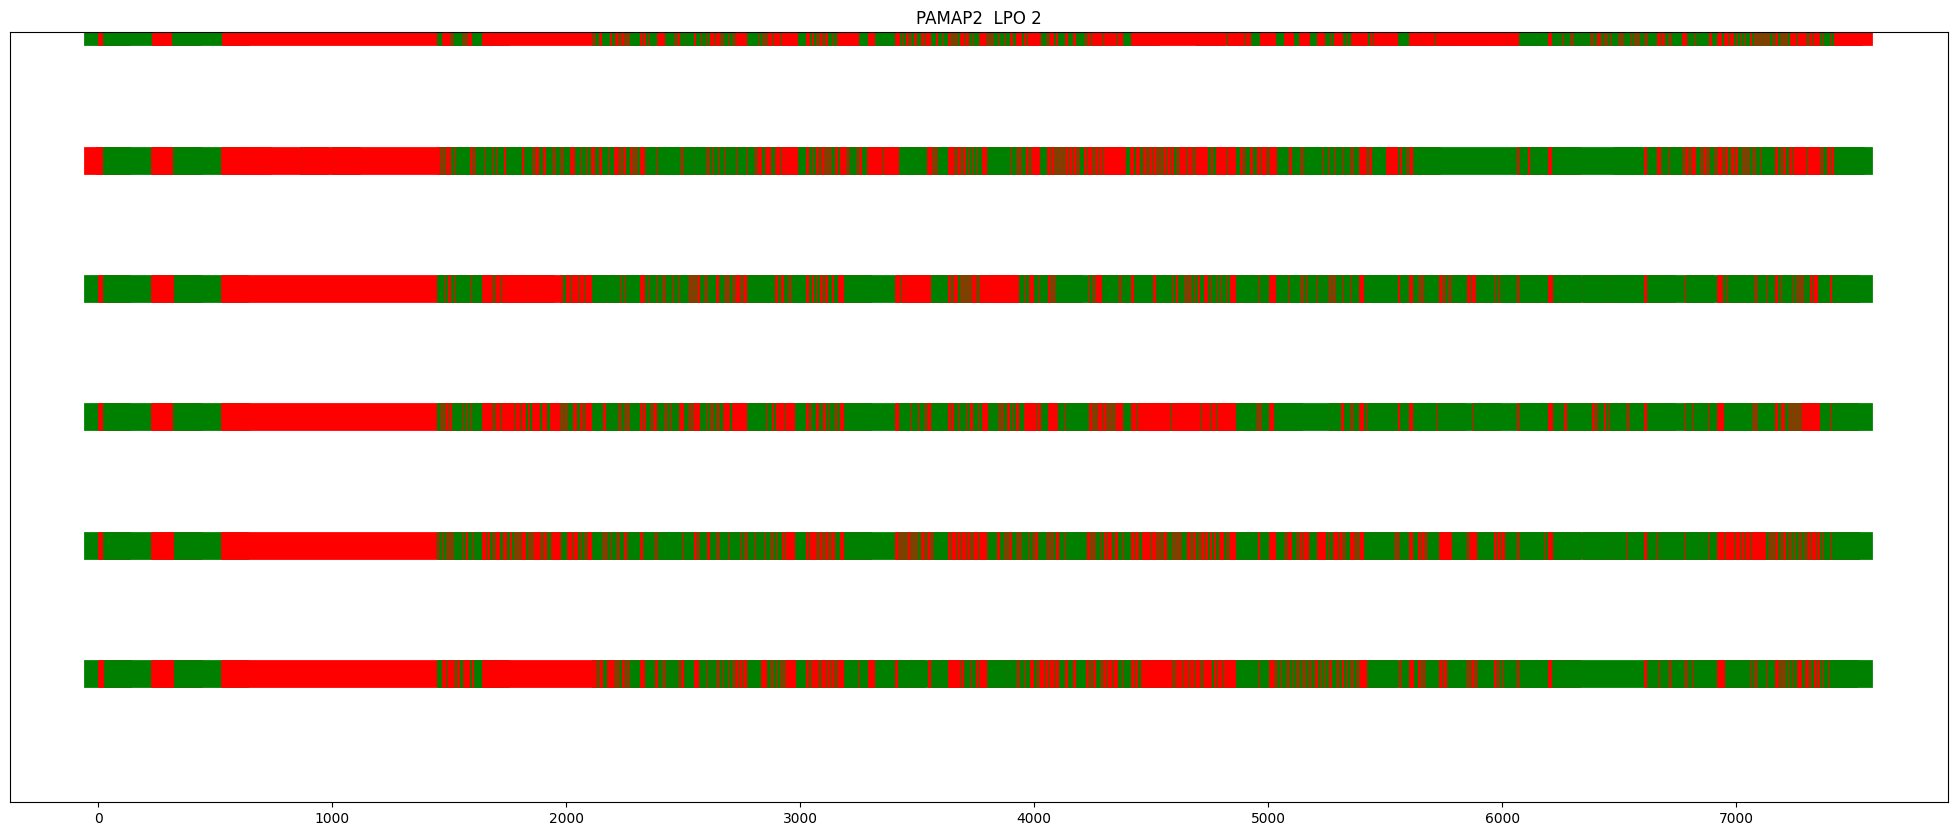

<Figure size 3000x1000 with 0 Axes>

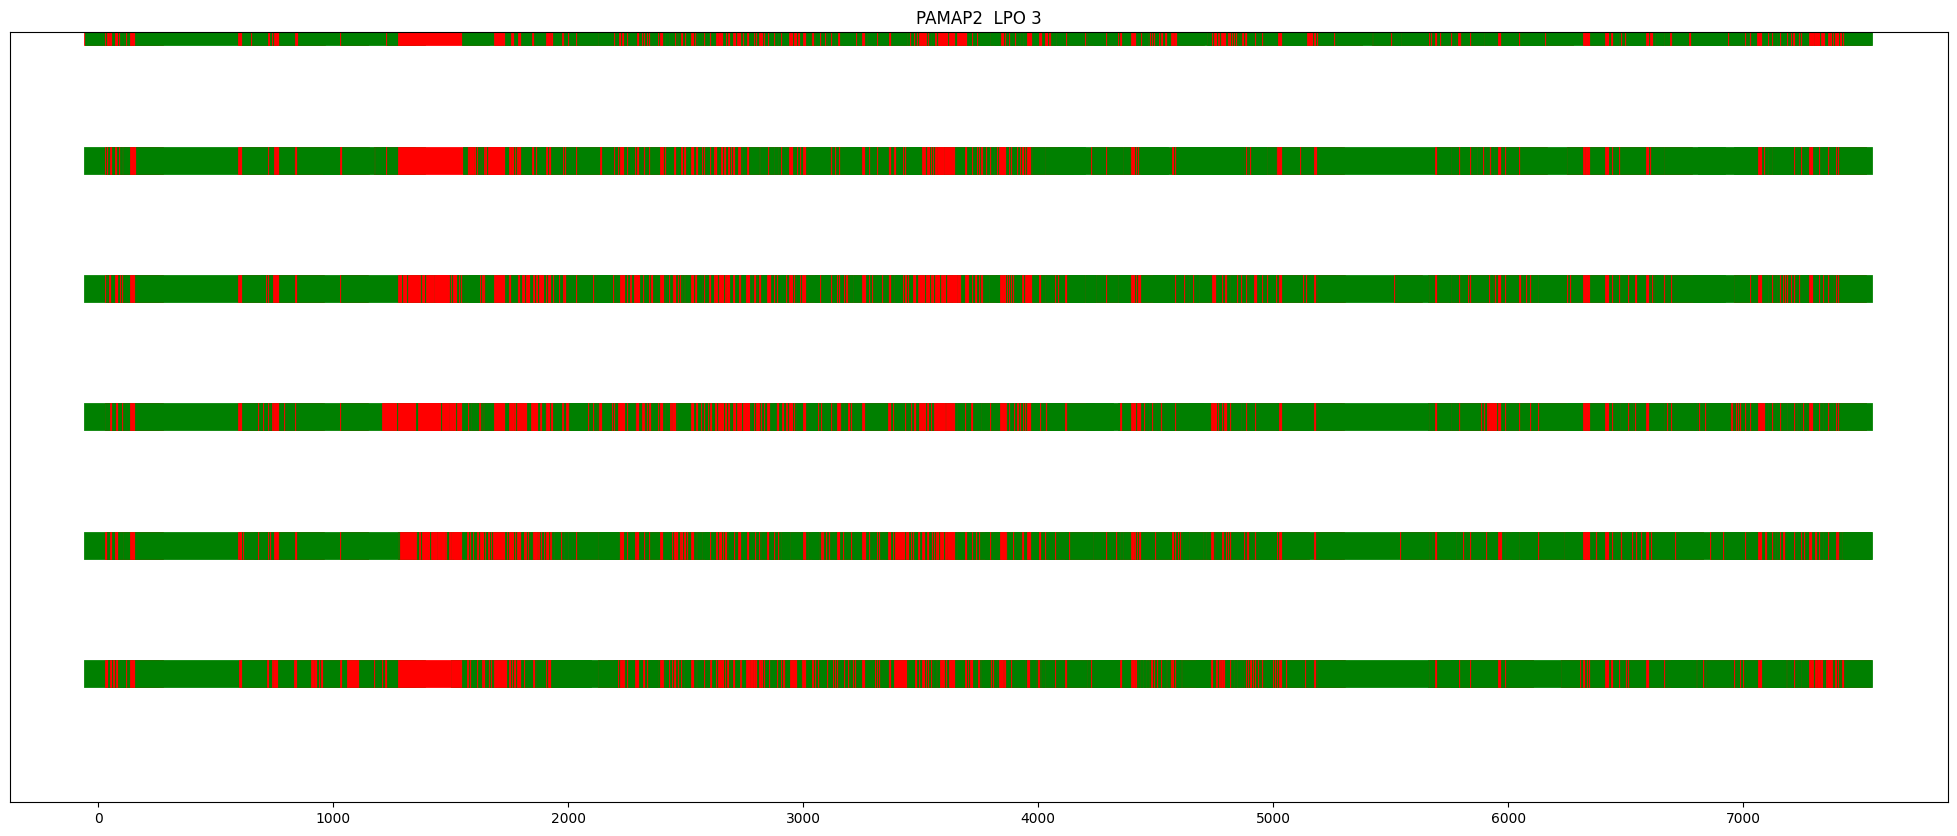

<Figure size 3000x1000 with 0 Axes>

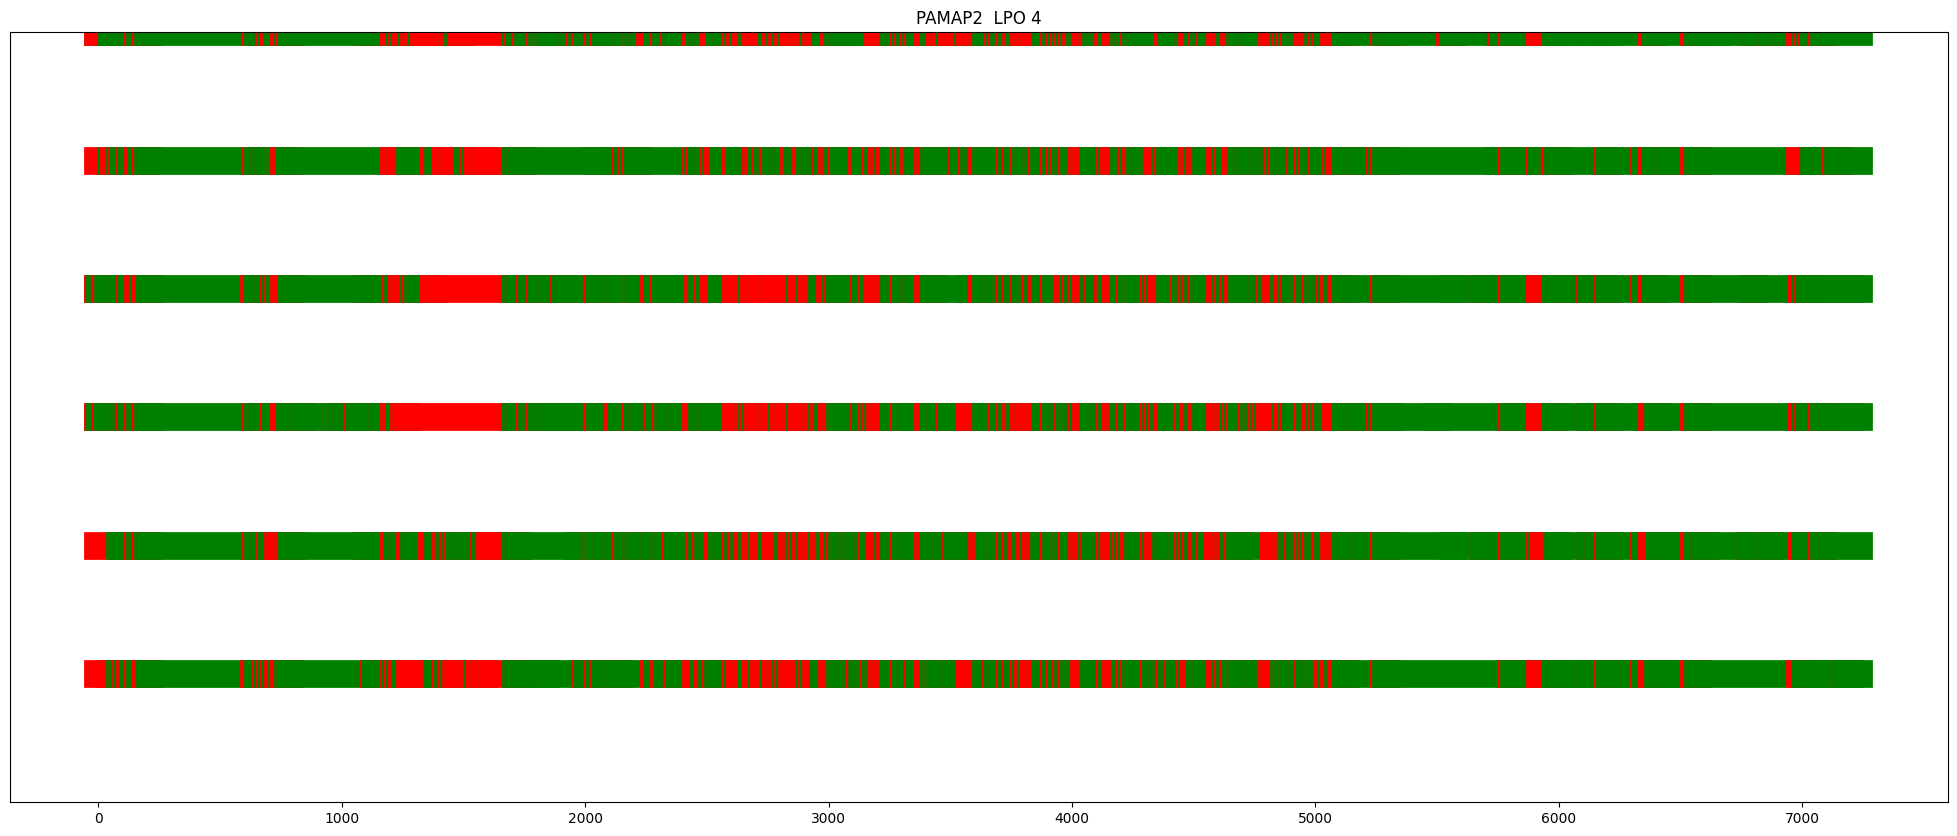

<Figure size 3000x1000 with 0 Axes>

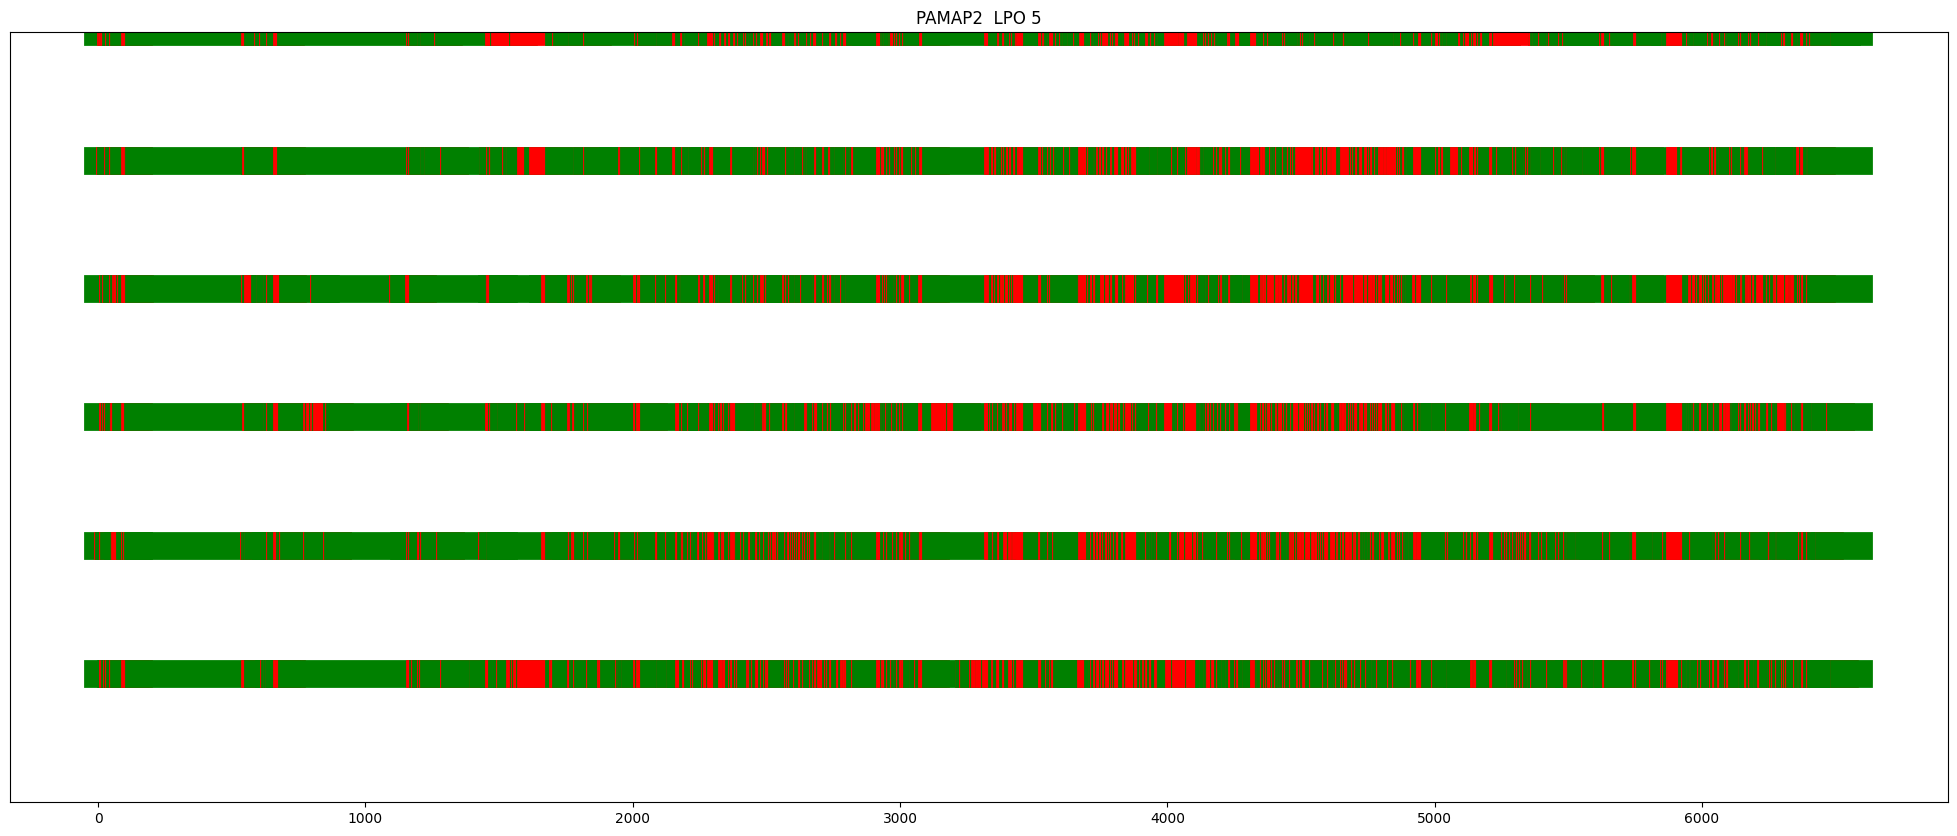

<Figure size 3000x1000 with 0 Axes>

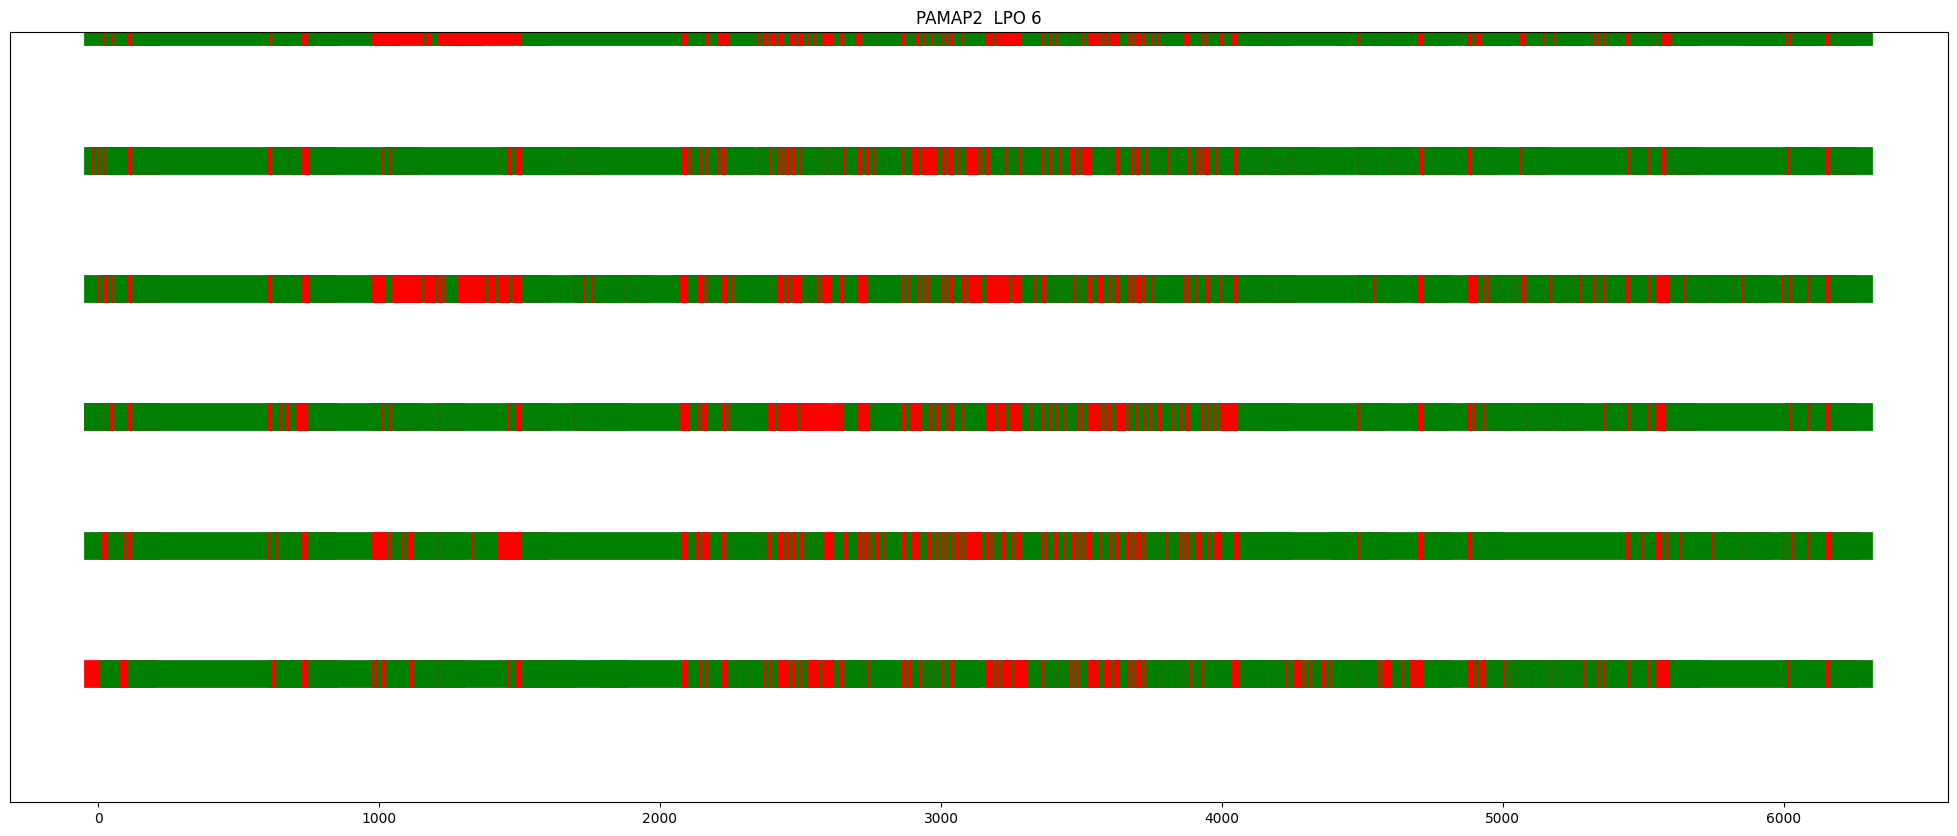

<Figure size 3000x1000 with 0 Axes>

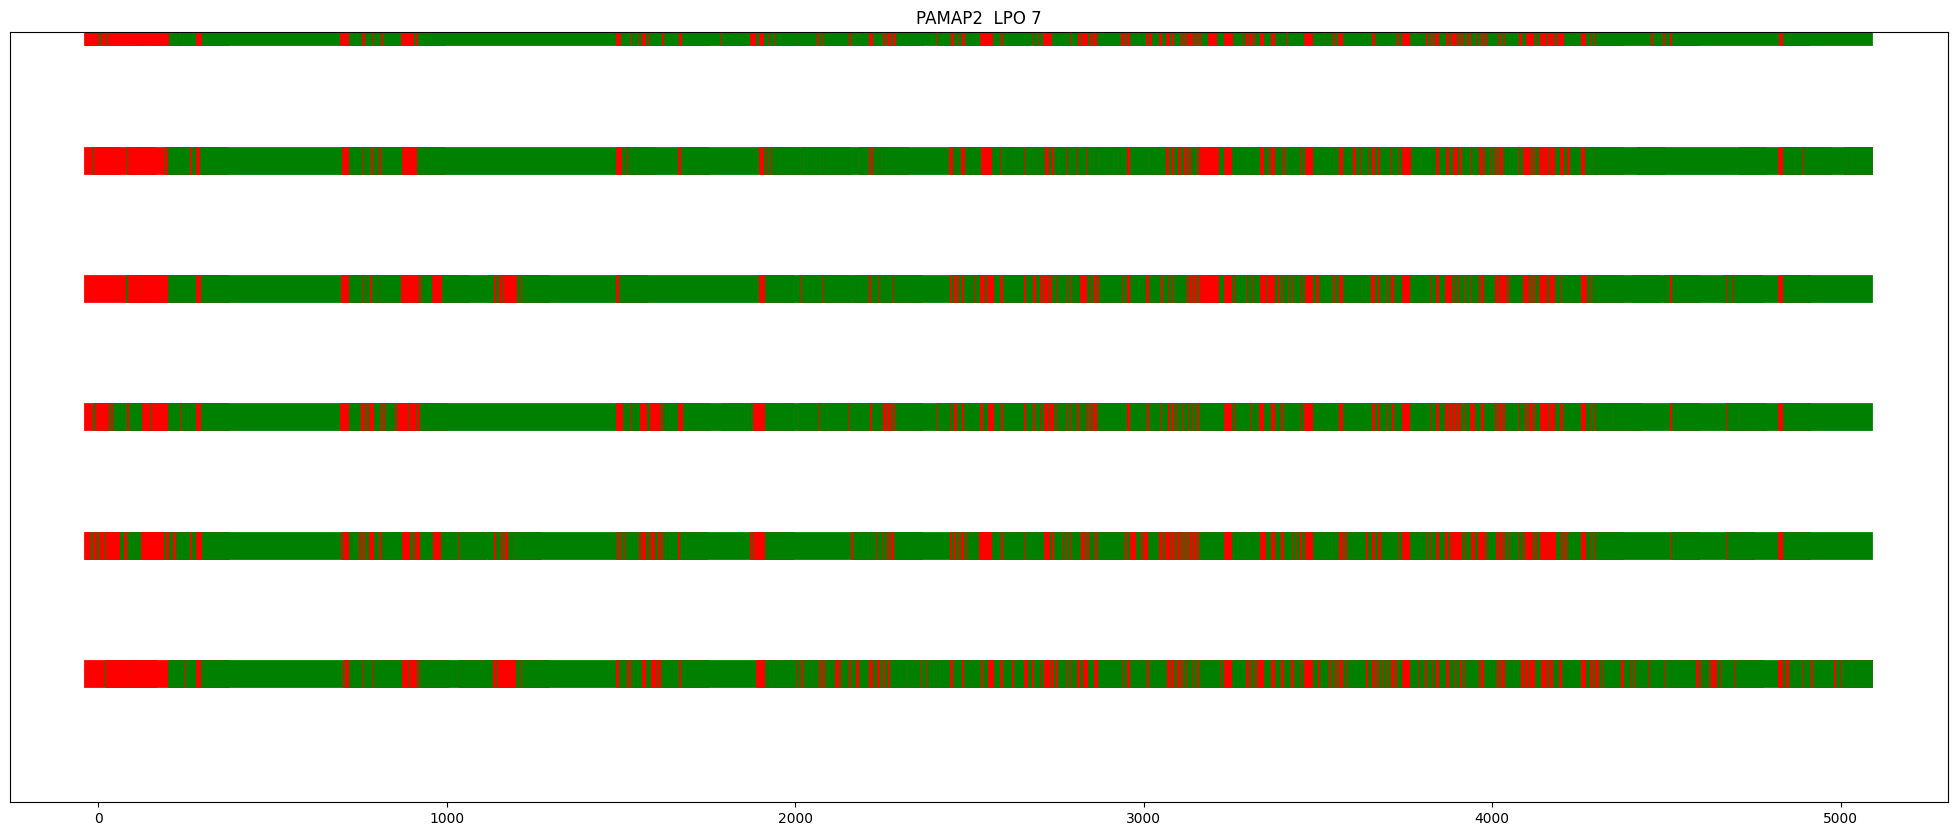

<Figure size 3000x1000 with 0 Axes>

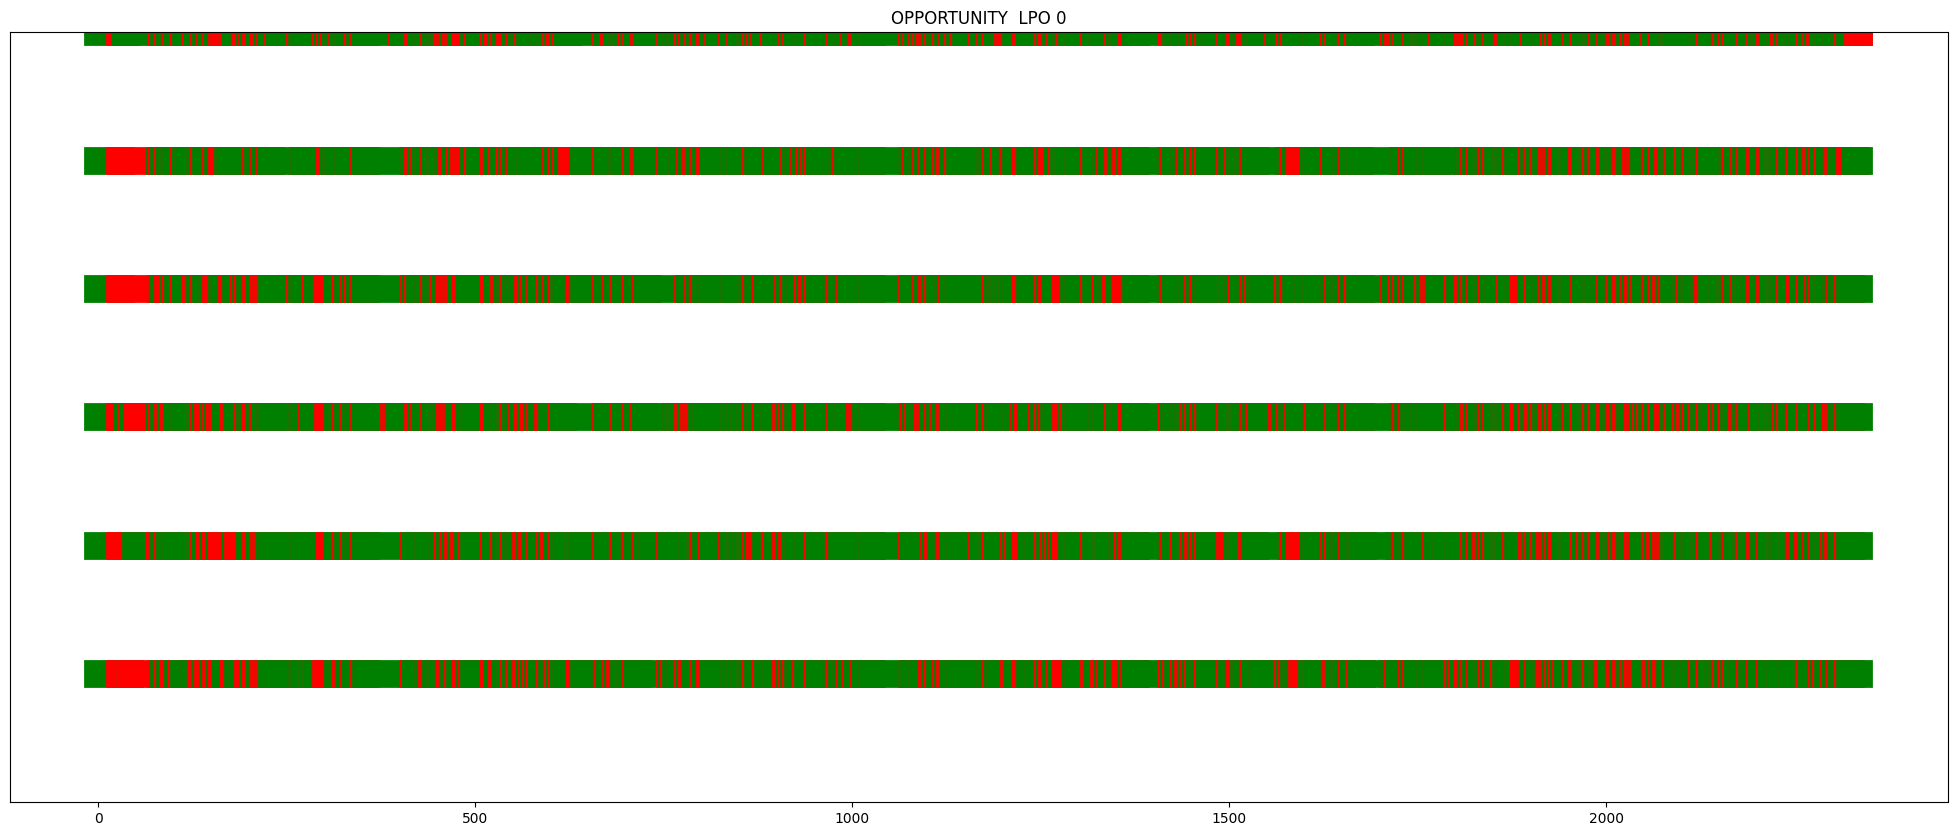

<Figure size 3000x1000 with 0 Axes>

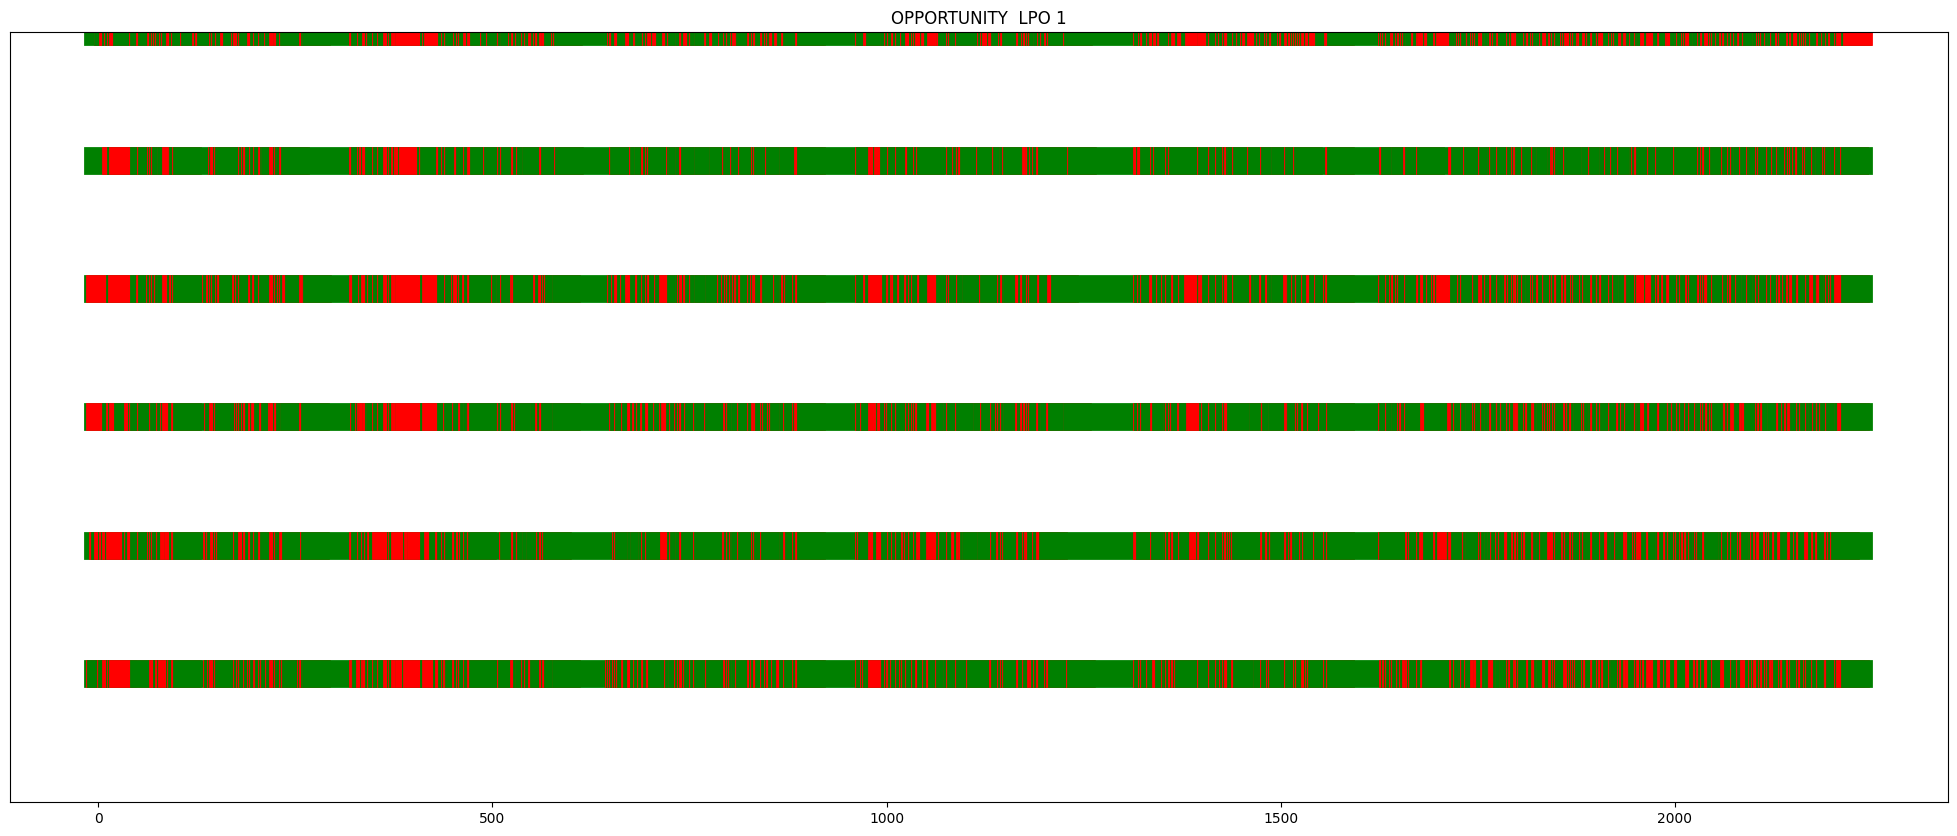

<Figure size 3000x1000 with 0 Axes>

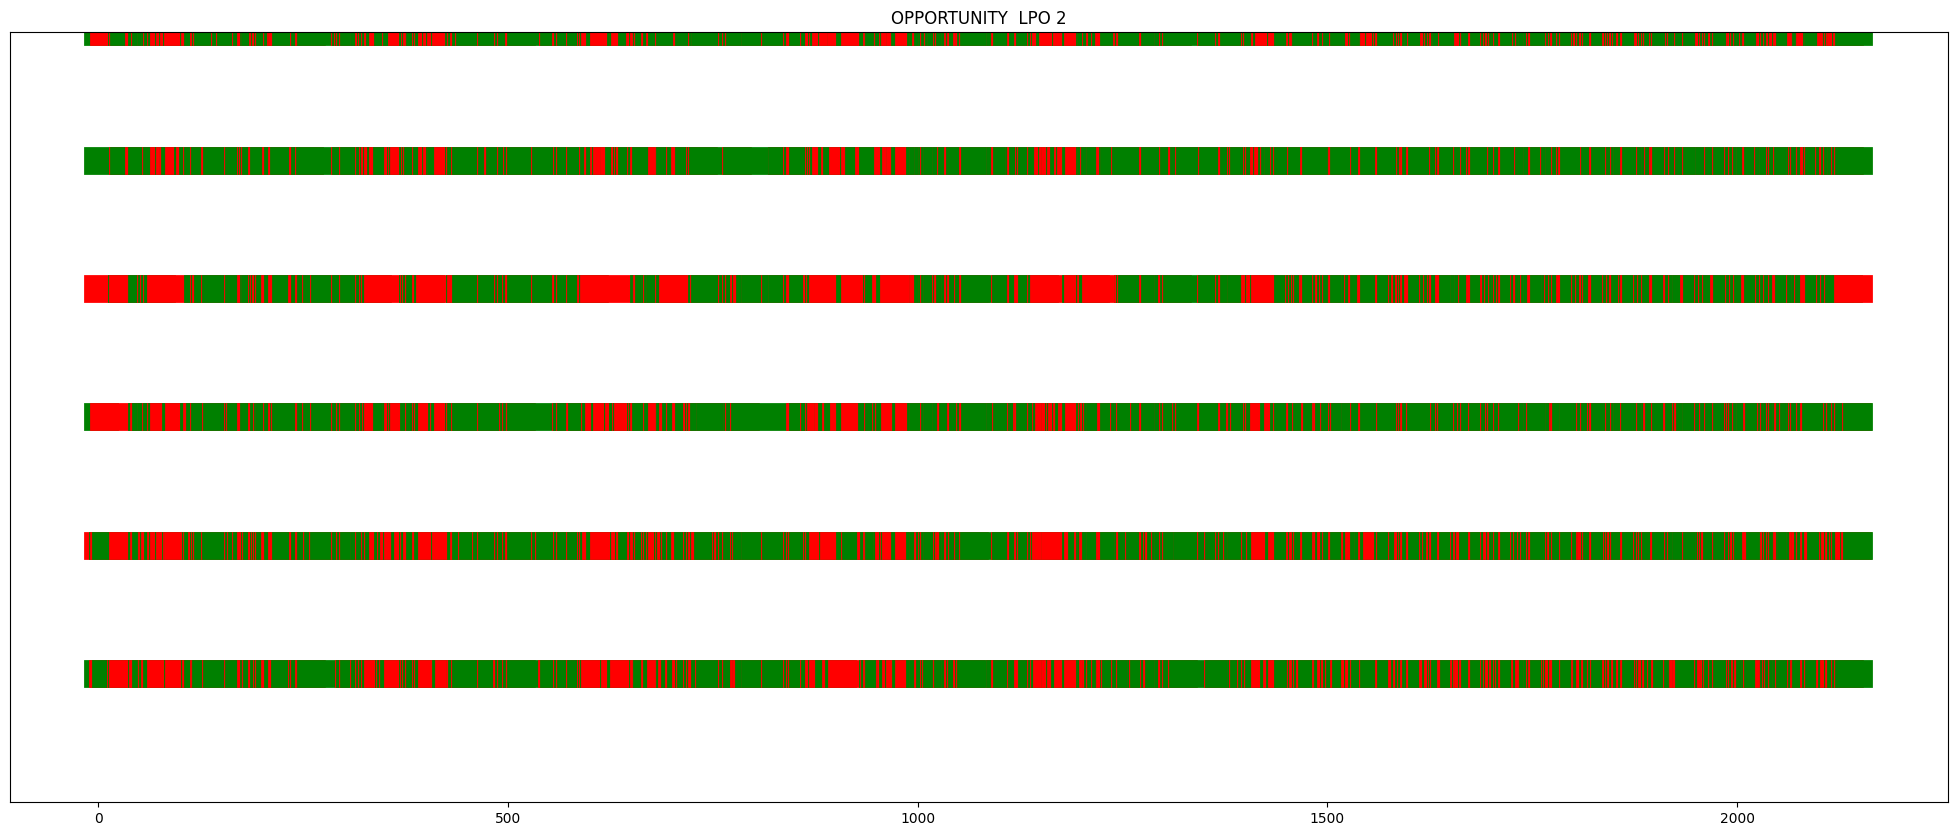

<Figure size 3000x1000 with 0 Axes>

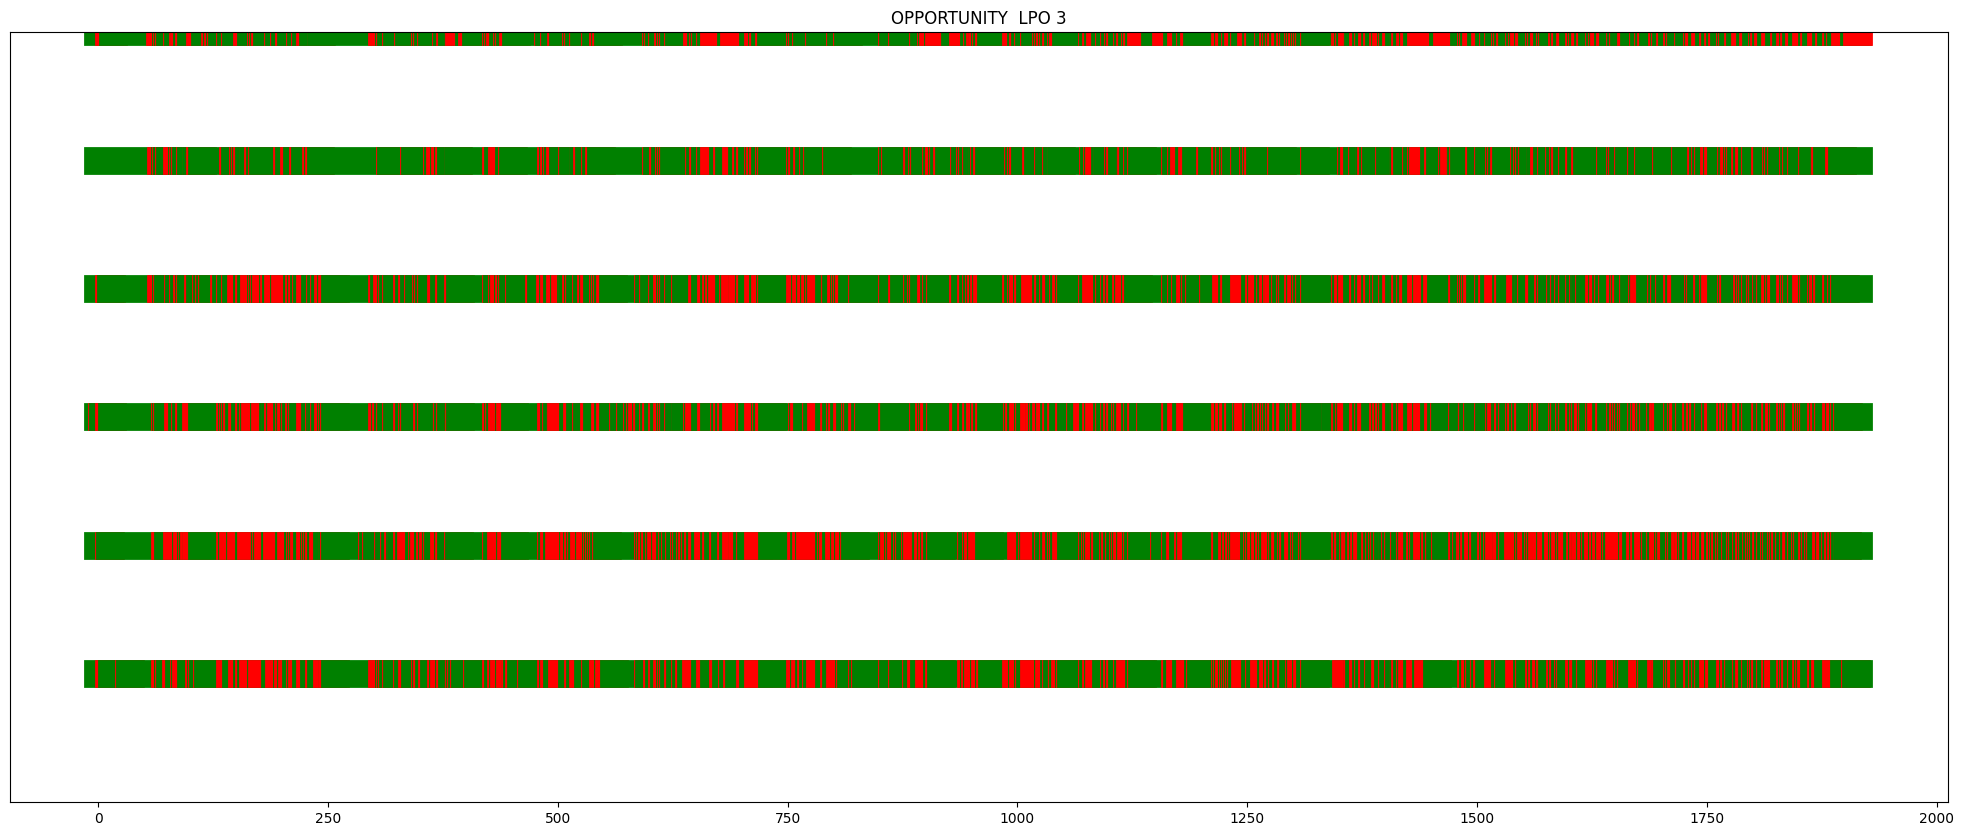

<Figure size 3000x1000 with 0 Axes>

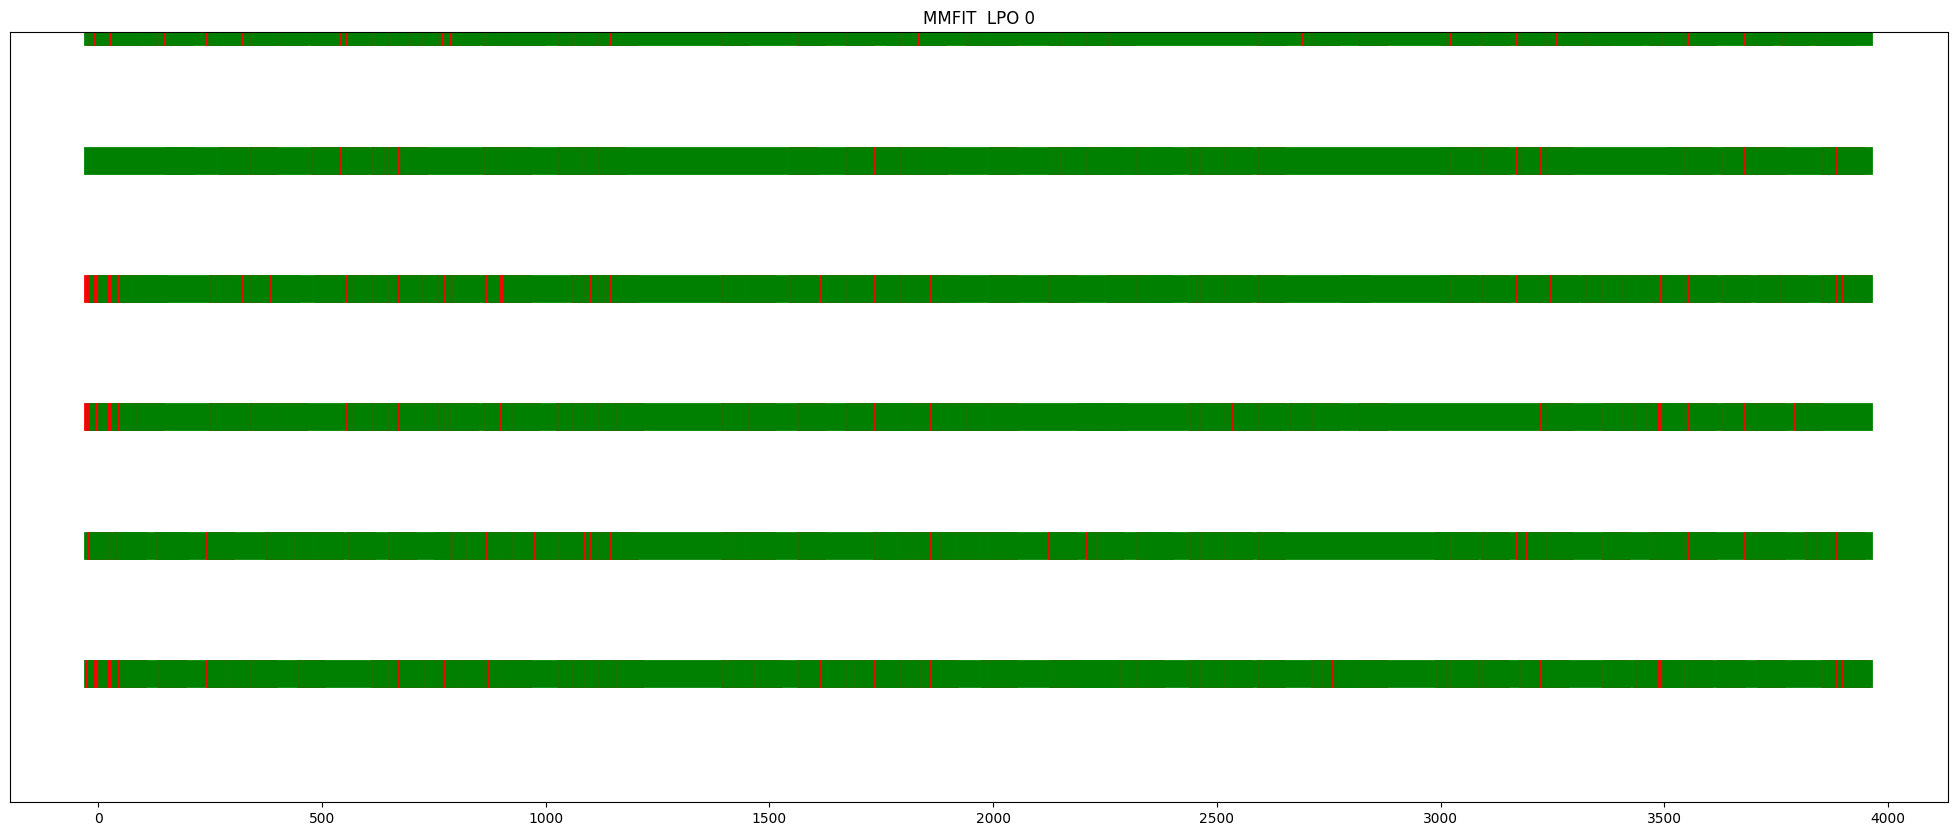

<Figure size 3000x1000 with 0 Axes>

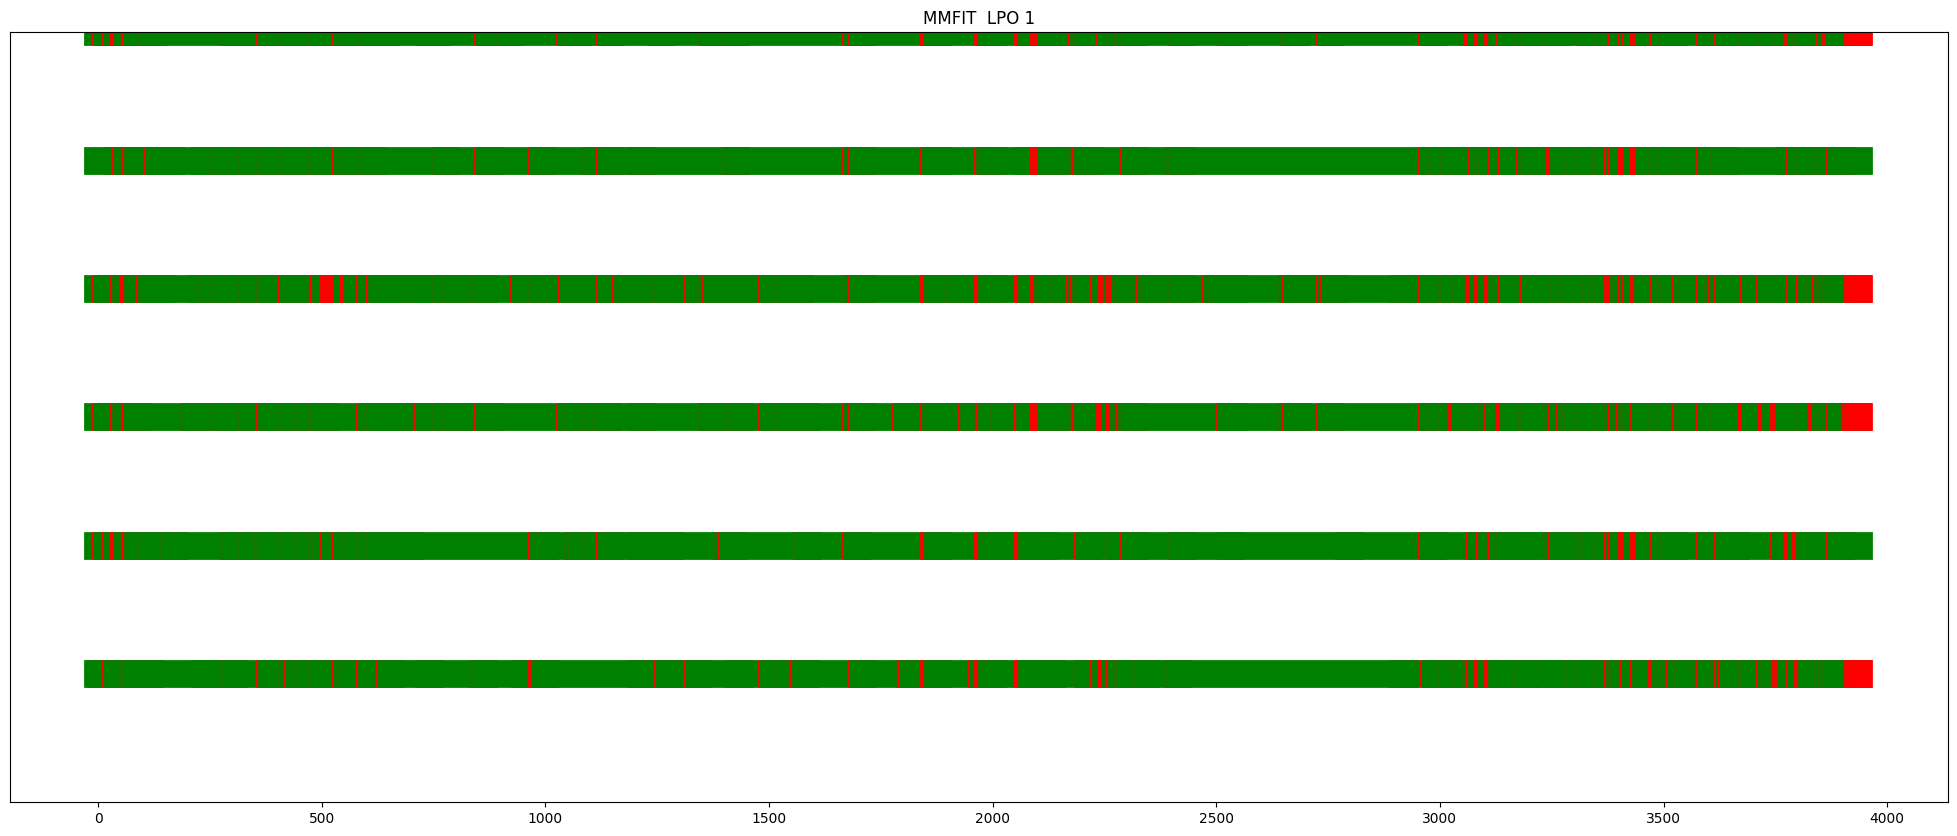

<Figure size 3000x1000 with 0 Axes>

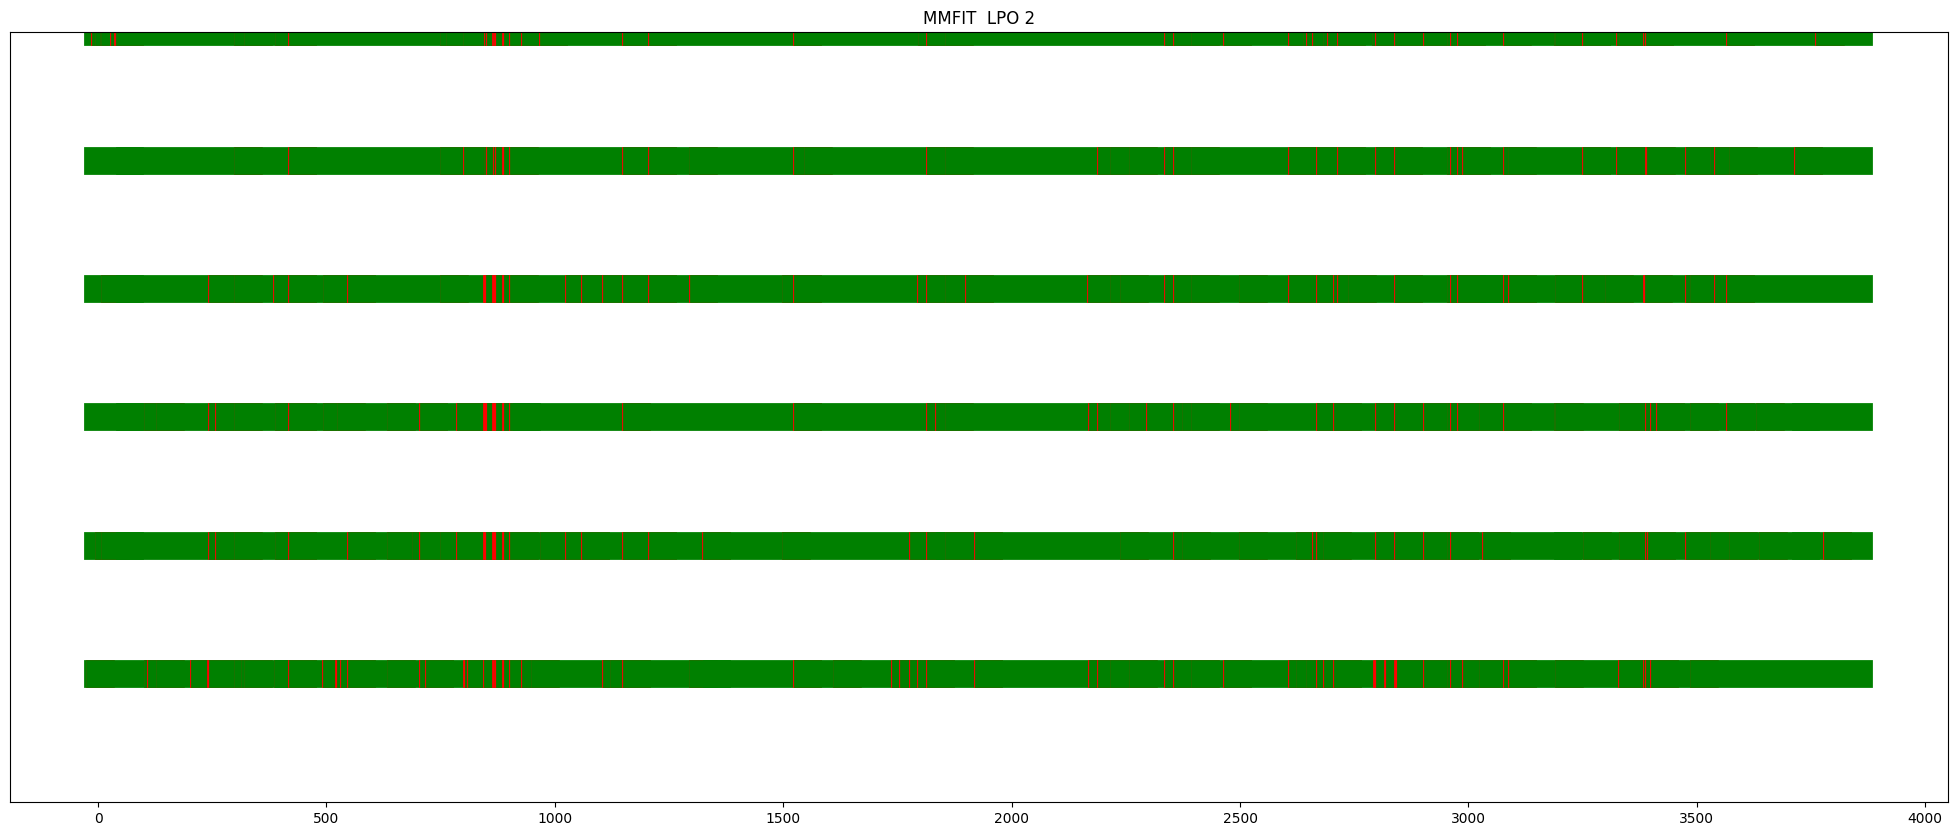

<Figure size 3000x1000 with 0 Axes>

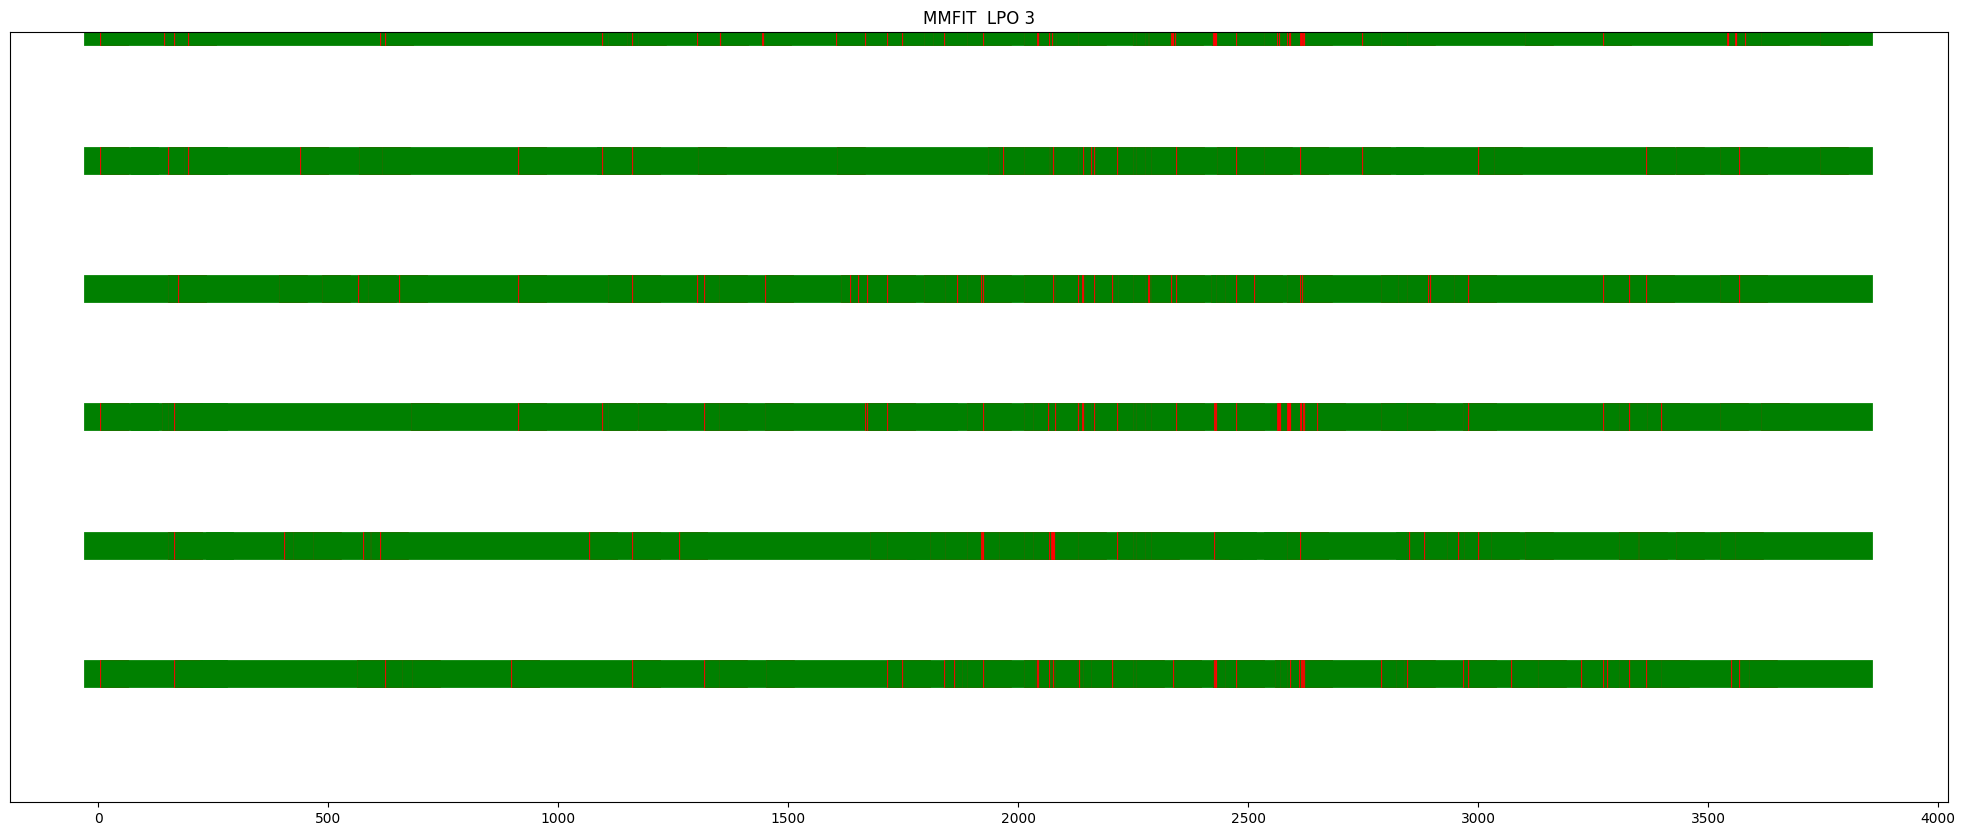

<Figure size 3000x1000 with 0 Axes>

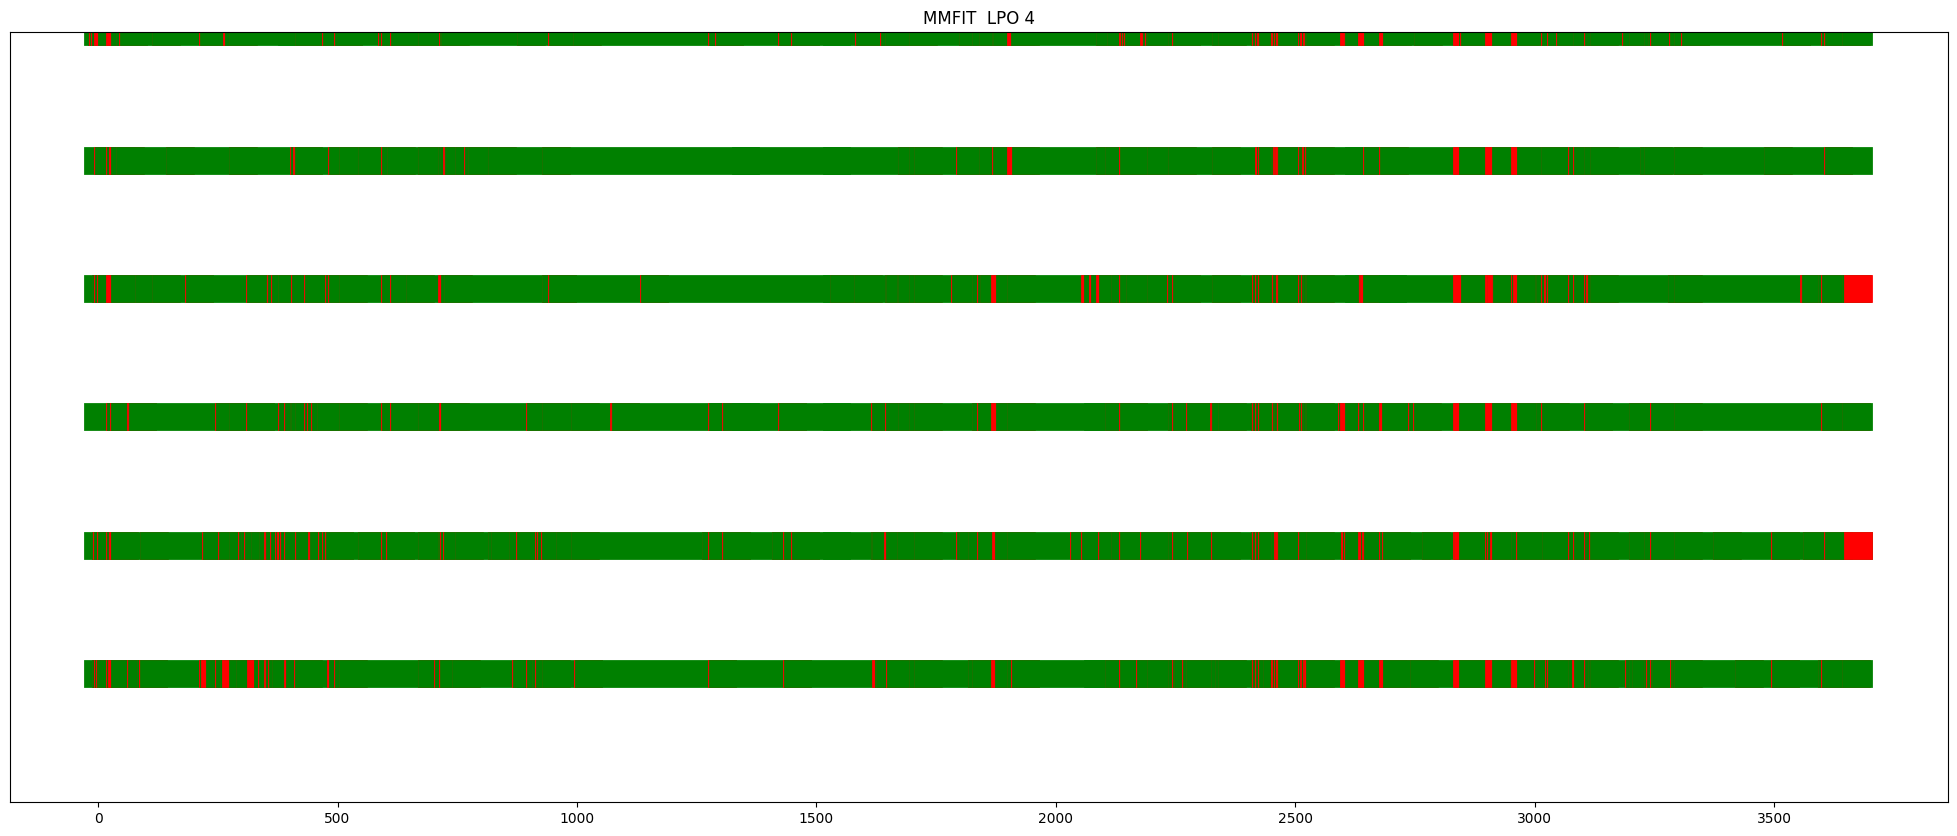

<Figure size 3000x1000 with 0 Axes>

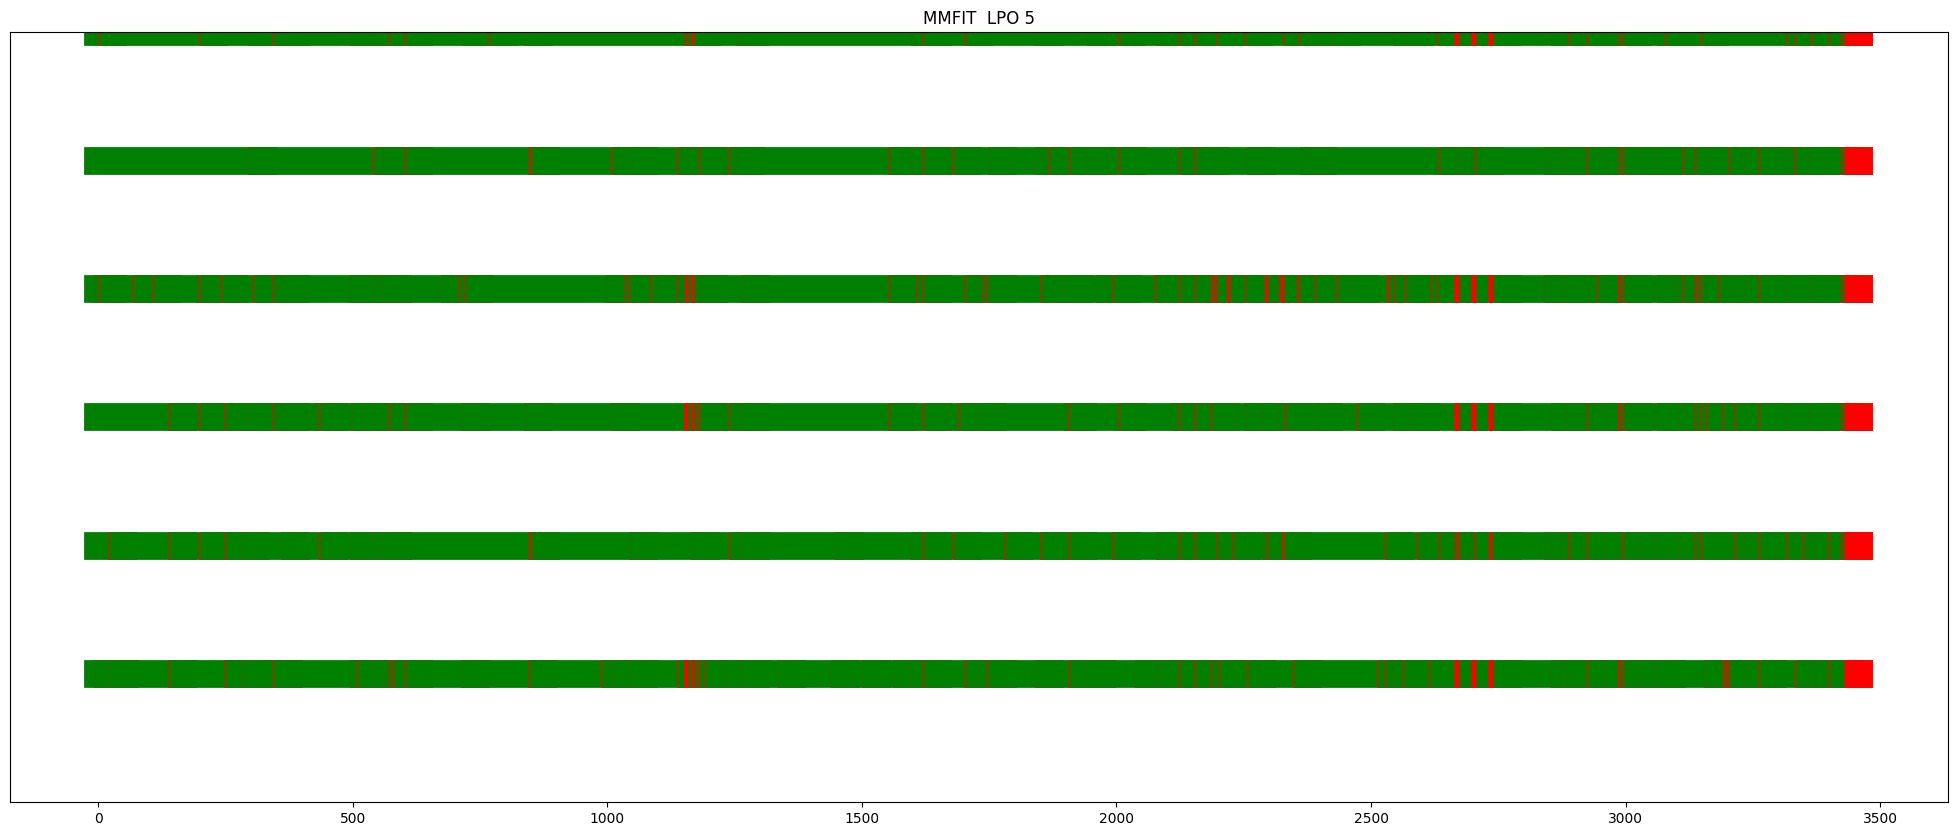

<Figure size 3000x1000 with 0 Axes>

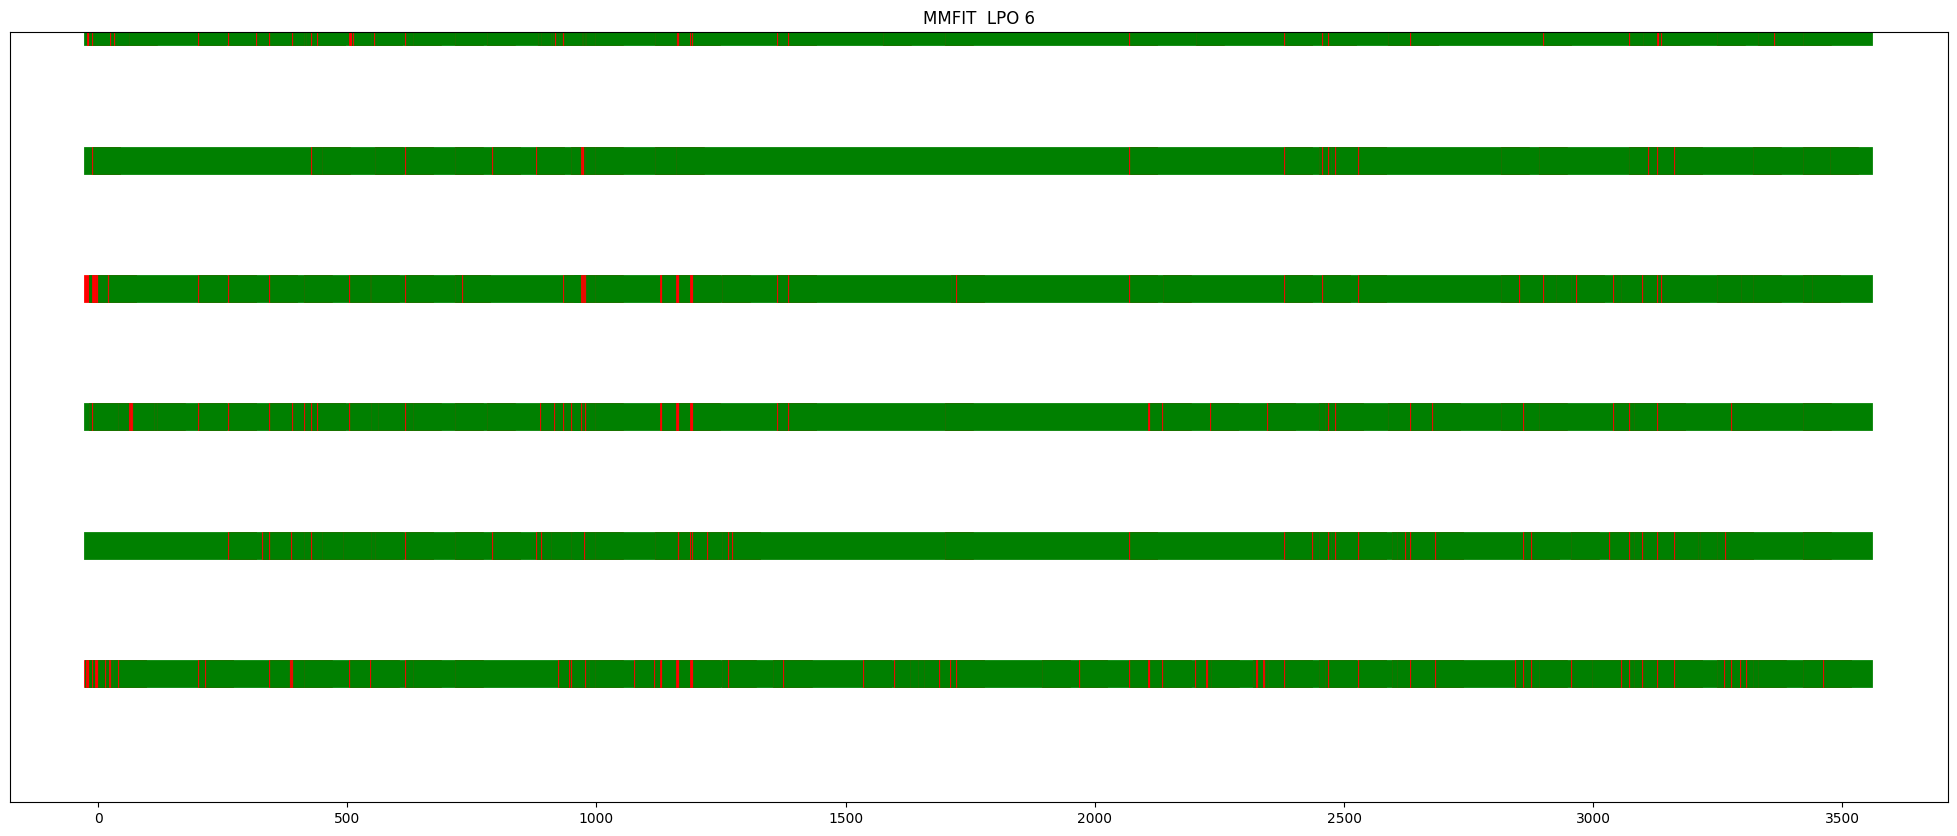

<Figure size 3000x1000 with 0 Axes>

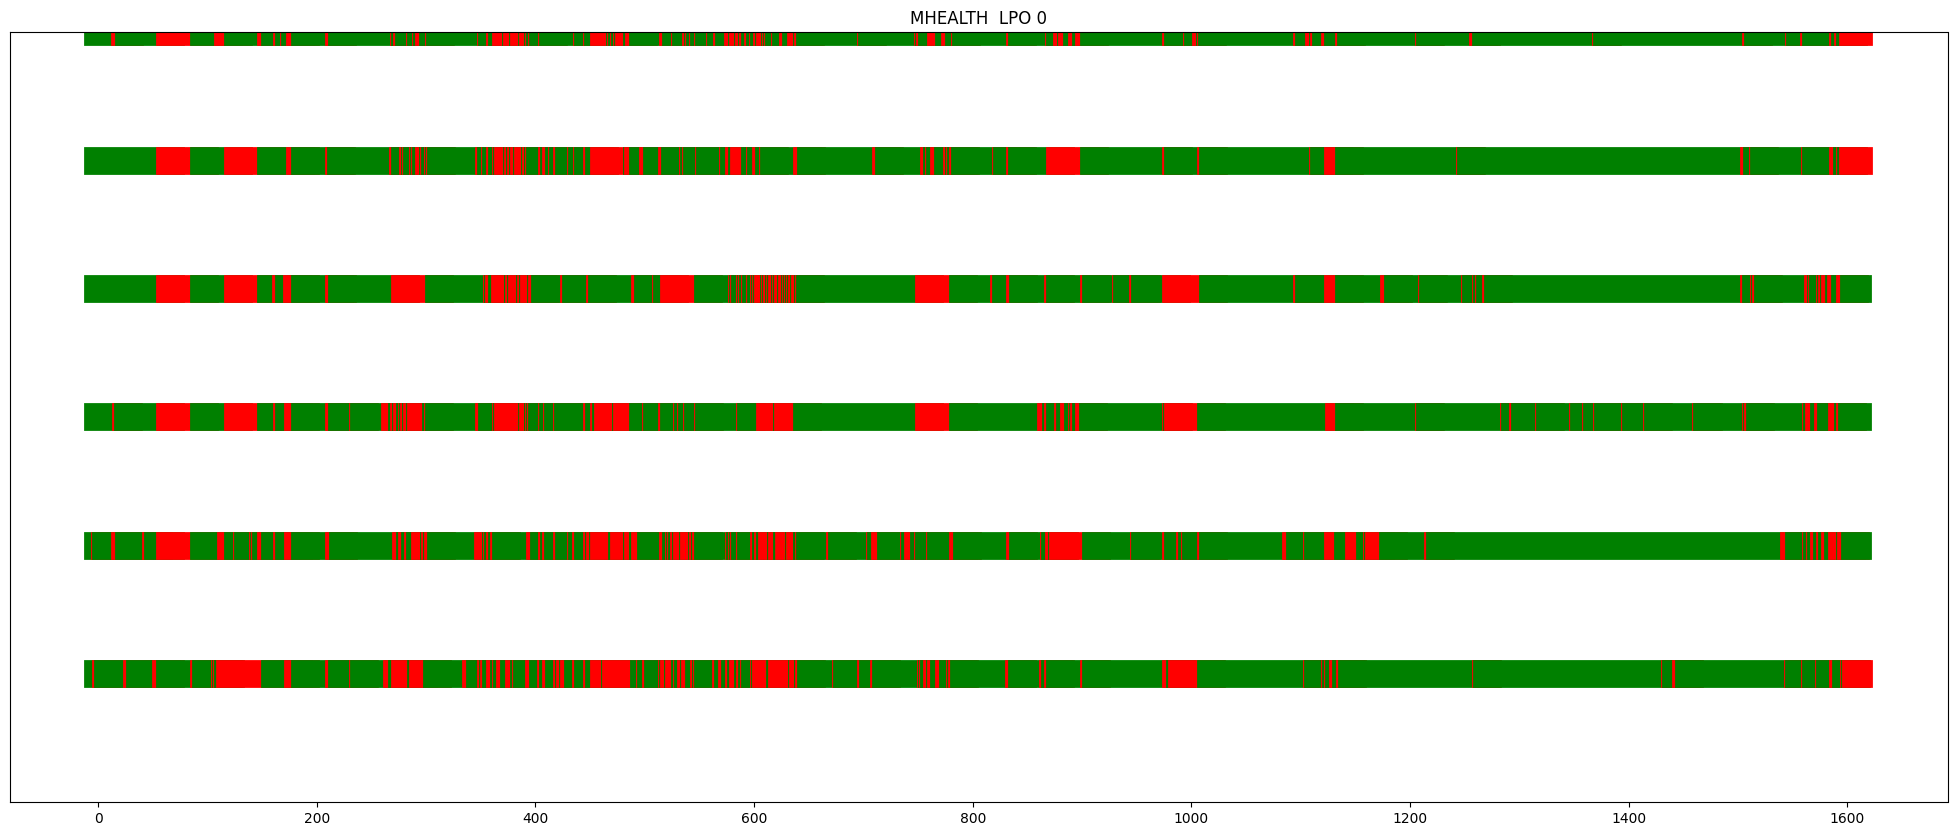

<Figure size 3000x1000 with 0 Axes>

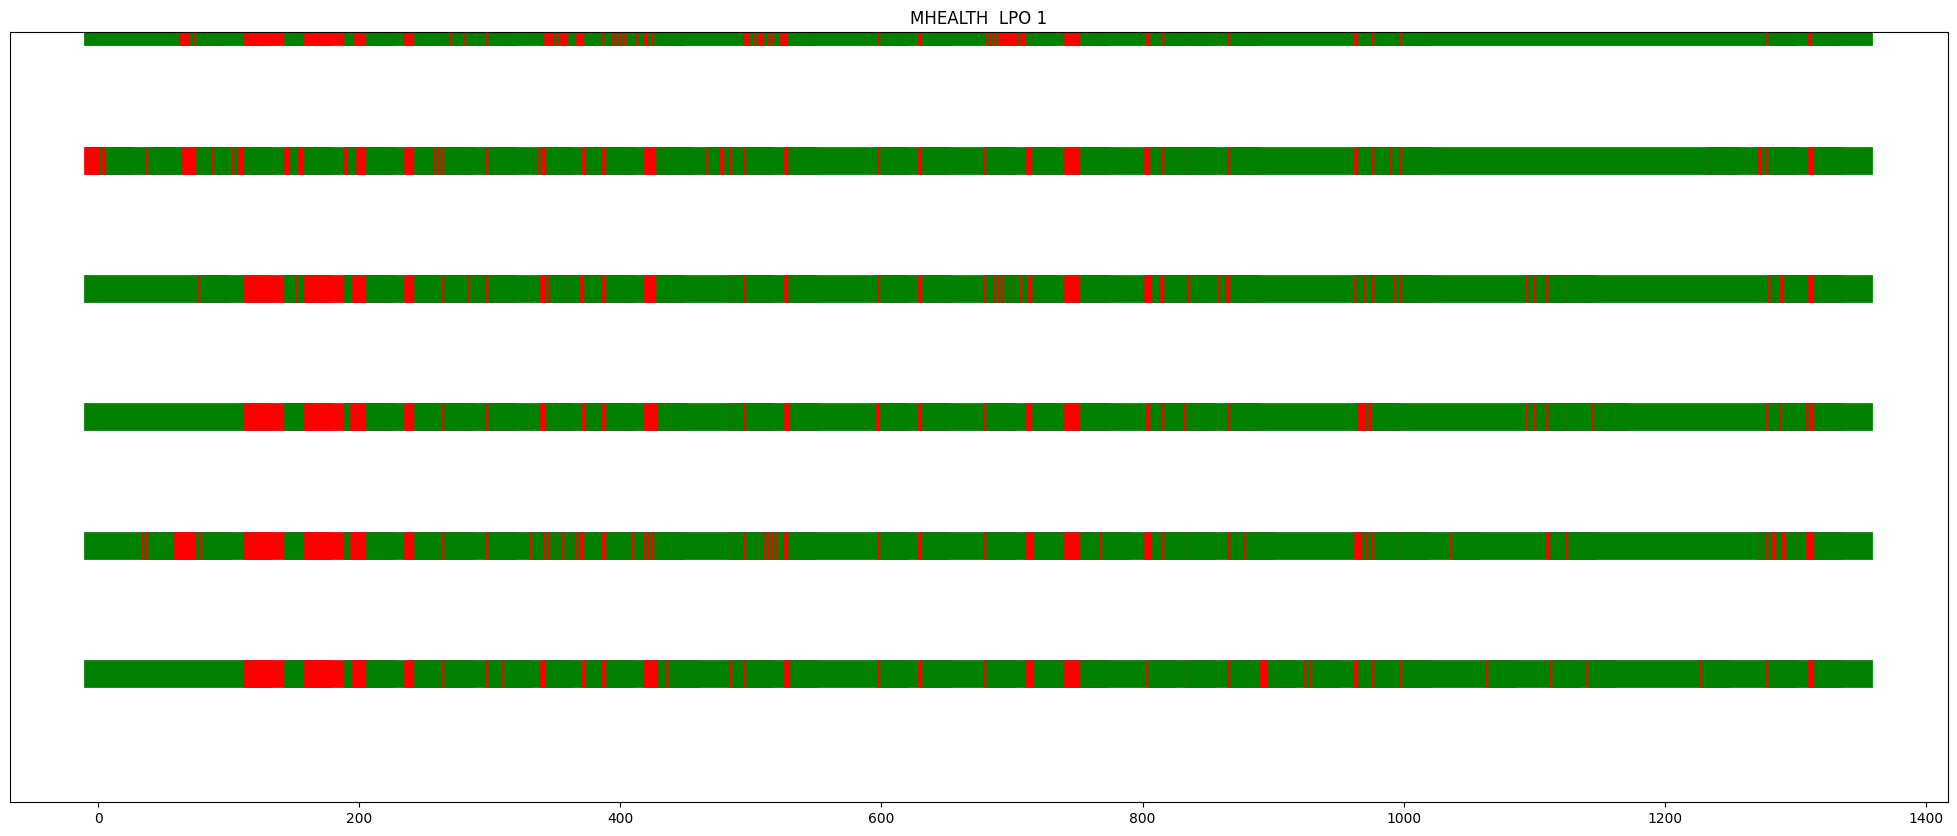

<Figure size 3000x1000 with 0 Axes>

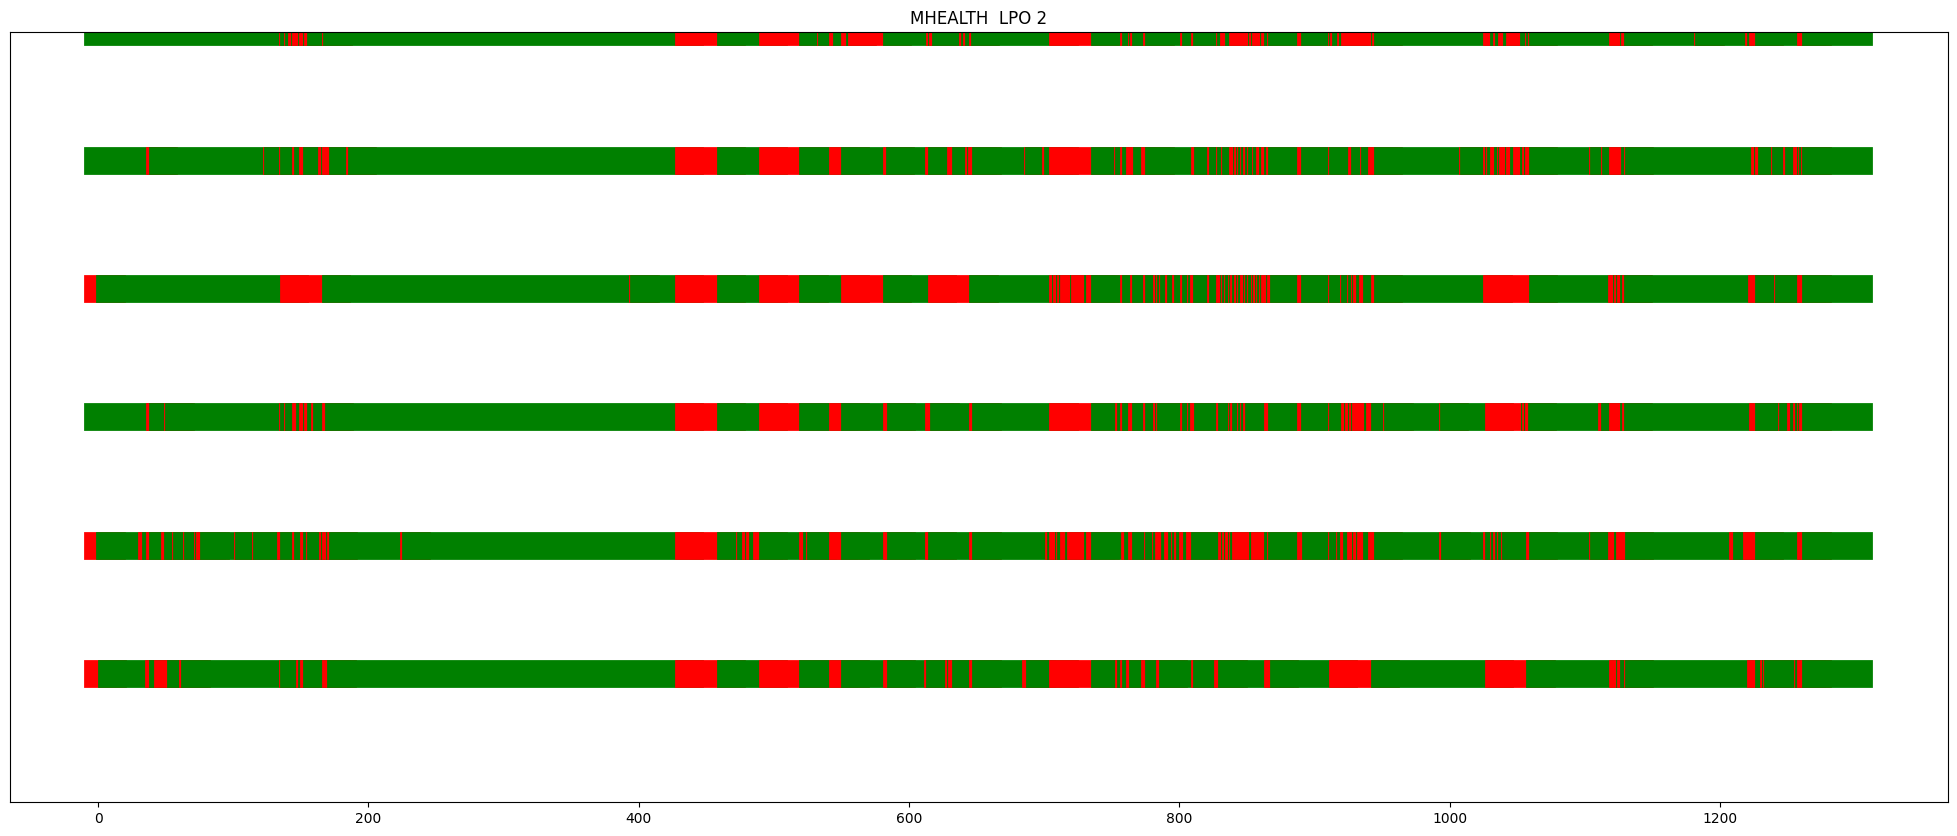

<Figure size 3000x1000 with 0 Axes>

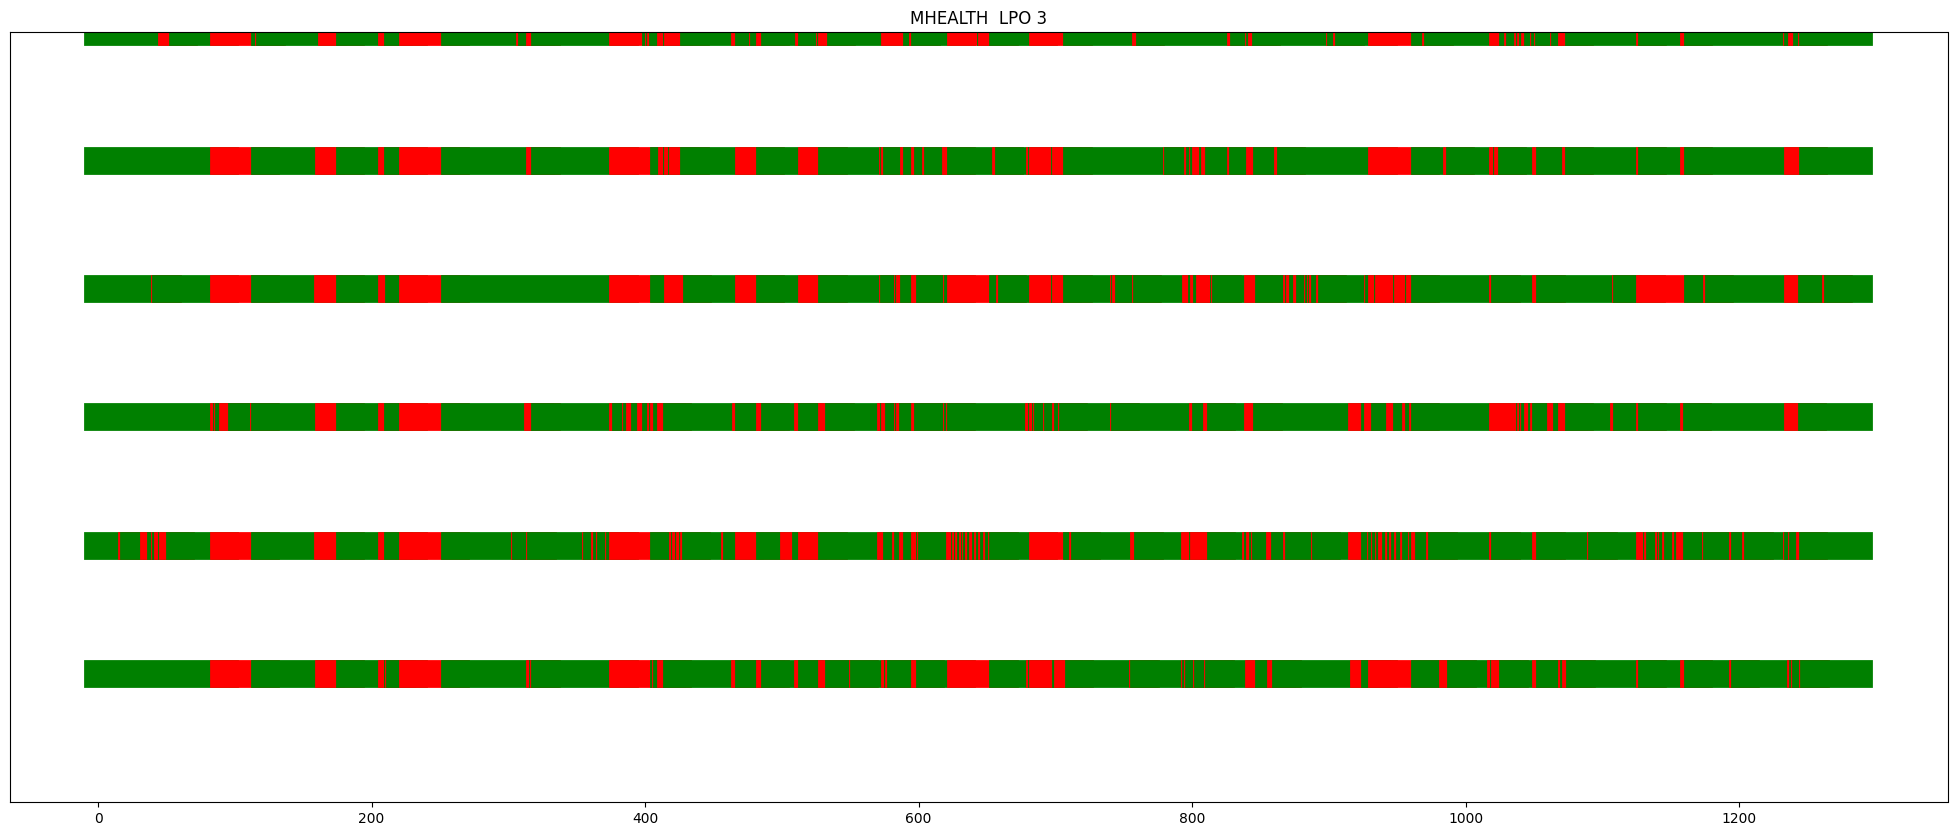

<Figure size 3000x1000 with 0 Axes>

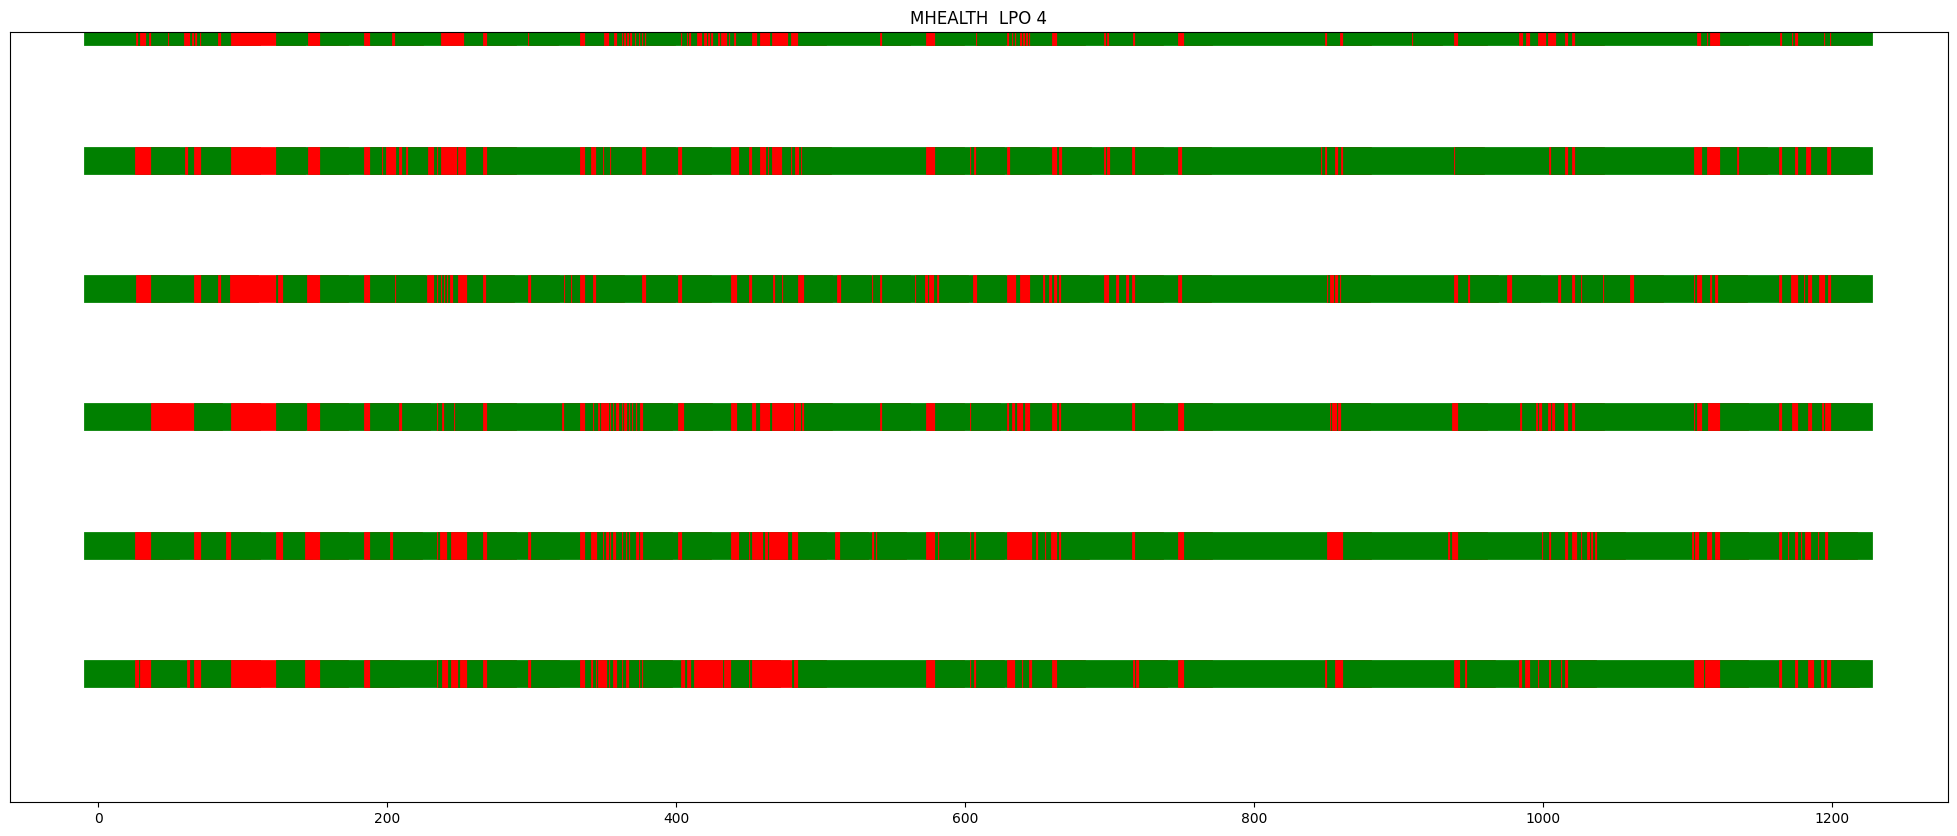

<Figure size 3000x1000 with 0 Axes>

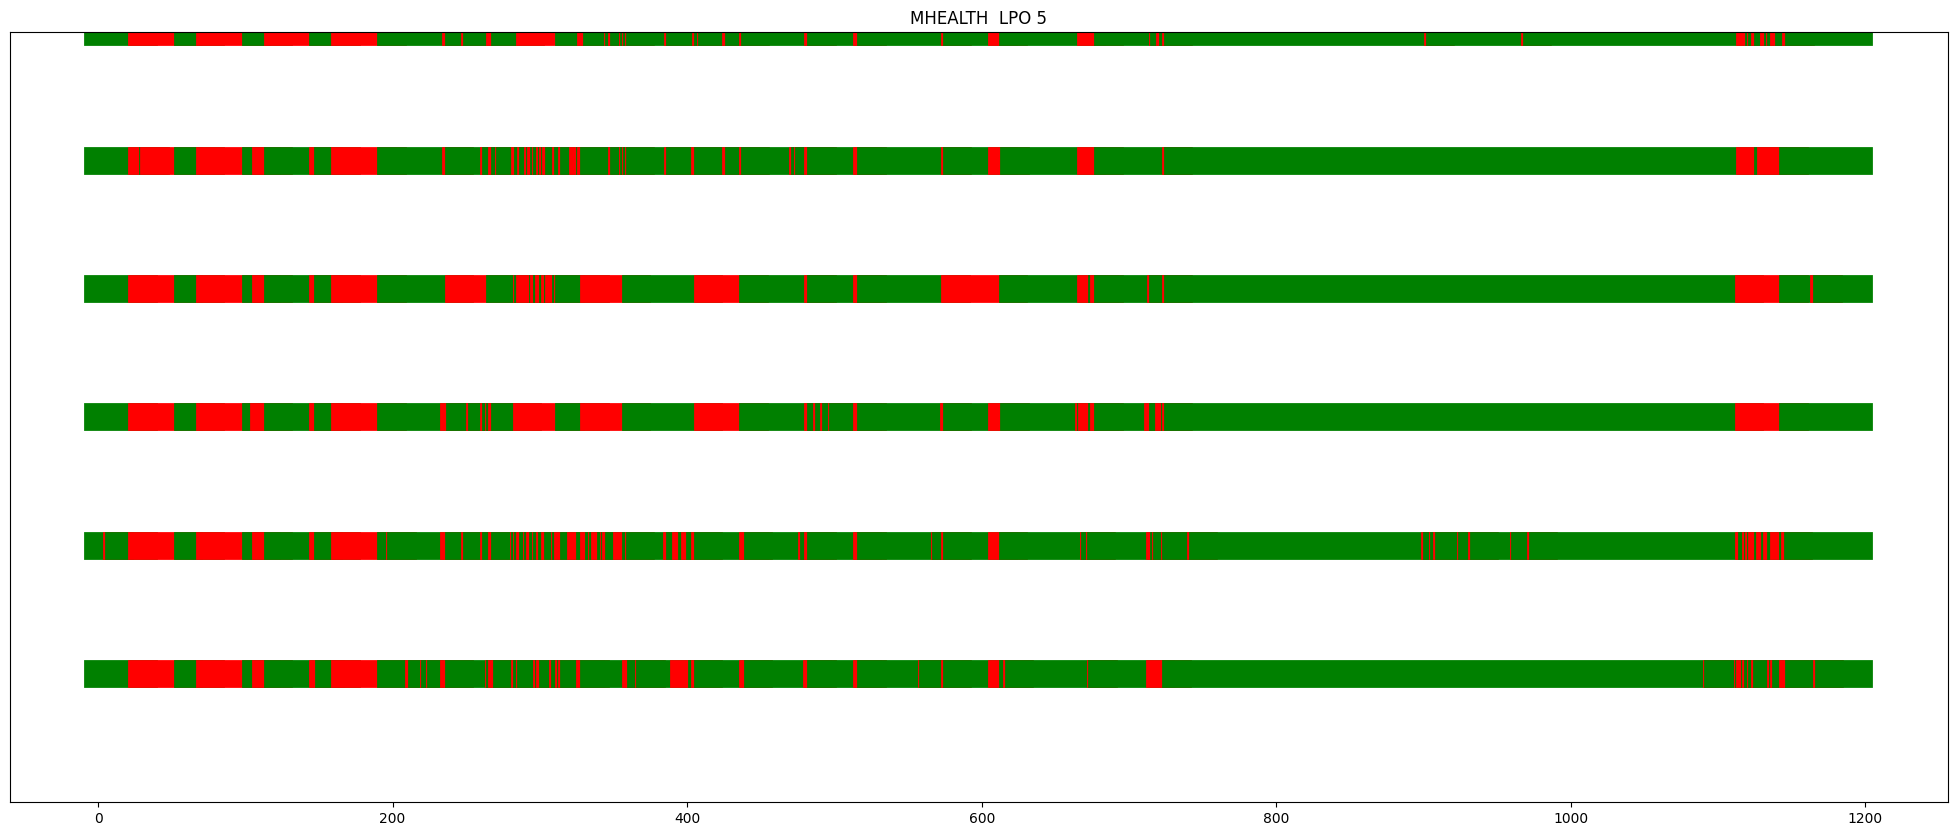

<Figure size 3000x1000 with 0 Axes>

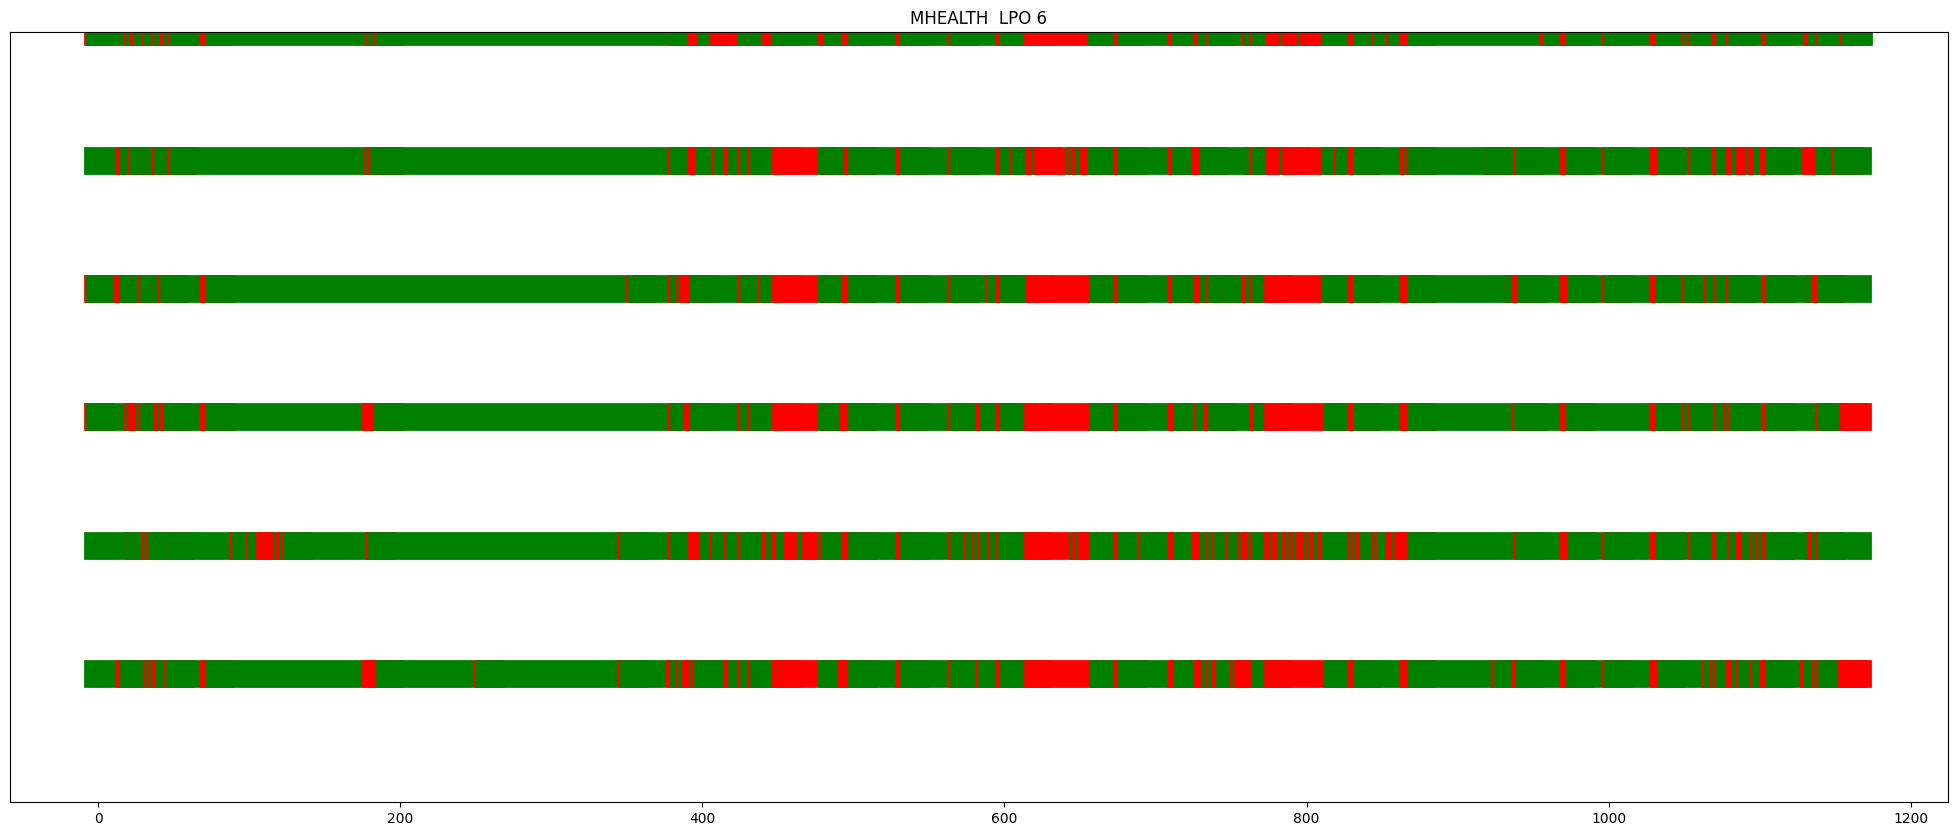

<Figure size 3000x1000 with 0 Axes>

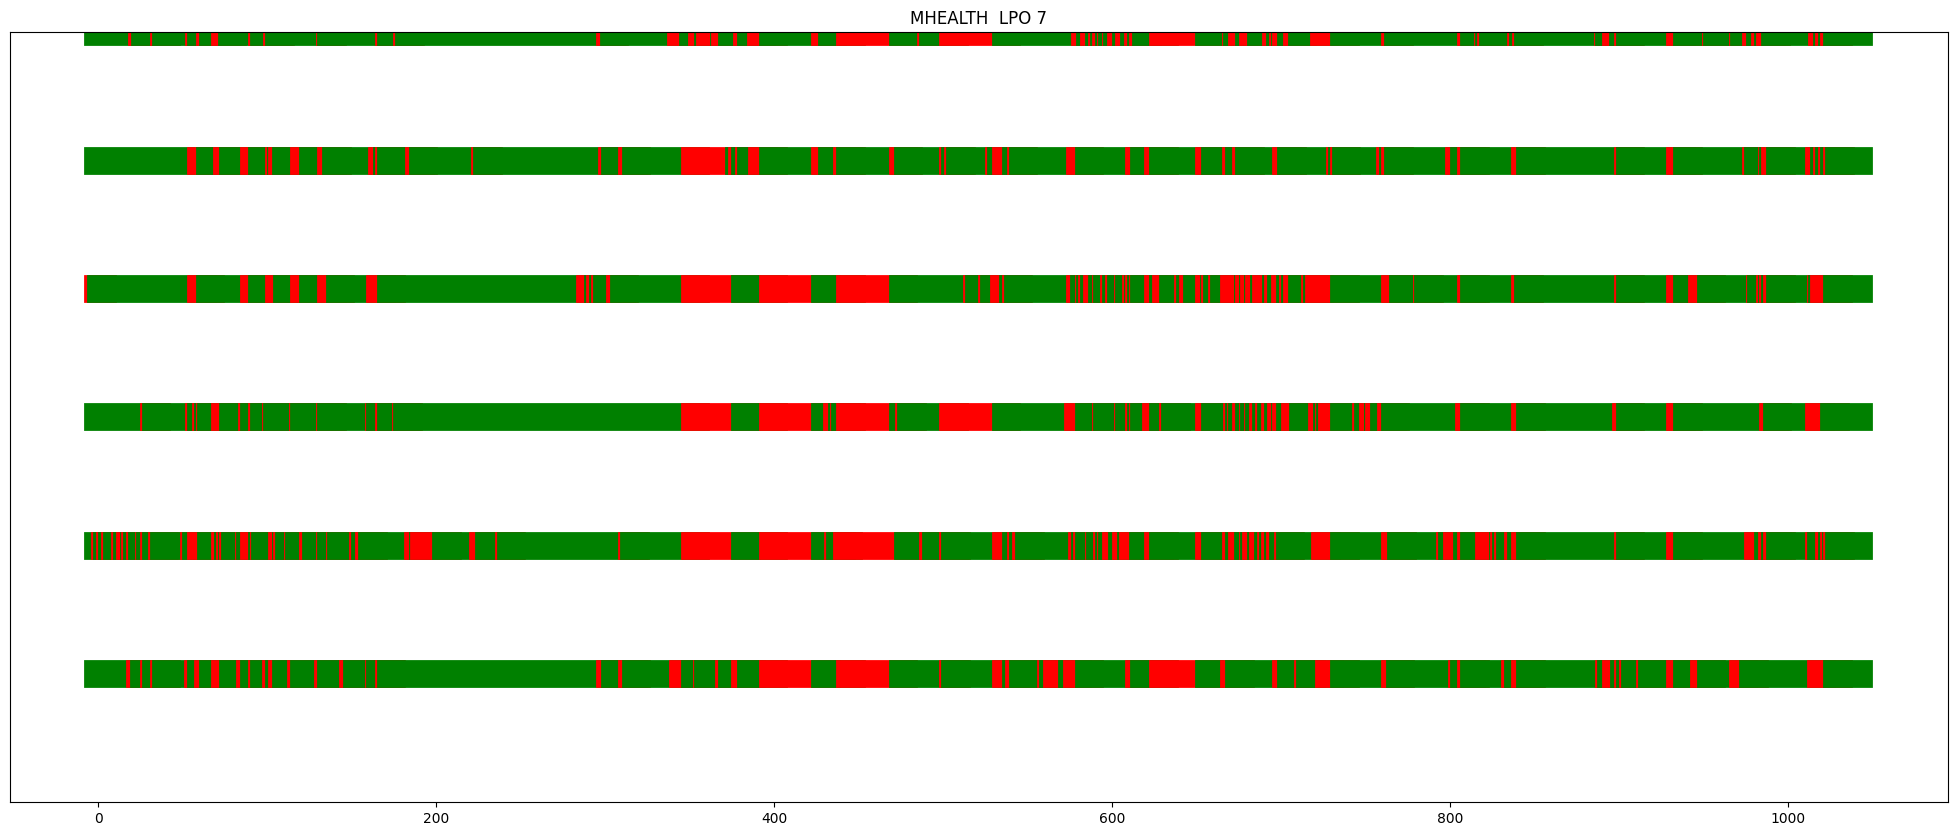

<Figure size 3000x1000 with 0 Axes>

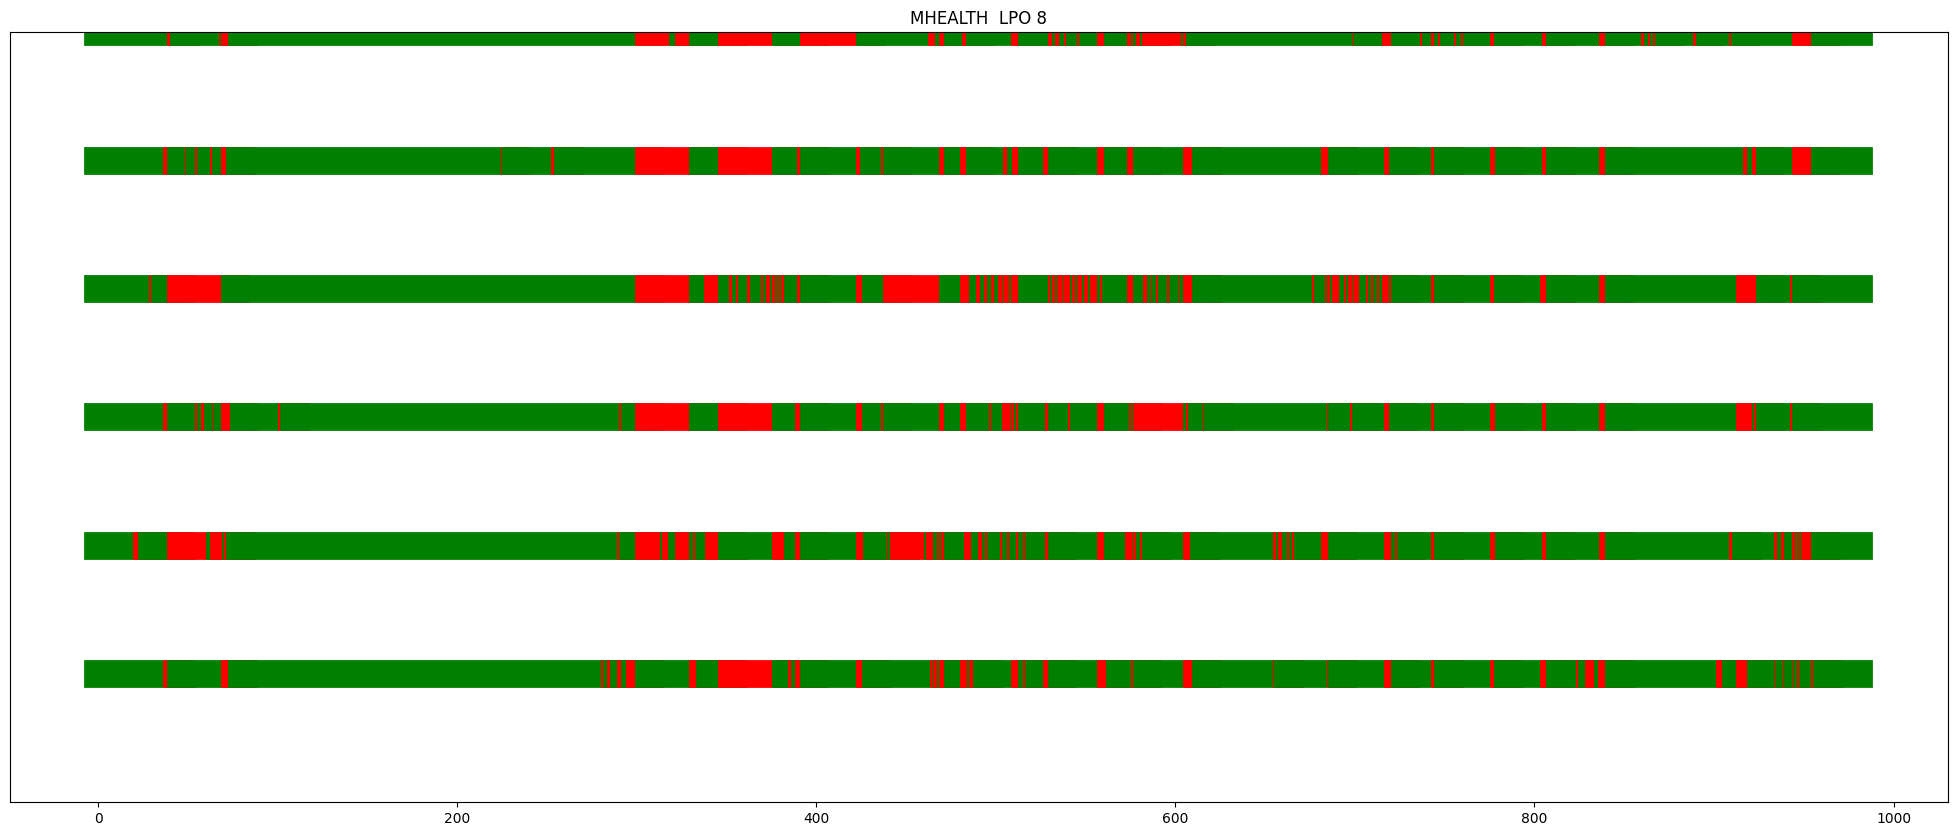

<Figure size 3000x1000 with 0 Axes>

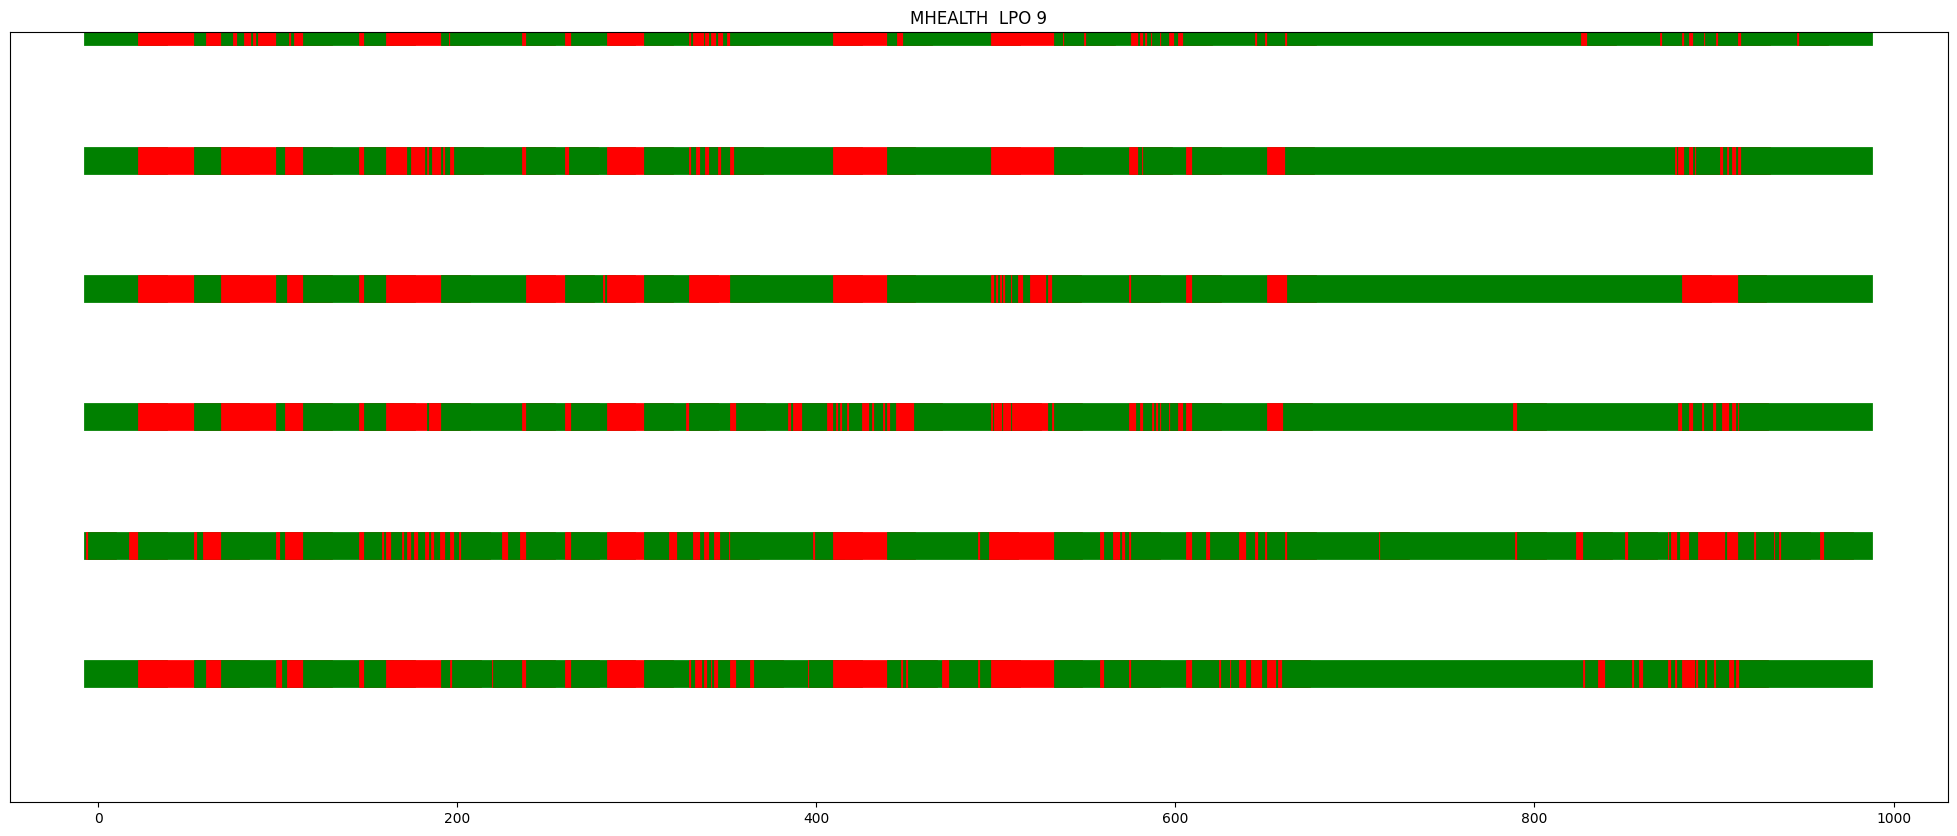

<Figure size 3000x1000 with 0 Axes>

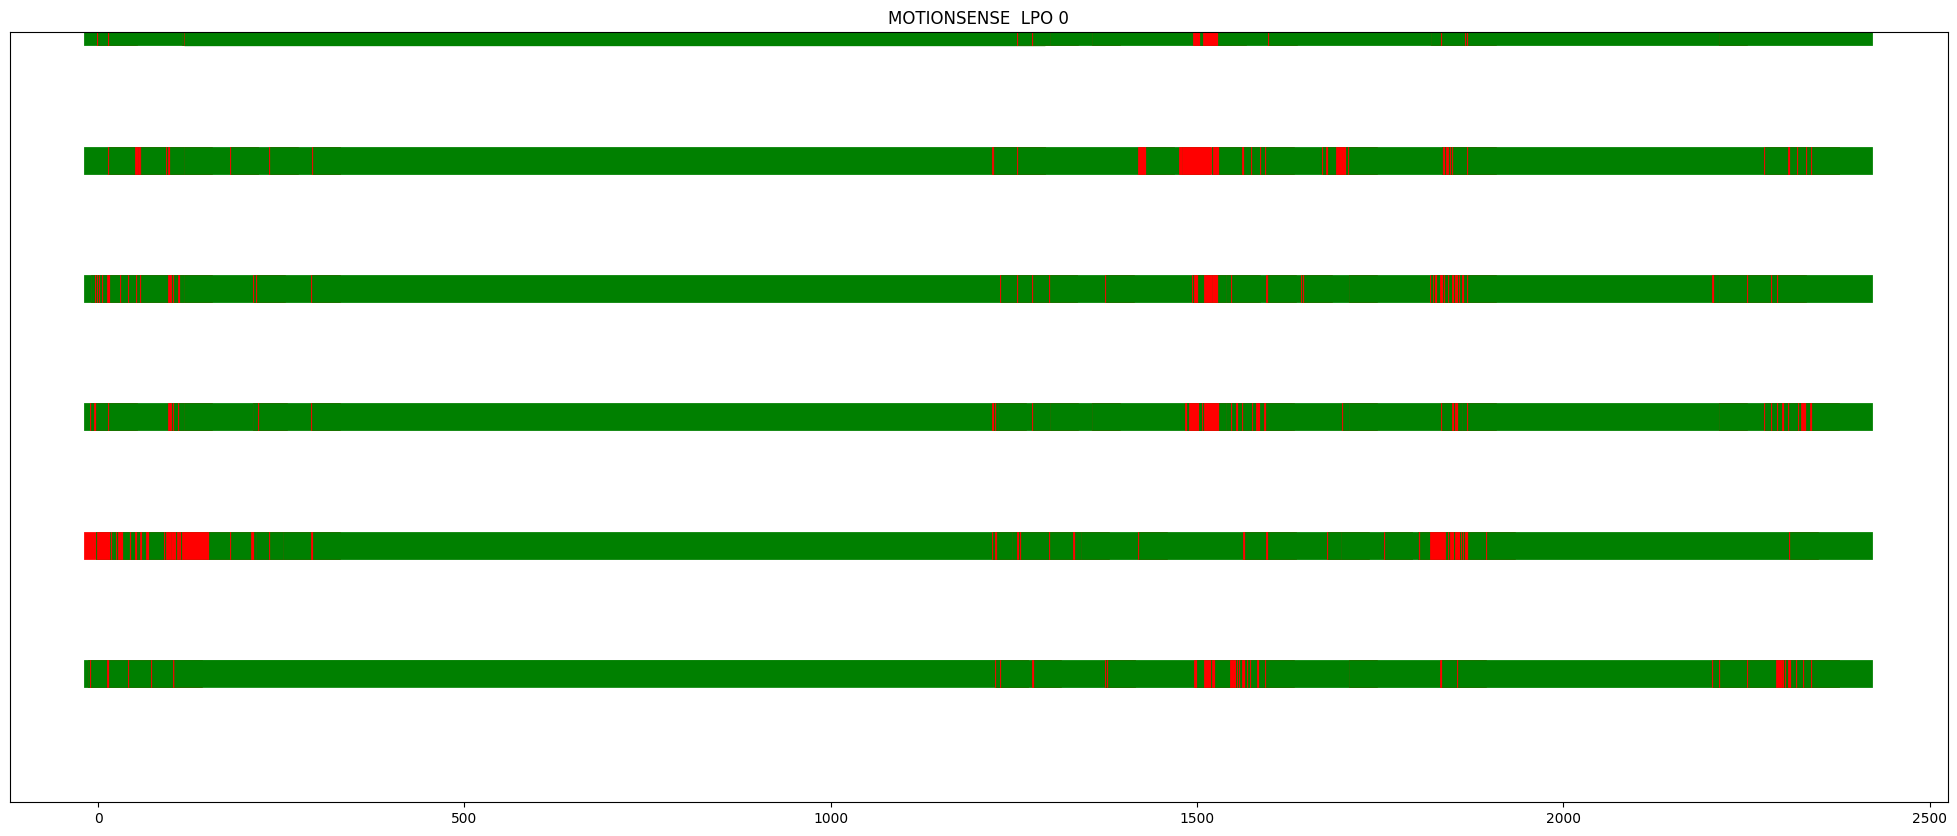

<Figure size 3000x1000 with 0 Axes>

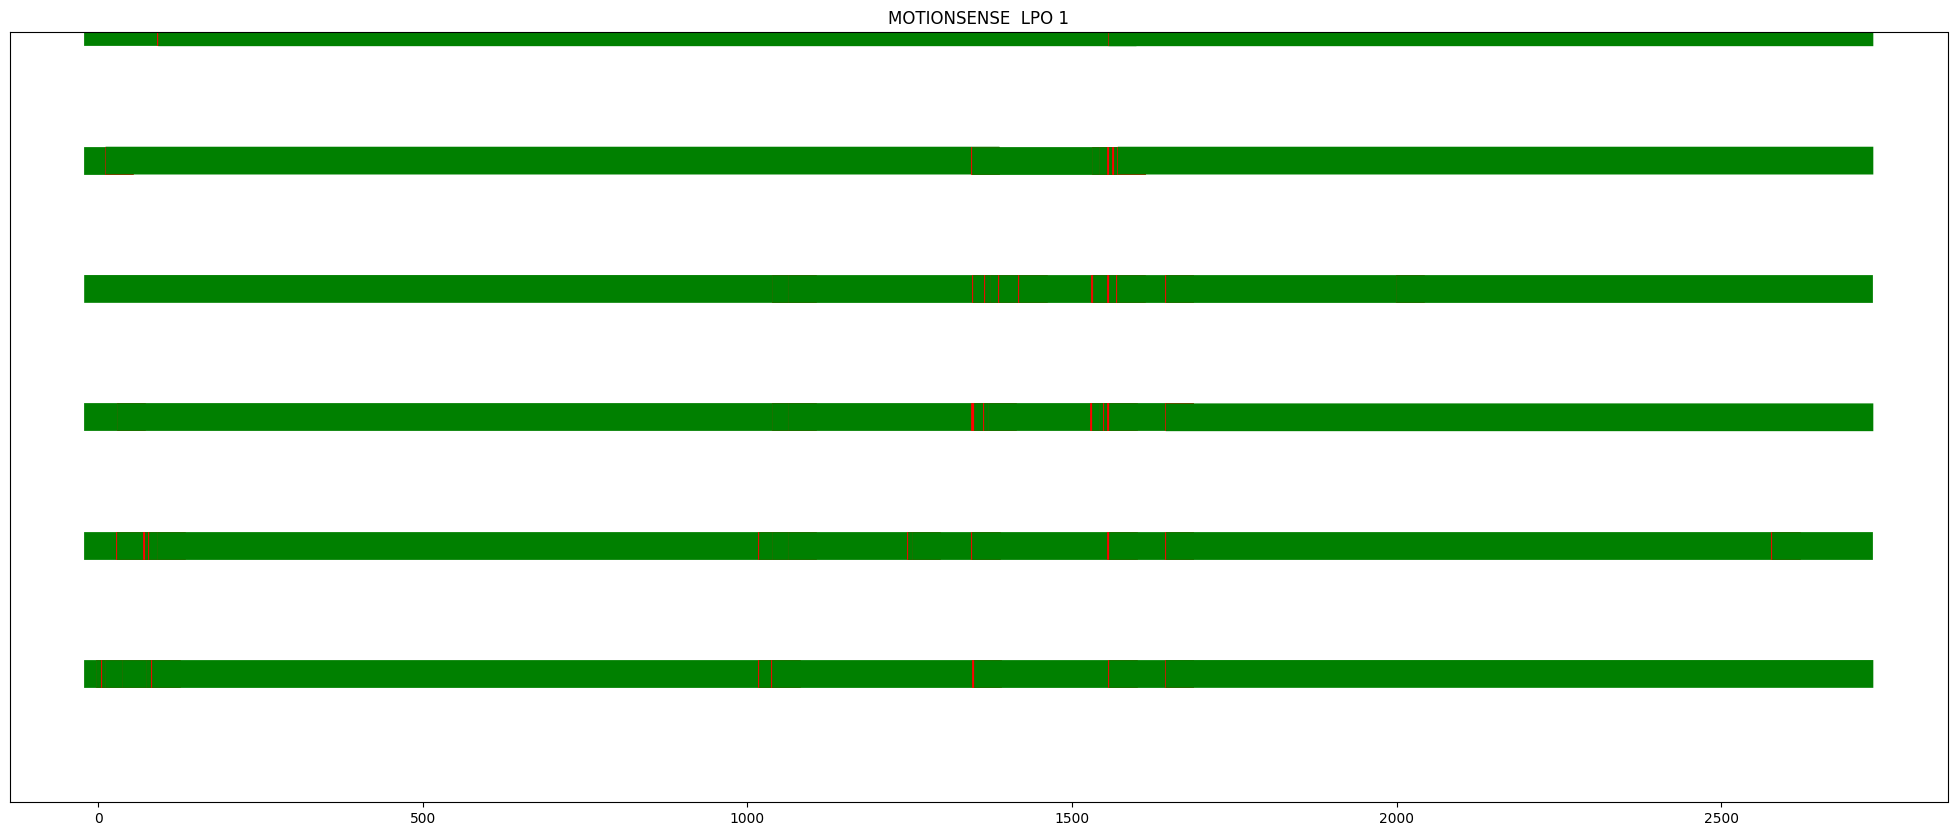

<Figure size 3000x1000 with 0 Axes>

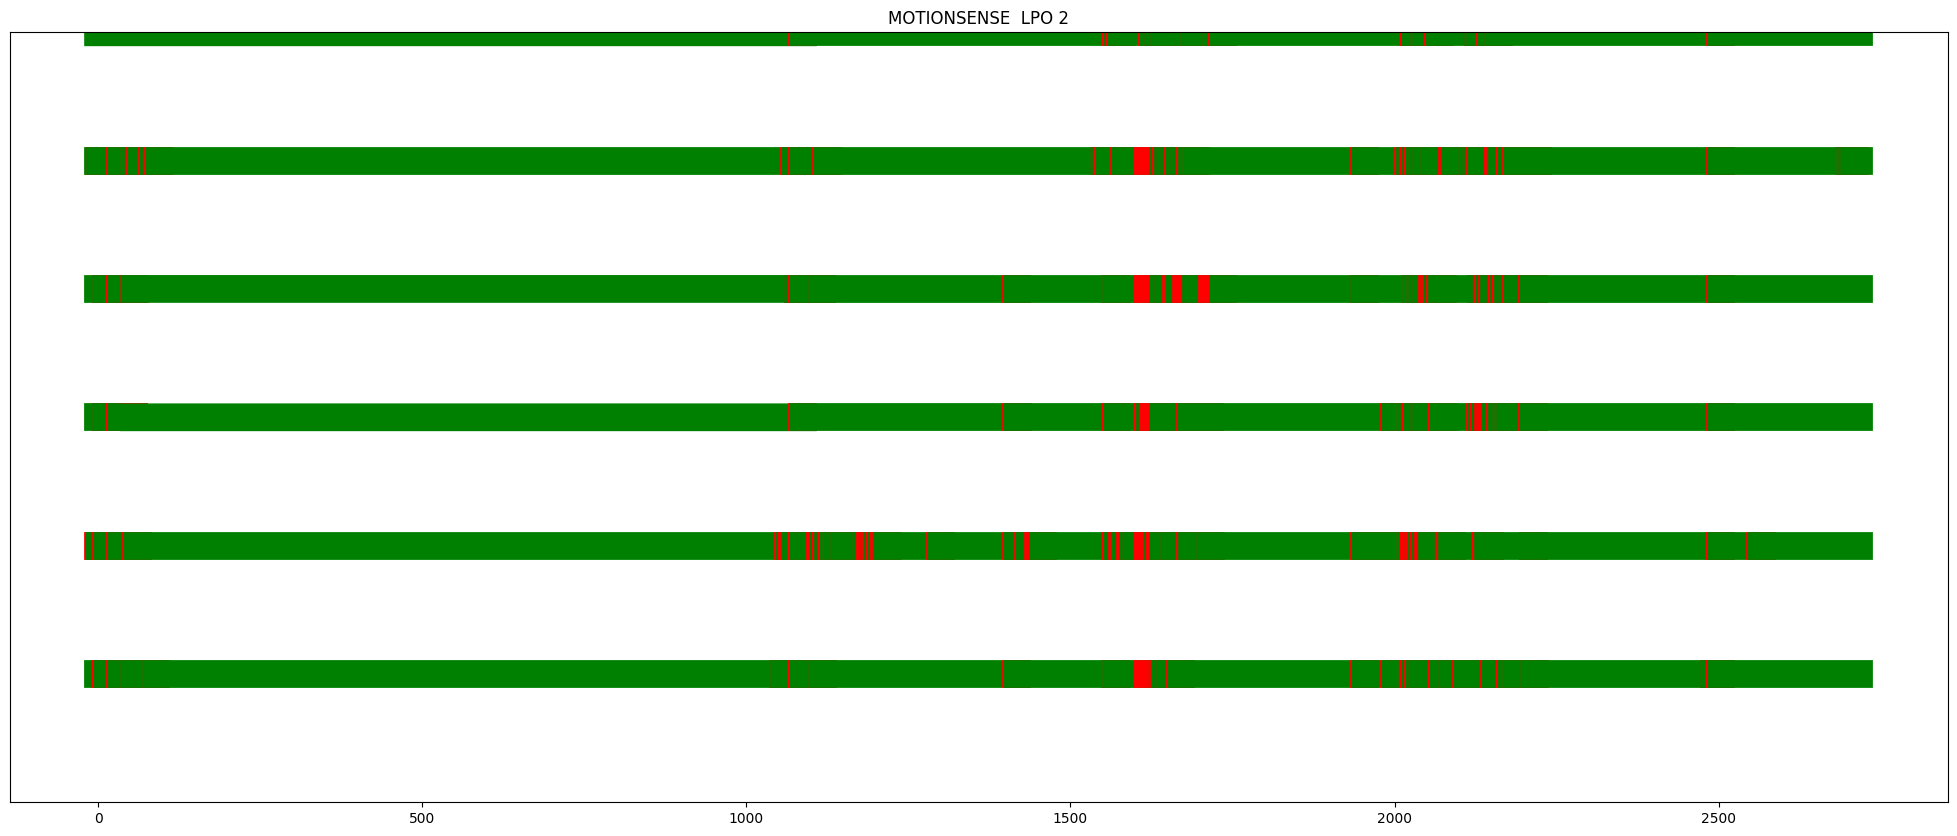

<Figure size 3000x1000 with 0 Axes>

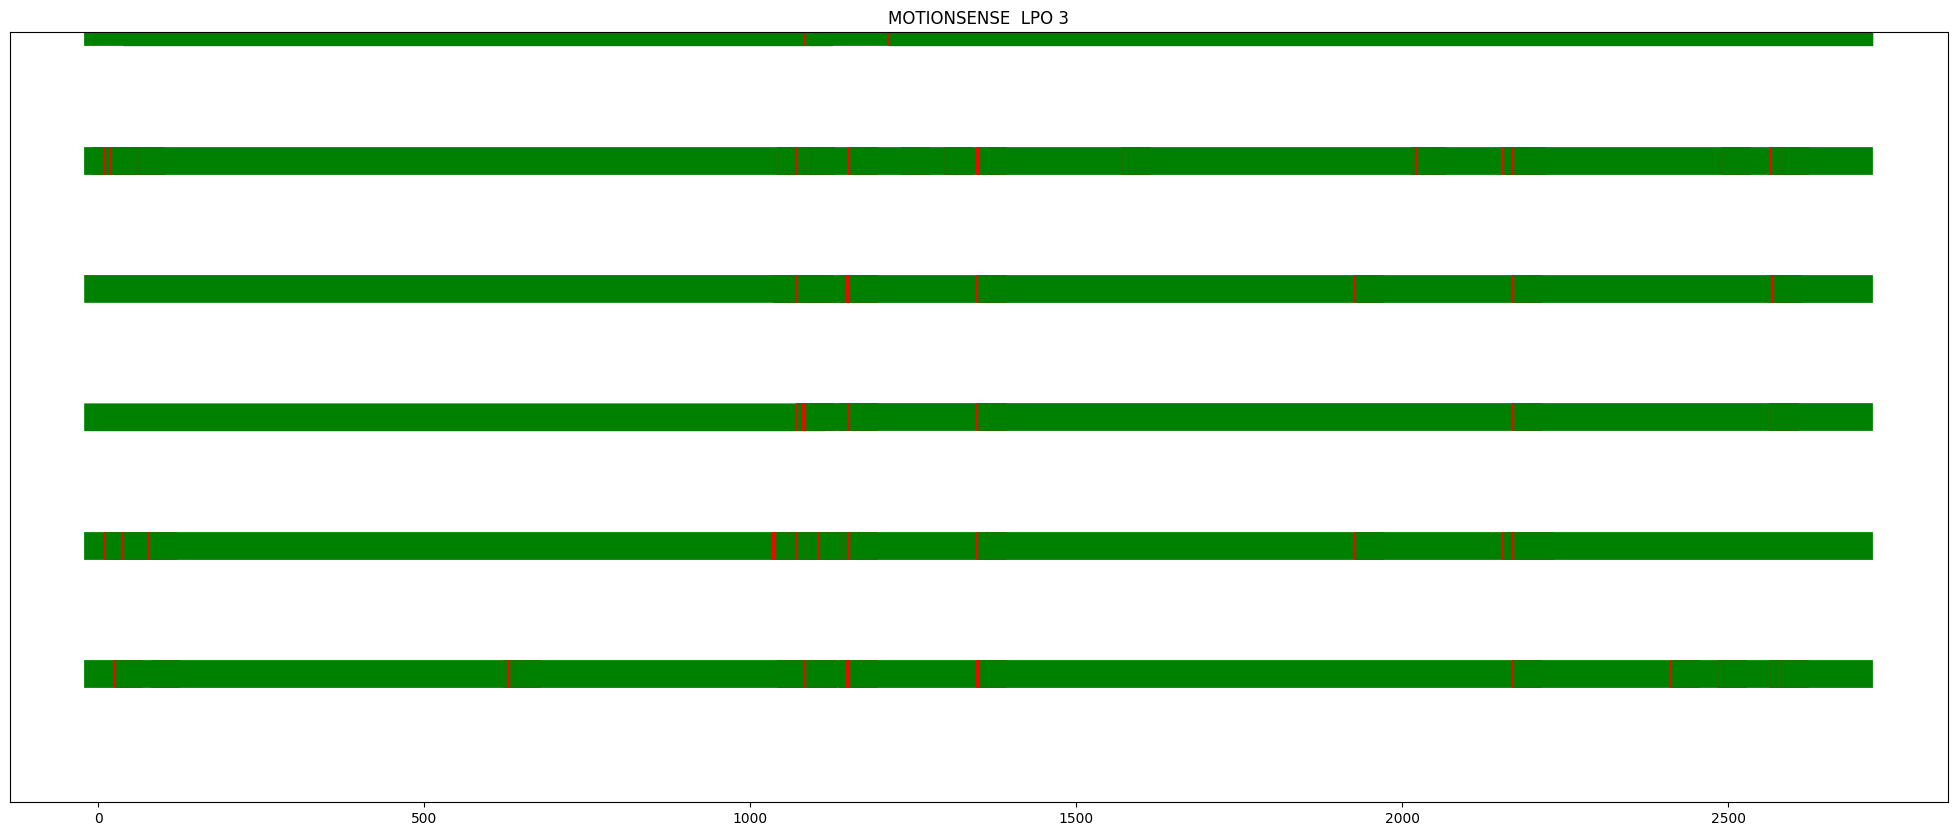

<Figure size 3000x1000 with 0 Axes>

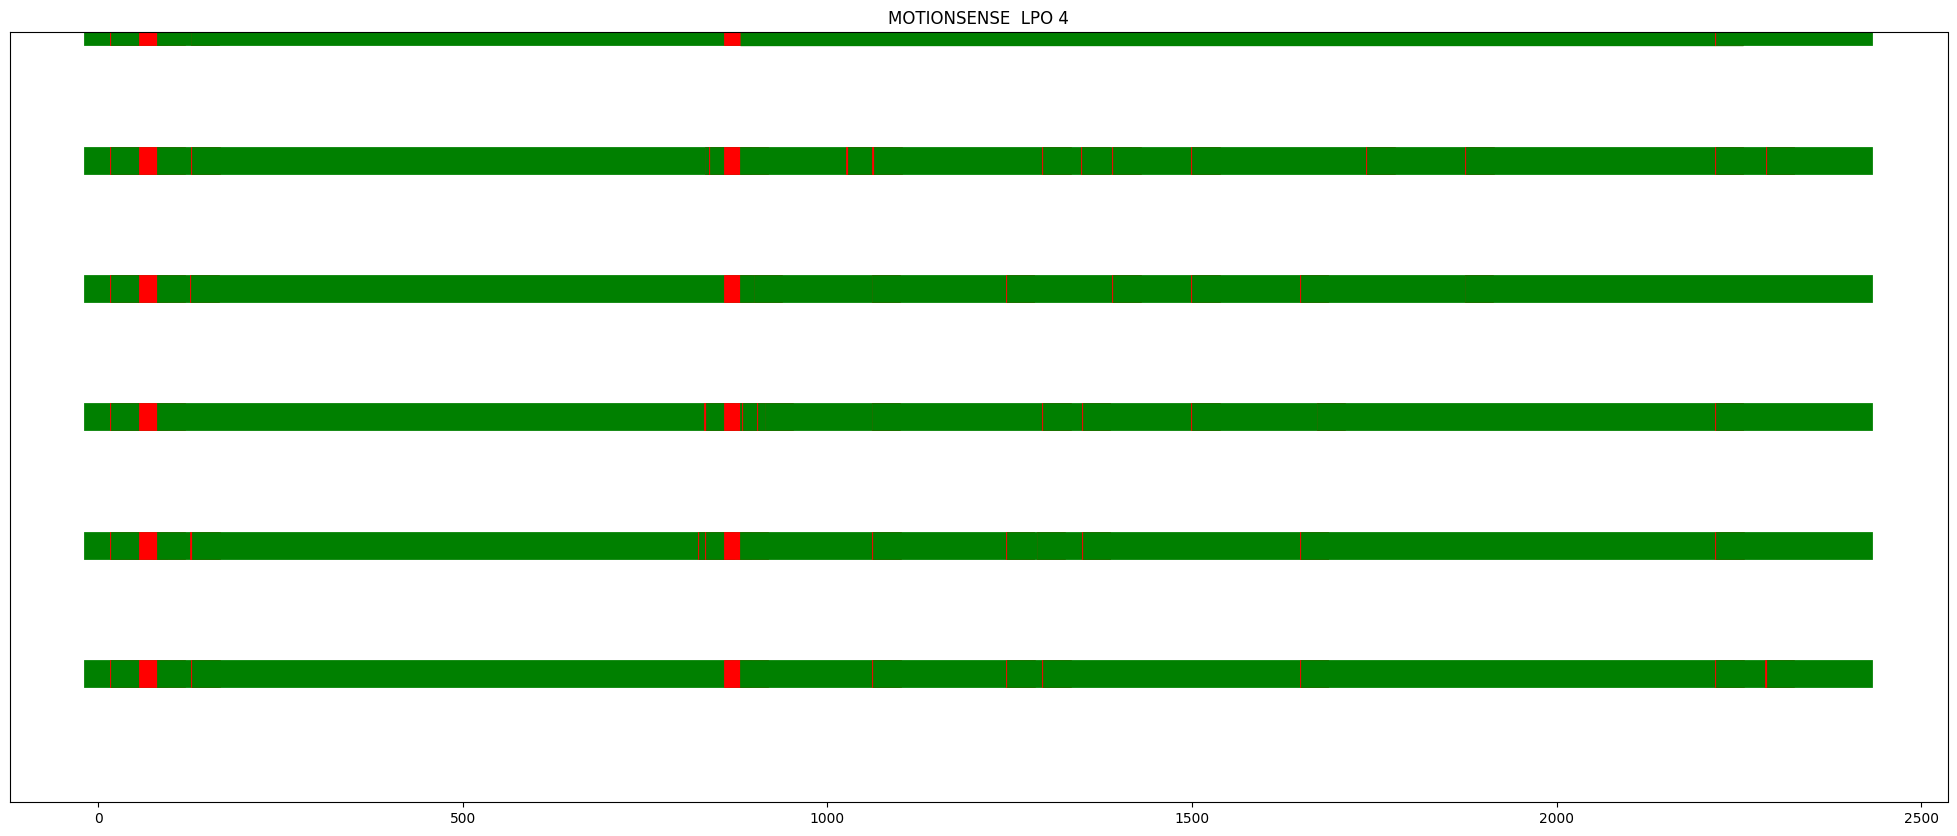

<Figure size 3000x1000 with 0 Axes>

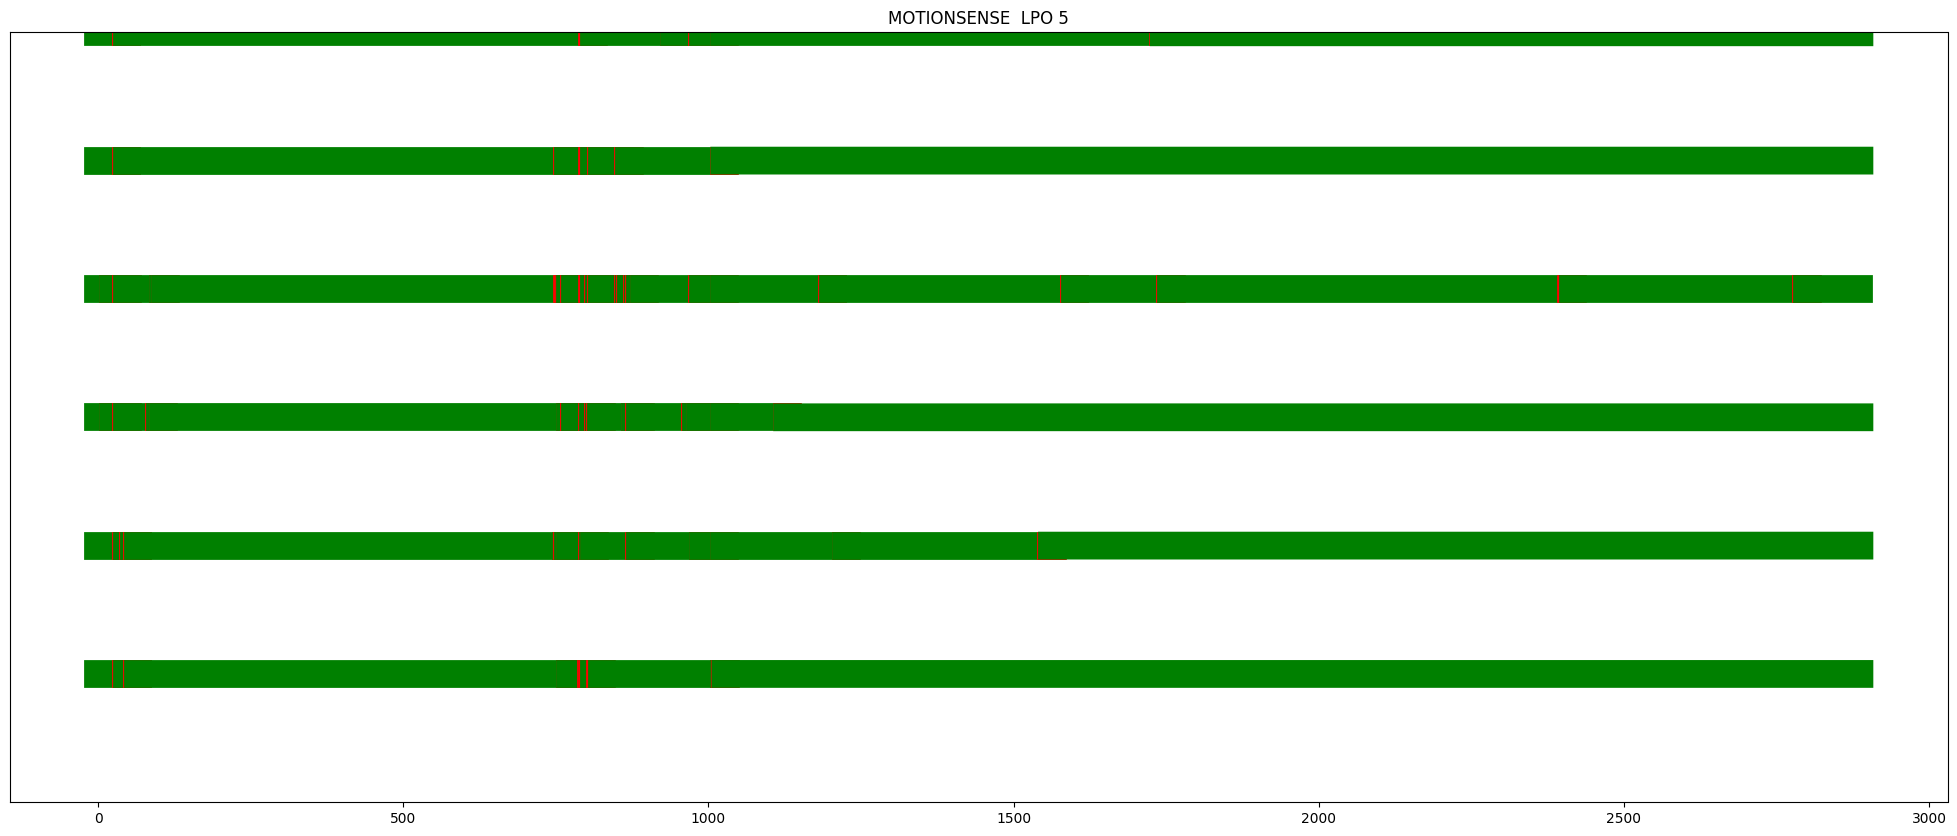

<Figure size 3000x1000 with 0 Axes>

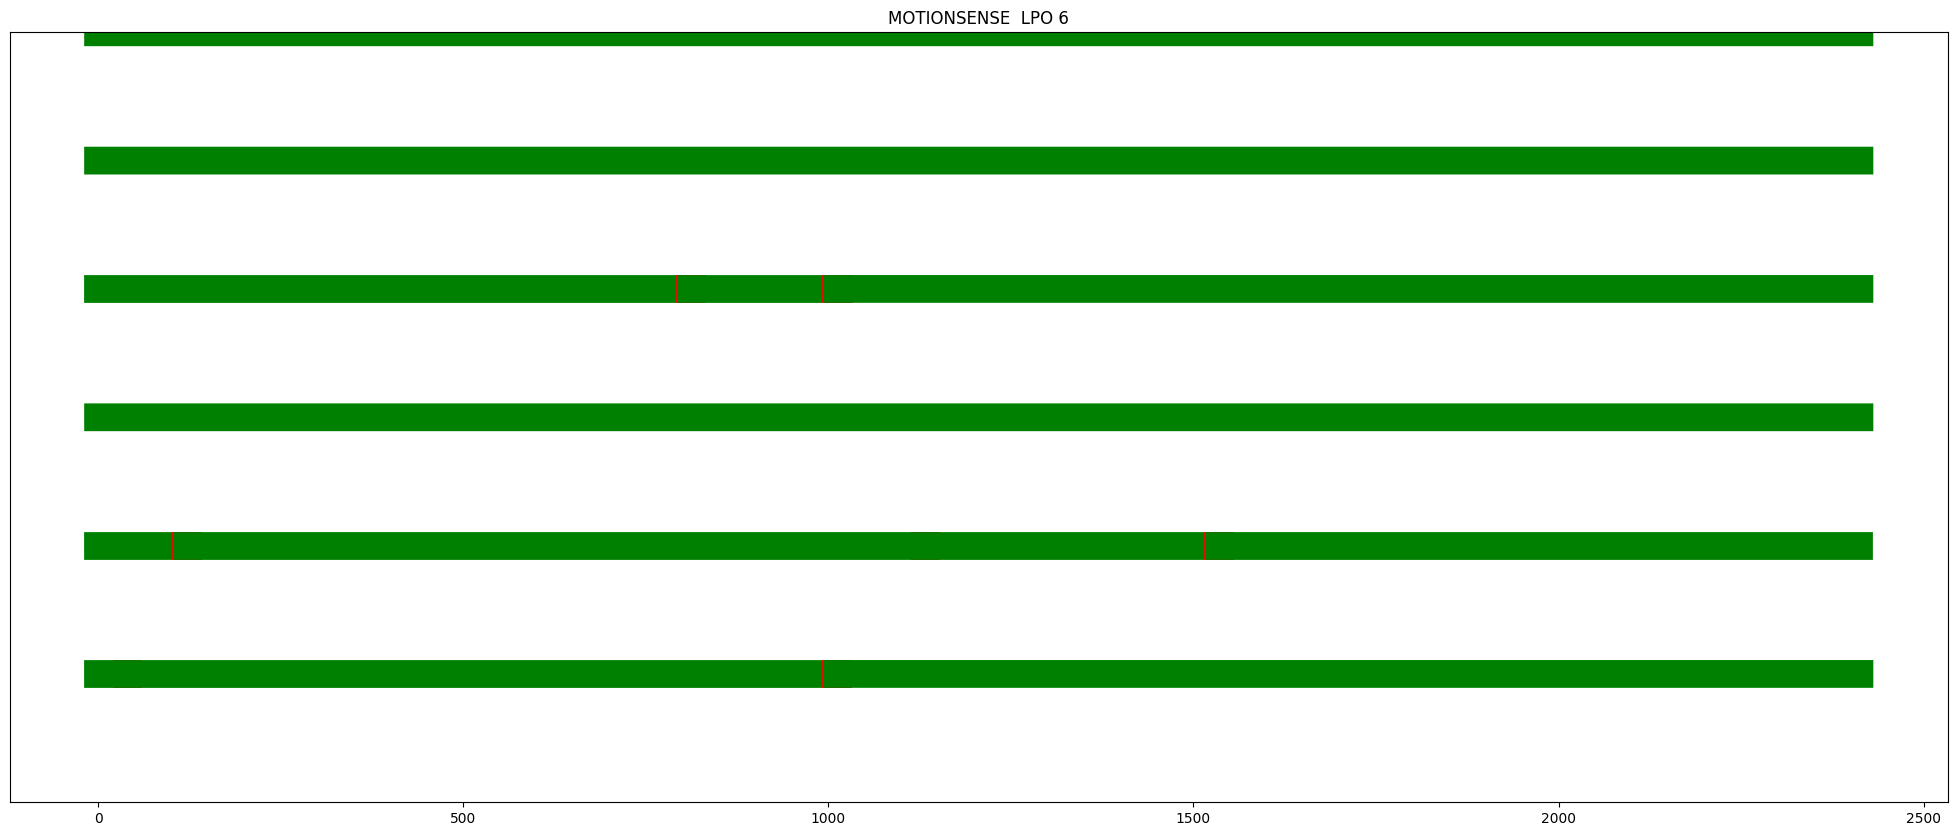

<Figure size 3000x1000 with 0 Axes>

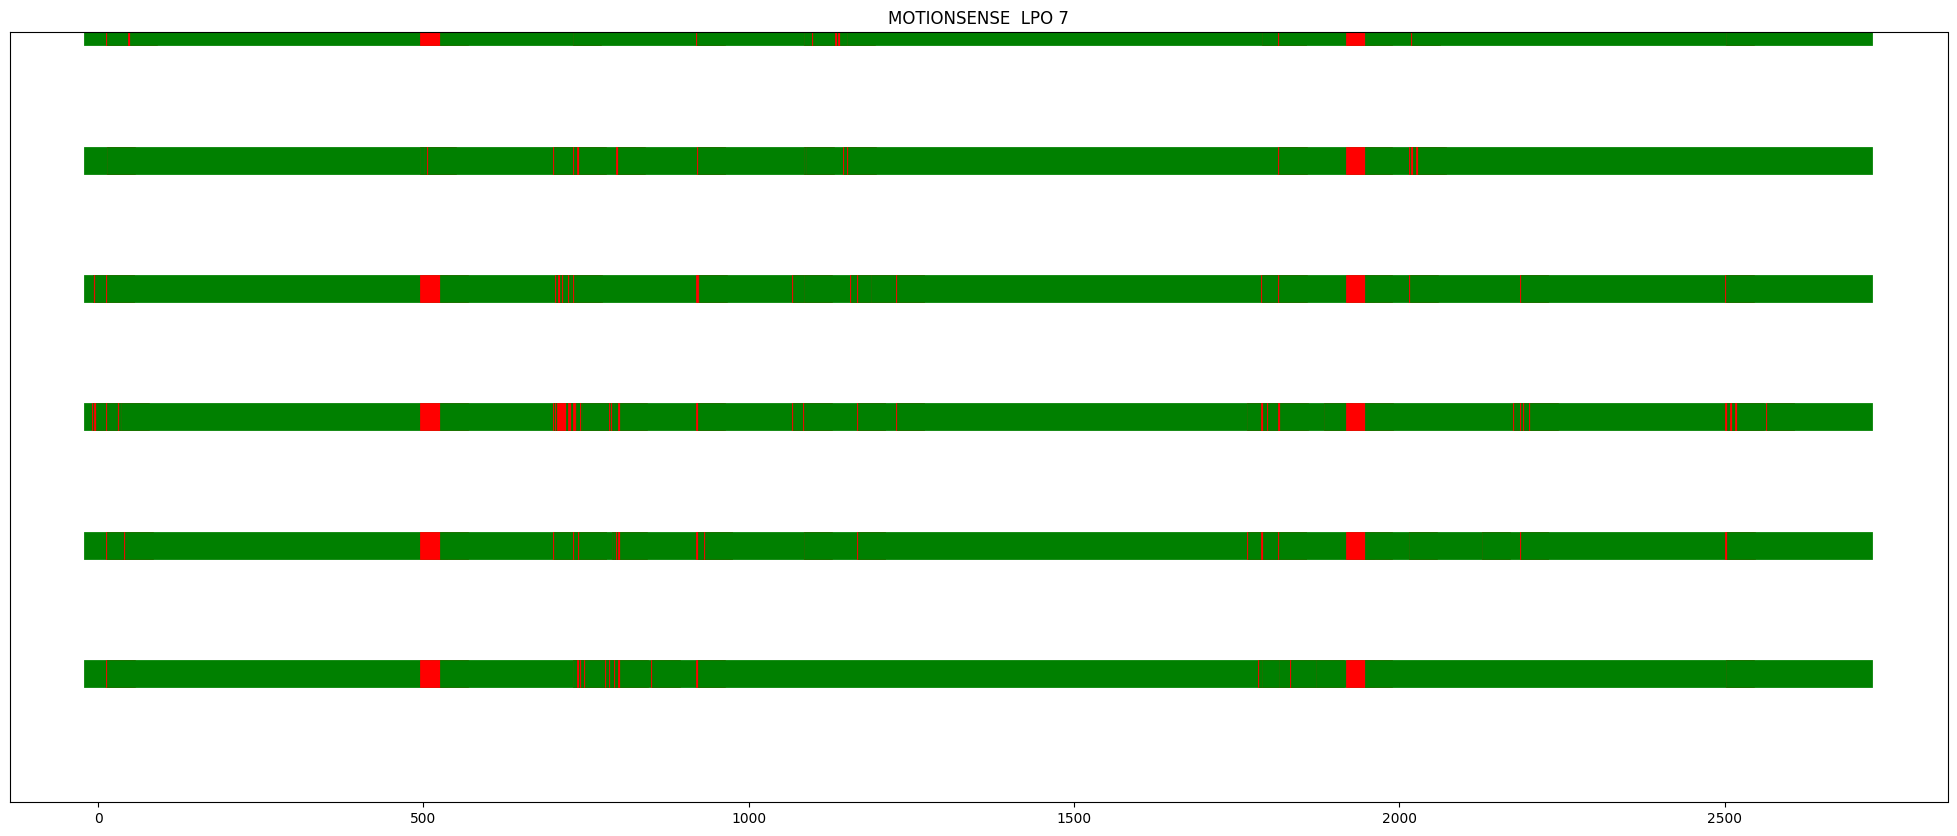

<Figure size 3000x1000 with 0 Axes>

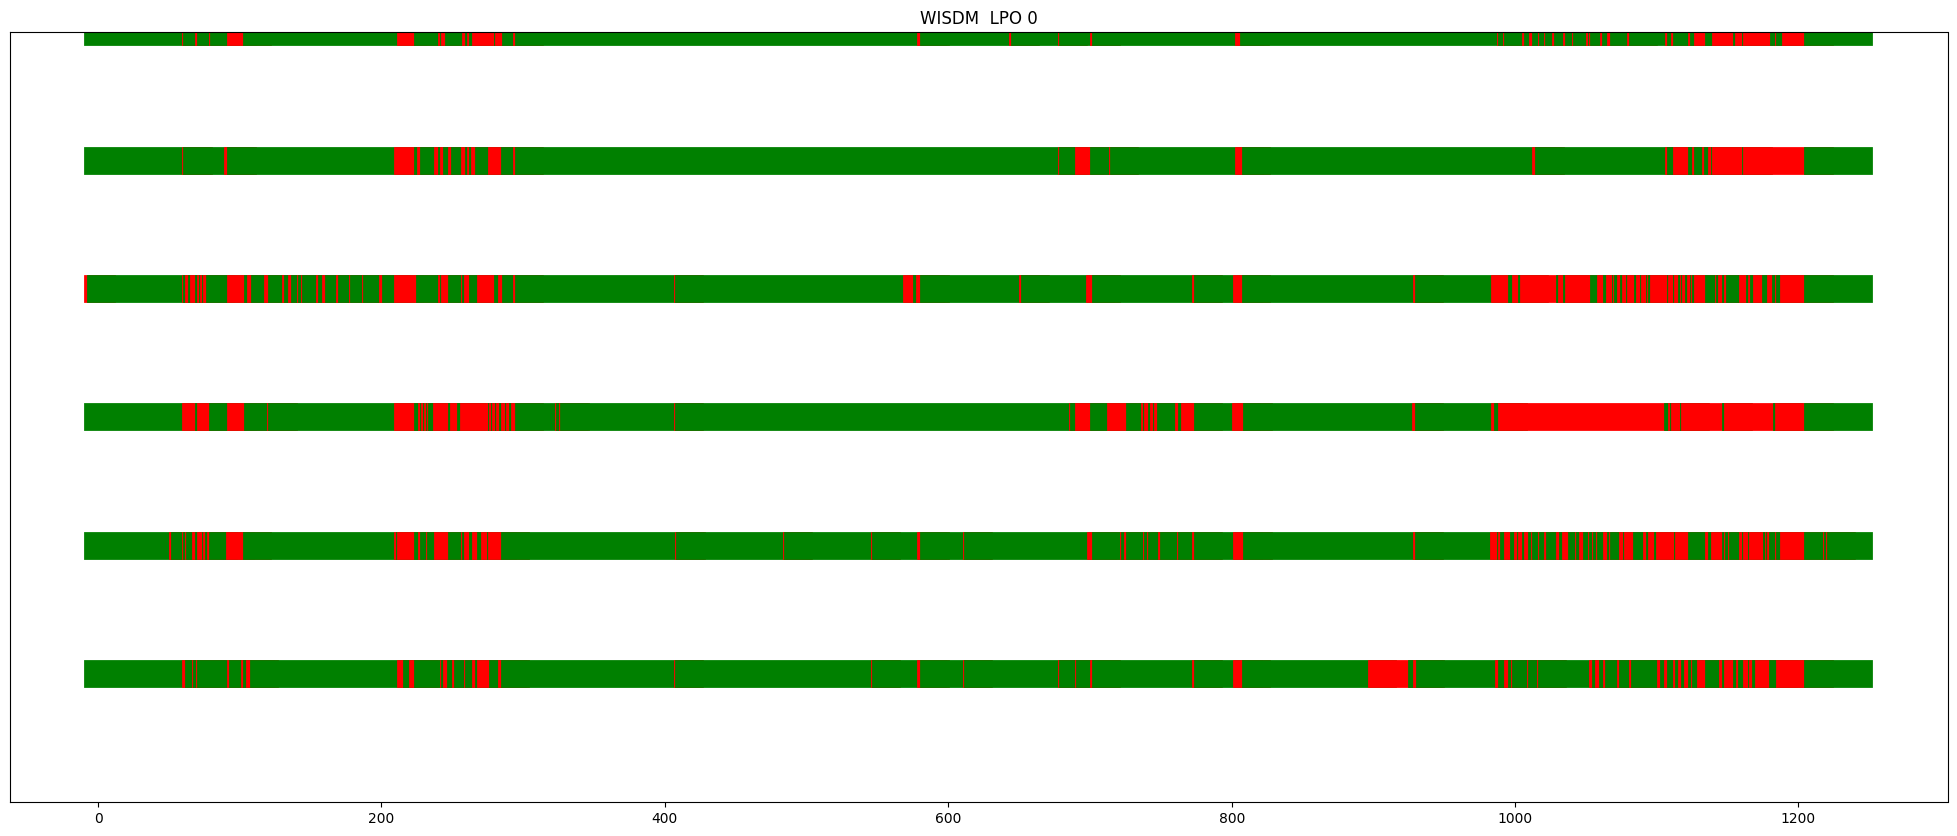

<Figure size 3000x1000 with 0 Axes>

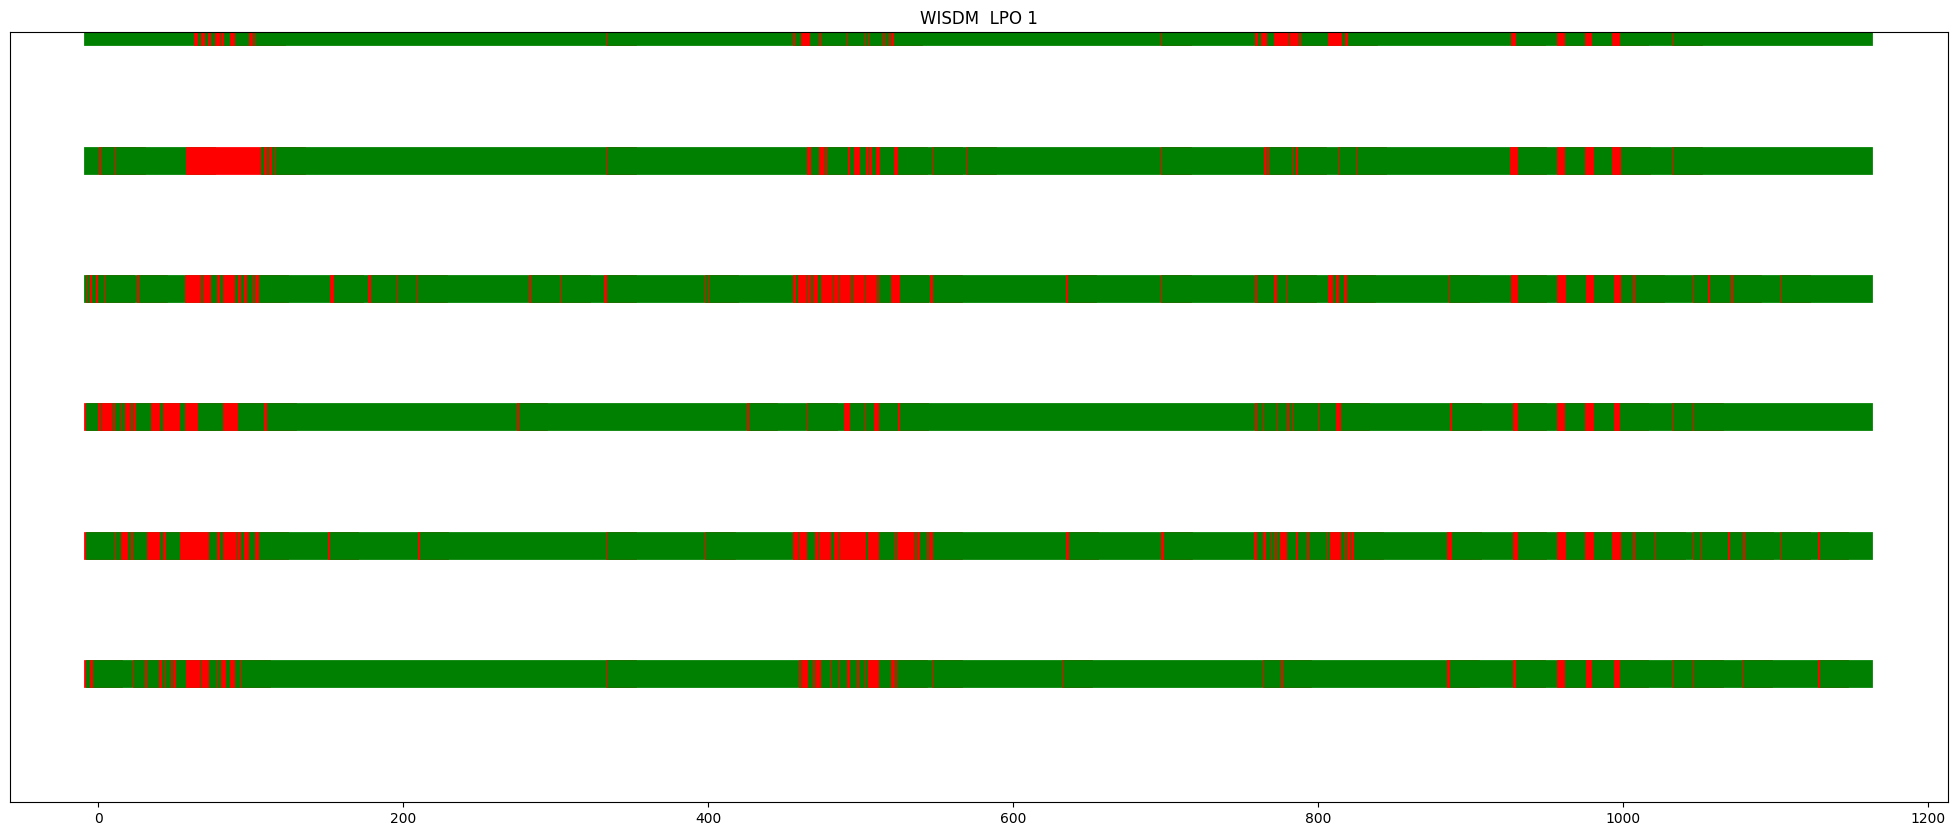

<Figure size 3000x1000 with 0 Axes>

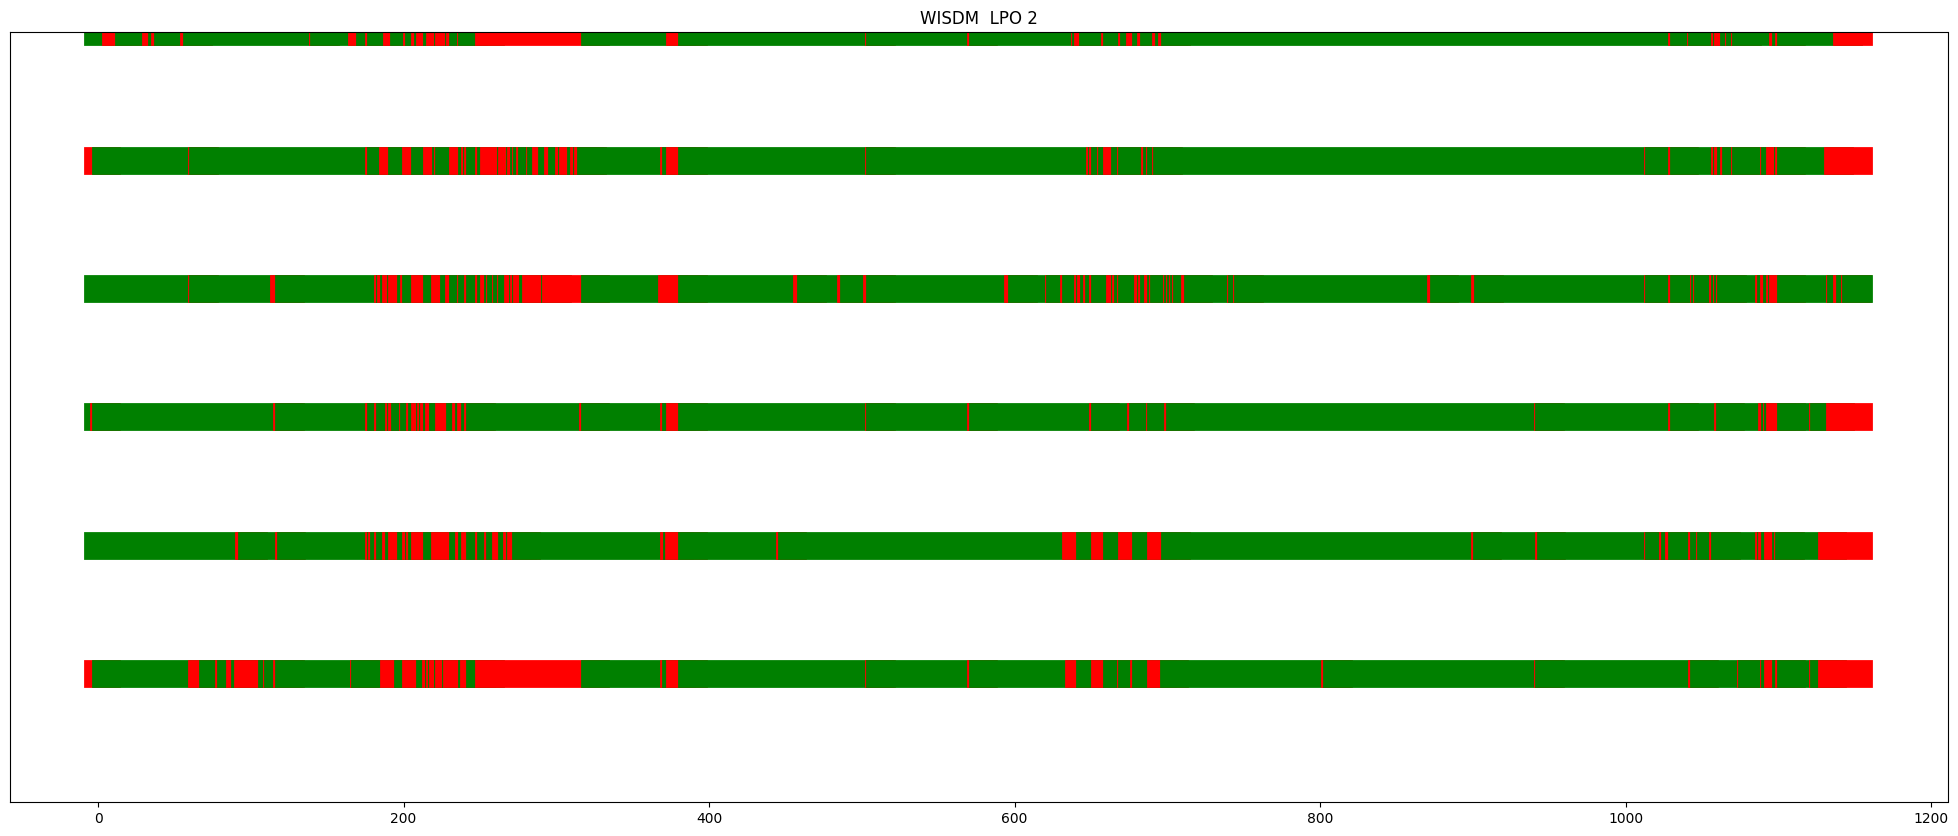

<Figure size 3000x1000 with 0 Axes>

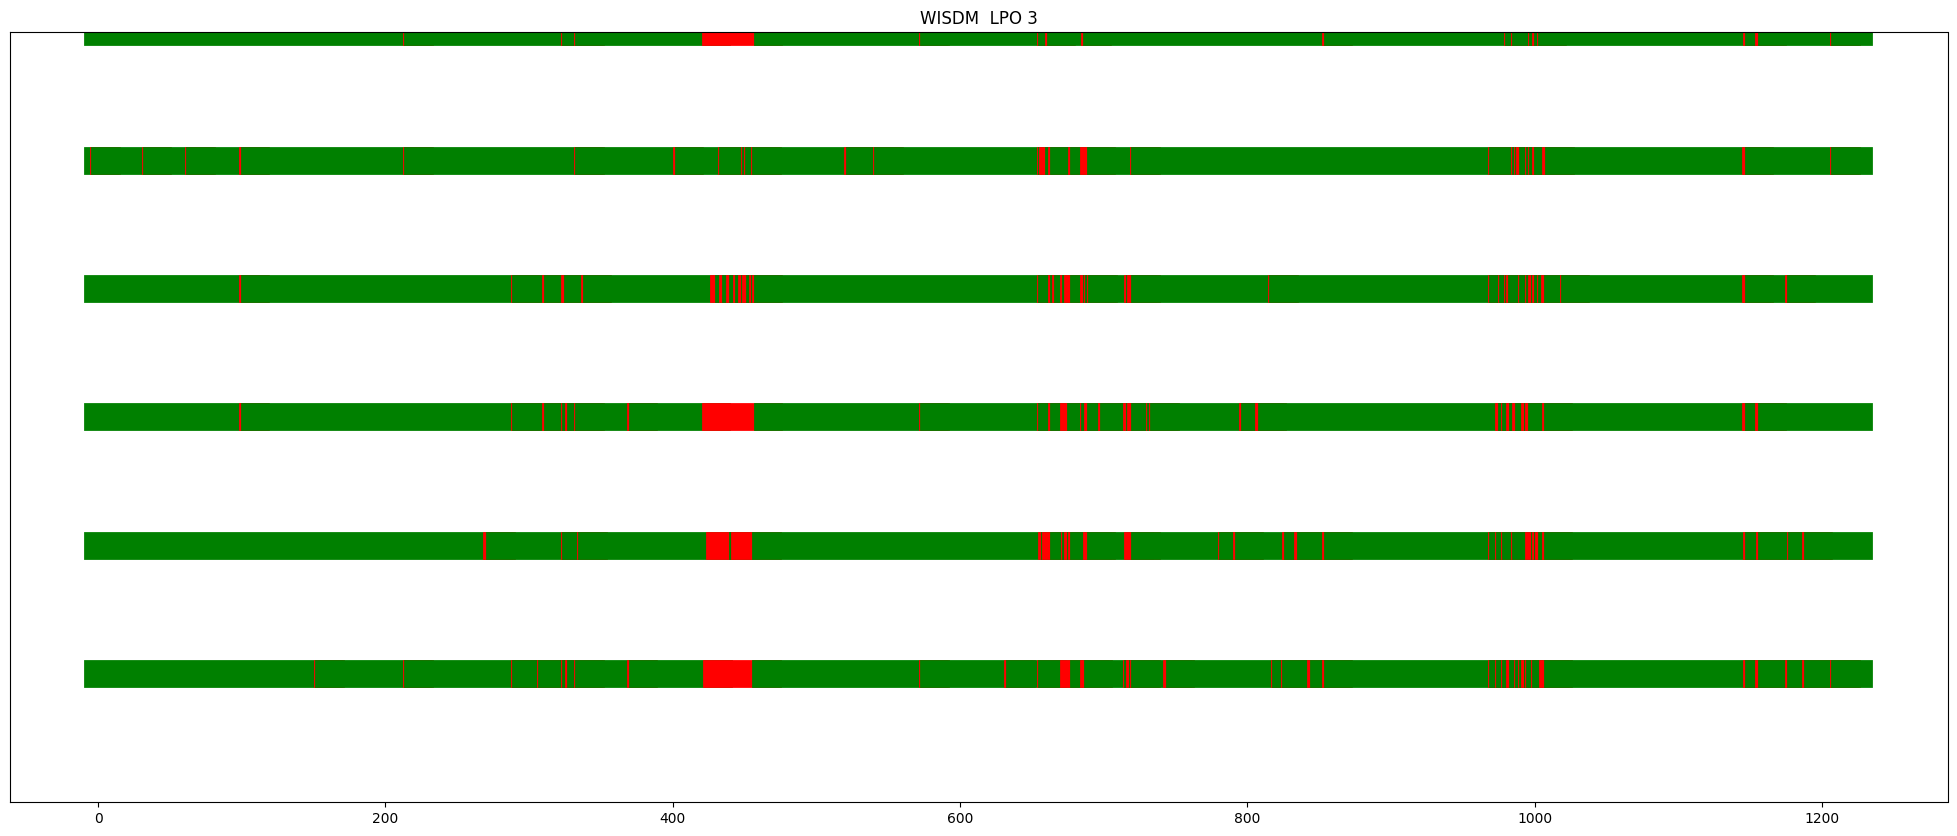

<Figure size 3000x1000 with 0 Axes>

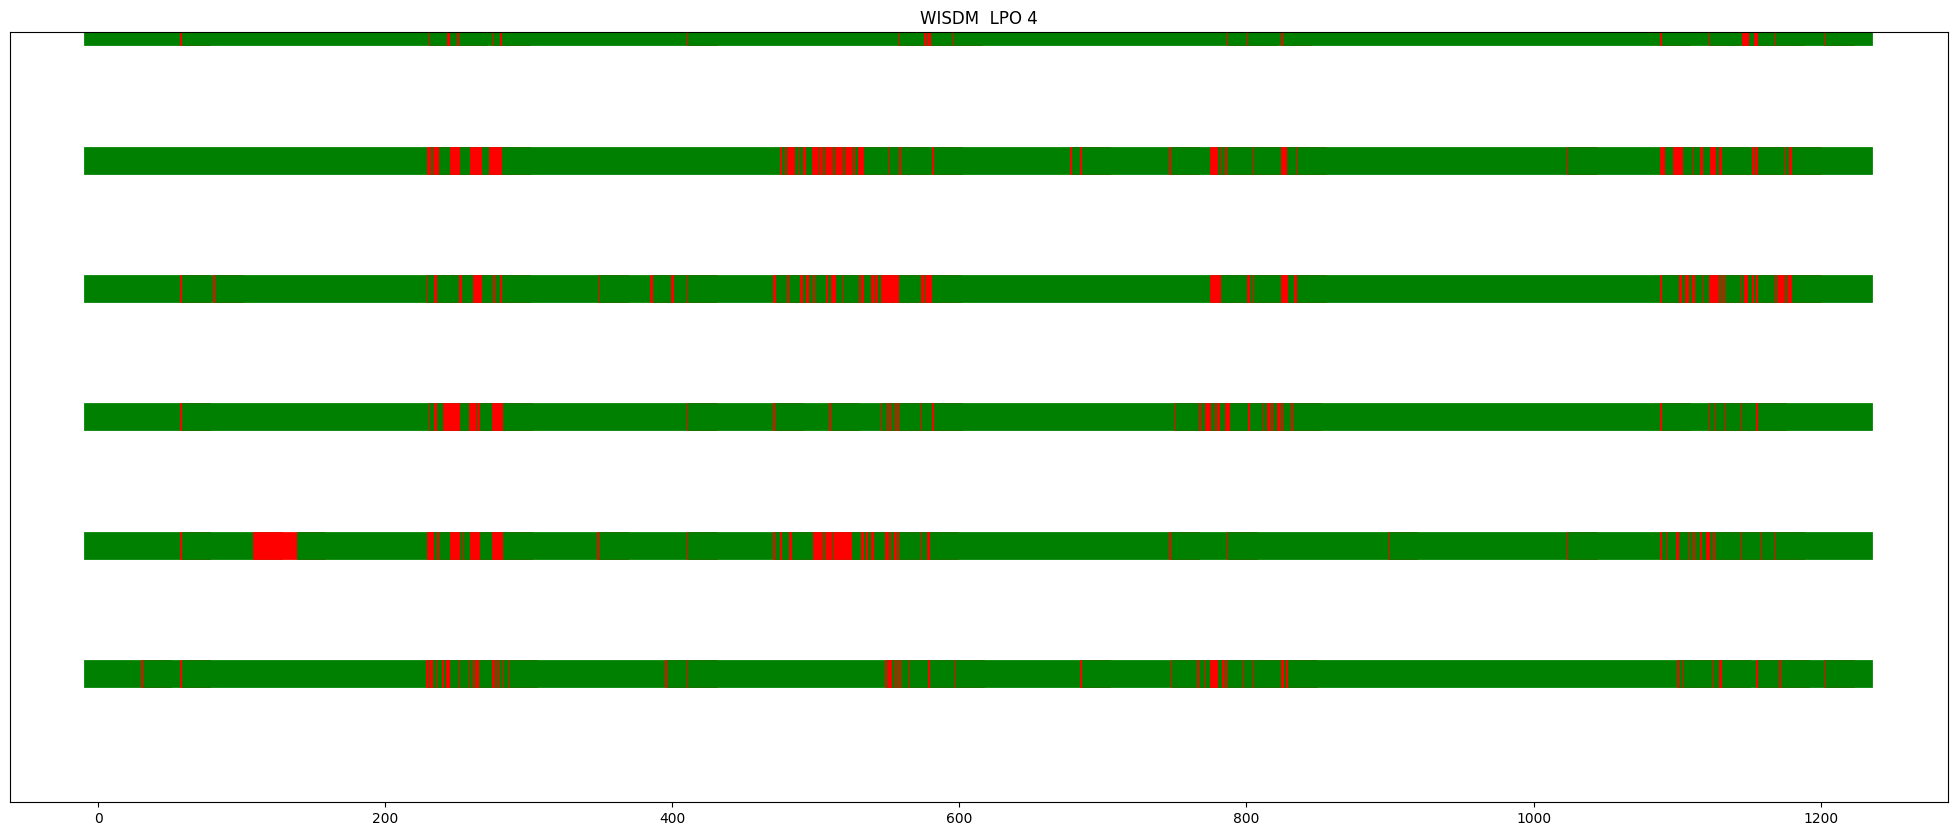

<Figure size 3000x1000 with 0 Axes>

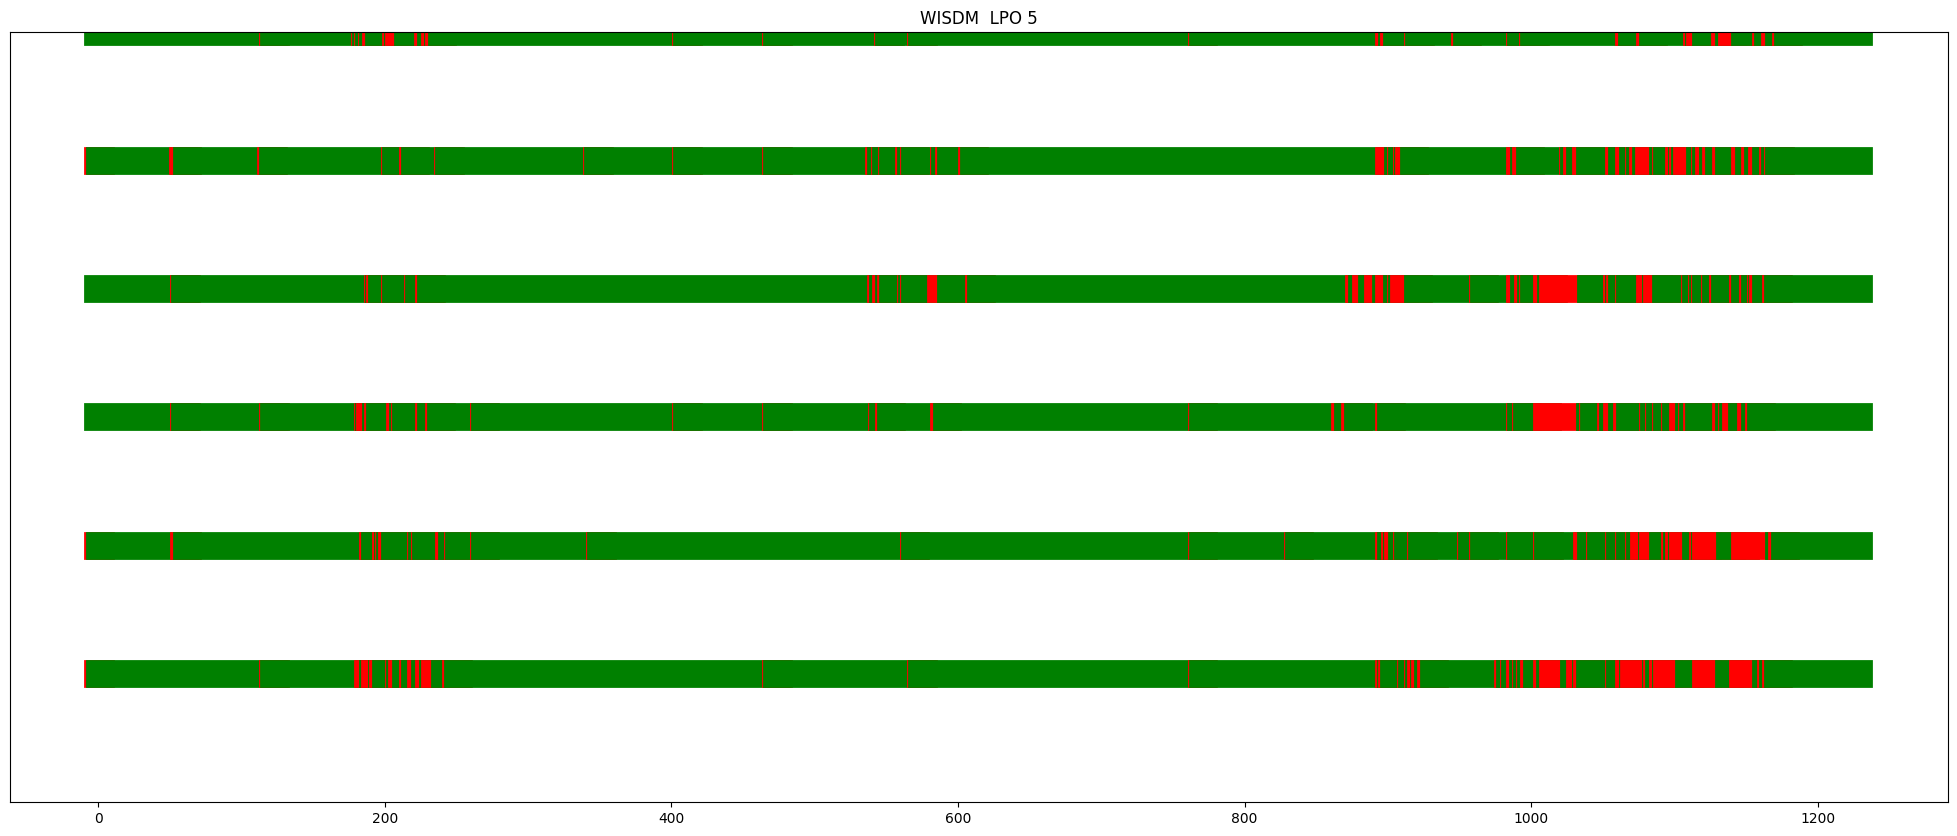

<Figure size 3000x1000 with 0 Axes>

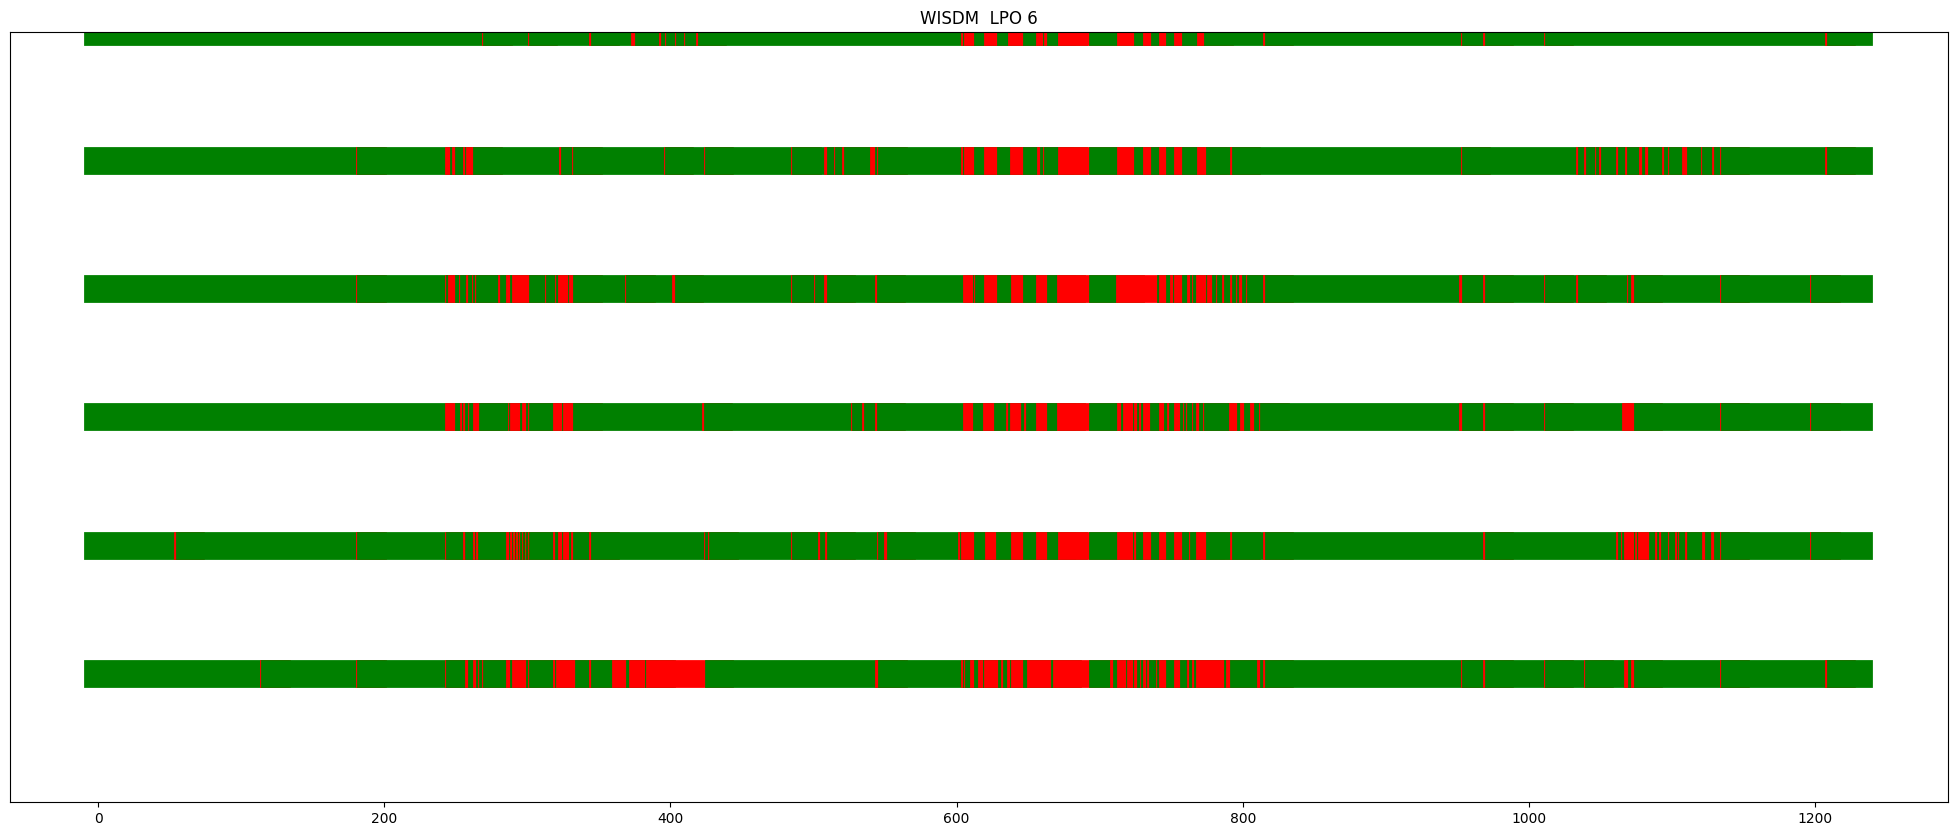

<Figure size 3000x1000 with 0 Axes>

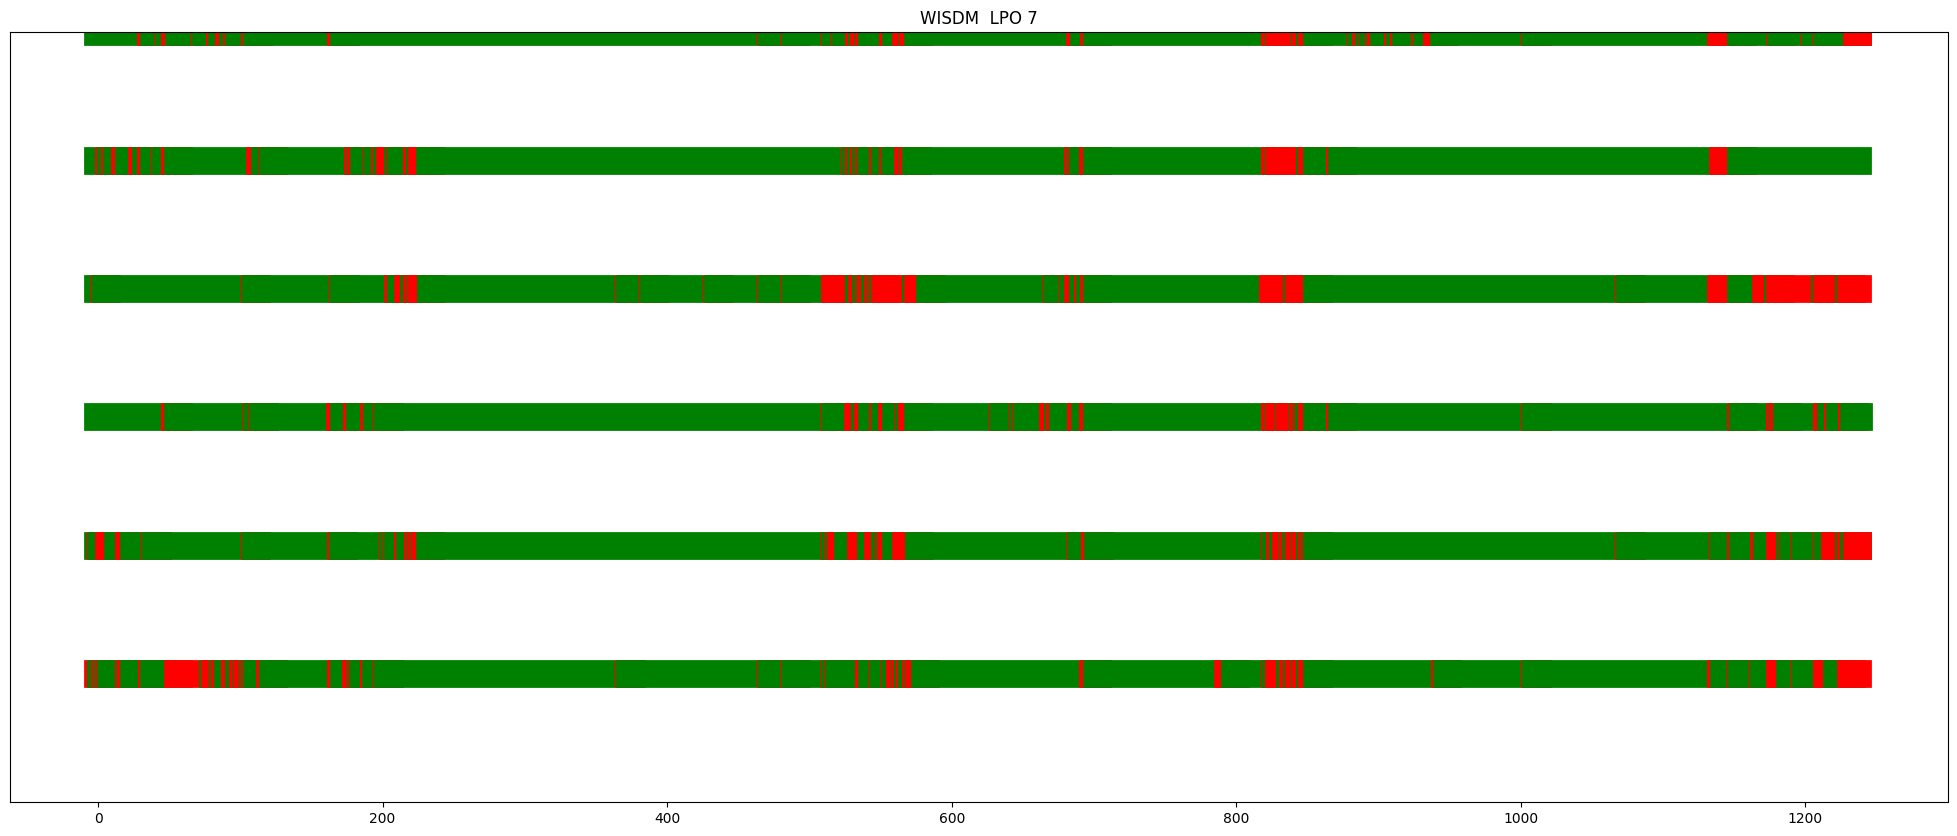

<Figure size 3000x1000 with 0 Axes>

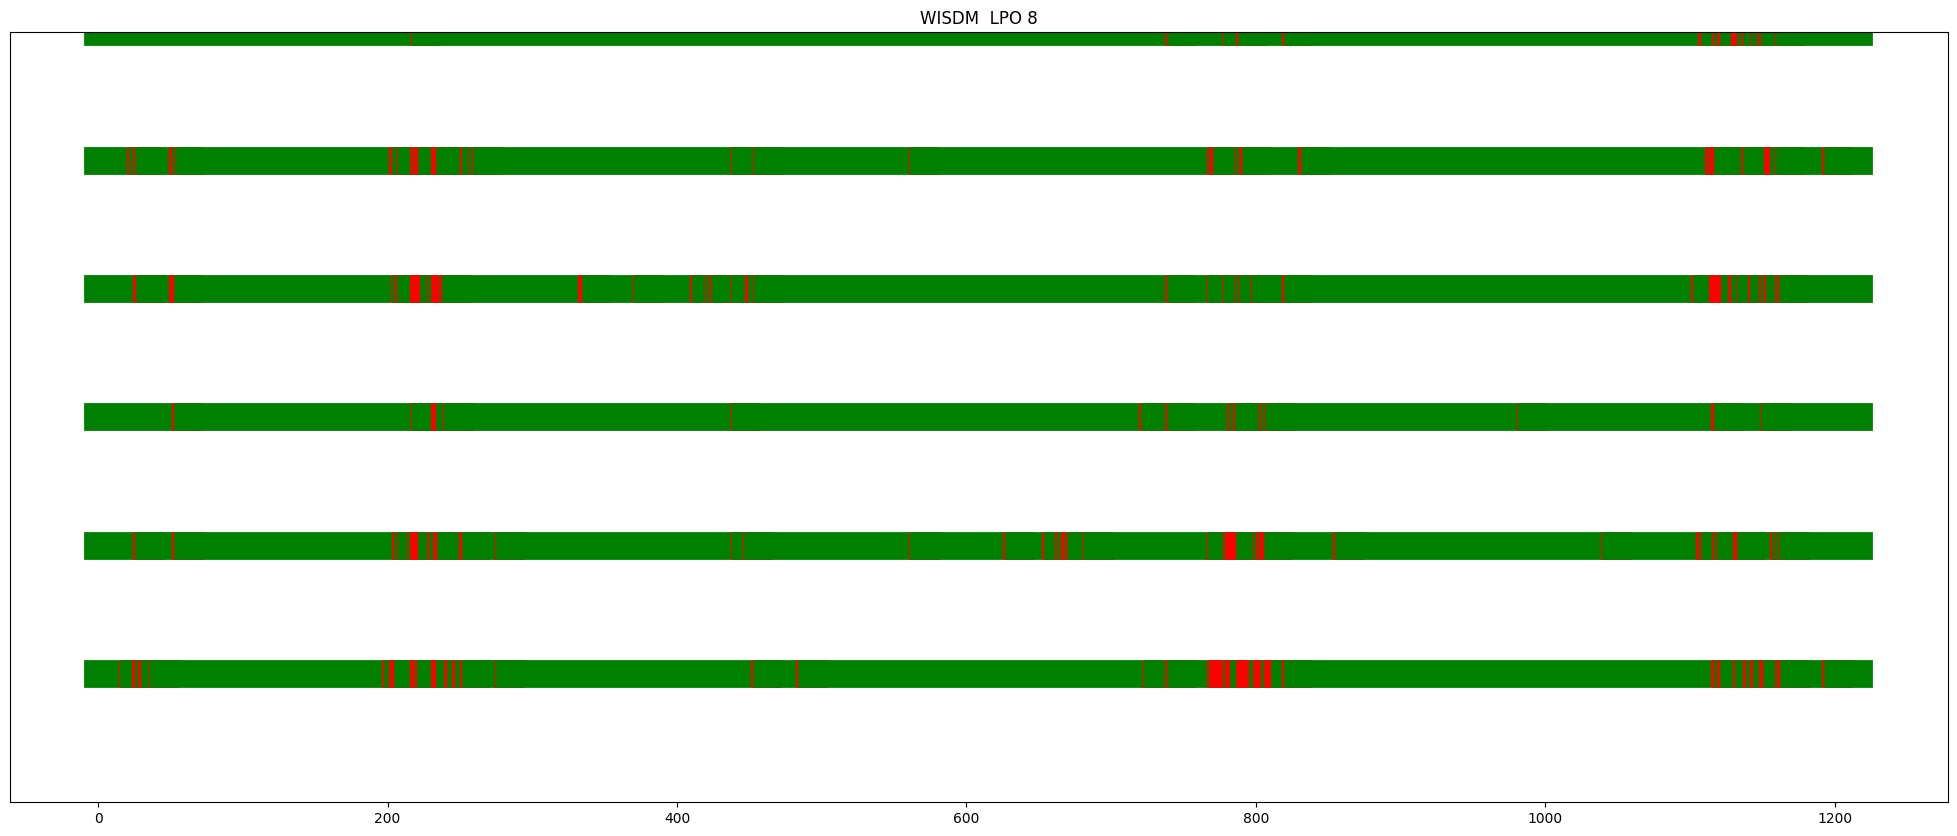

In [34]:



vectors = []
gt = []
for dataset_id, DATASET in enumerate(DATASET_LIST):
    dataset_vectors = [] 
    dataset_gt = [] 
    for model_id, MODEL in enumerate(MODEL_LIST):
        model_vectors = []  
        model_gt = []
        for person_id, person in enumerate(best_rows[DATASET, MODEL]):
            data = np.load(dir + DATASET + '_' + MODEL + '_' + person[0] + '.npz', allow_pickle=True)
            y = np.concatenate(data['y'])
            outputs = np.concatenate(data['outputs'])
            max_outputs = np.argmax(outputs, axis=1)

            comparison = y != max_outputs
            result = comparison.astype(int)

            model_vectors.append(result)
            model_gt.append(y)

        dataset_vectors.append(model_vectors)
        dataset_gt.append(model_gt)
    vectors.append(dataset_vectors)
    gt.append(dataset_gt)



for dataset_id, dataset in enumerate(vectors):

    contributor = np.zeros((len(MODEL_LIST)))
    false_classes = np.zeros((len(MODEL_LIST)))
    total_length = 0
    for person_id, result_arrays in enumerate(zip(*dataset)):
        model_labels_added = set()
        
        plt.figure(figsize=(30, 10))
        result_sum = np.sum((i for i in result_arrays),dtype=int,axis=0)
        indices_where_sum_is_1 = np.where(result_sum == len(MODEL_LIST)-1)[0]  # Get indices where the sum is 1

        # Create an array to represent the index of the first dimension
        index_of_first_dimension = np.arange(result_sum.shape[0])

        # Filter the index array to keep only the indices where the sum is 1
        index_of_first_dimension_with_sum_1 = index_of_first_dimension[indices_where_sum_is_1]
        for idx in indices_where_sum_is_1:
            
            for id2,result in enumerate(result_arrays):
                if result_arrays[id2][idx] ==0:
                    contributor[id2]+=1
        total_length += len(result_arrays[0])
        


        #plt.bar(range(0,len(result_sum)),result_sum, width=1)
        
        #plt.title(str(DATASET_LIST[dataset_id])+'  LPO '+str(person_id))


        plt.figure(figsize=(25, 10))

        for model_id, result_array in enumerate(result_arrays):
            mask = (result_array == 1)

            # Count all occurrences of 1 where the values are either 0 or 1
            false_classes[model_id]+= np.sum(mask)
            # print(MODEL_LIST[model_id])
            # print(result_array)
        
            segment_starts = []
            segment_ends = []

            current_start = 0
            values = []
            values.append(result_array[0])
            for i in range(1, len(result_array)):
                if result_array[i] != result_array[i - 1]:
                    segment_starts.append(current_start)
                    segment_ends.append(i+1)
                    current_start = i
                    values.append(result_array[i])

            segment_starts.append(current_start)
            segment_ends.append(len(result_array) -1)
            # print(segment_starts)
            # print(segment_ends)
            # print(values)
            # print(model_id)
            # print(result_array[0:200])
            # print(segment_starts)
            # print(segment_ends)
            colors = ['green' if x == 0 else 'red' for x in values]
            for start, end, color in zip(segment_starts, segment_ends, colors):
                plt.plot(range(start, end+1), np.full(end-start+1, model_id), c=color, linewidth=20)
                if model_id not in model_labels_added:
                    #plt.text(start, model_id, f"{MODEL_LIST[model_id]}  ", va='center', ha='right', color='black', fontsize=10)
                    model_labels_added.add(model_id)

            y = gt[dataset_id][model_id][person_id]
            #for i in range(len(y) - 1):
                    #if y[i] != y[i + 1]:
                        #plt.axvline(x=i, color='black', linestyle='--', linewidth=0.05)
                        #plt.text(i-10, 4.5, f"{y[i]}", va='bottom', ha='center', color='black', fontsize=8)


        plt.yticks([])  # Hide y-axis ticks
        plt.ylim(-1,5)
        plt.title(str(DATASET_LIST[dataset_id])+'  LPO '+str(person_id))
        # plt.show()

    print(contributor)
    print(false_classes)
    print(total_length)
    print(np.round(contributor/total_length*100,2))
    print(false_classes/total_length*100)